# Conditional Generative Adversarial Networks
Rather then just generating random samples, we can condition GAN's to some vector z by simply feeding the data, y that we wish to condition on to both the generator and discriminator. Hence, our Generator and Discriminator are now G(z,y) and D(x,y) respectively. Usually, y can be any type of additional inputs, for example, class labels.

We can see it with a probabilistic point of view. G(z,y) is modeling the distribution of our data, given z and y, that is, our data is generated with this scheme x∼G(x|z,y).

Similarly, for the Discriminator, now it tries to find discriminating label for x and xG, that are modeled with d∼D(d|x,y).

Hence, we could see that both D and G is jointly conditioned to two variable z or x and y.

Now, the objective function is given by:

$\min_G \max_D V(D, G) = \mathop{\mathbb{E}}_{x \sim p_{data}(x)} [\log D(x, y)] + \mathop{\mathbb{E}}_{z \sim p_z(z)} [\log(1 – D(G(z, y), y))]$

## AC-GAN
The main difference between the AC-GAN and a vanilla GAN is that to train the AC-GAN we need both training samples and training labels. These training labels are fed into the Generator, that will generate fake images using both the random noise, and the input label. The Discriminator also has to predict the source of the image, and in the AC-GAN scenario, it also has to predict the label of the image. This procedure is quite similar to the traditional Deep Learning method. 

ref: 
* http://cican17.com/gan-from-zero-to-hero-part-2-conditional-generation-by-gan/
* https://arxiv.org/pdf/1610.09585.pdf

In [1]:
from keras.datasets import fashion_mnist
import numpy as np
import pandas as pd

Using TensorFlow backend.


Define class labels

In [2]:
# classes dictionary
label_dict = {0: 'tshirt',
             1: 'trouser',
             2: 'pullover',
             3: 'dress',
             4: 'coat',
             5: 'sandal',
             6: 'shirt',
             7: 'sneaker',
             8: 'bag',
             9: 'boot'}

In [3]:
def load_fashion_minst_data():
    # load the data
    (x_train, y_train), (_, _) = fashion_mnist.load_data()

    # expand to 3d, e.g. add channels dimension
    x_train = np.expand_dims(x_train, axis=-1)
    
    # normalize our inputs to be in the range[-1, 1] 
    x_train = (x_train.astype(np.float32) - 127.5)/127.5

    return x_train, y_train

 
x_train, y_train = load_fashion_minst_data()
input_classes =pd.Series(y_train).nunique()
print("x_train shape: {}".format(x_train.shape))
print("y_train.shape:{}".format(y_train.shape))
print("Input classes:{}".format(input_classes))

x_train shape: (60000, 28, 28, 1)
y_train.shape:(60000,)
Input classes:10


## Define the model

In [26]:
%load_ext autoreload
%autoreload 2
from models.acgan import ACGAN

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
X, y = load_fashion_minst_data()

print("Input shape:", X[0].shape)

fashion_acgan = ACGAN(in_shape=X[0].shape, n_classes=10, latent_dim=100)

Input shape: (28, 28, 1)


In [28]:
fashion_acgan.gan_model.metrics_names

['loss', 'model_7_loss', 'model_7_loss']

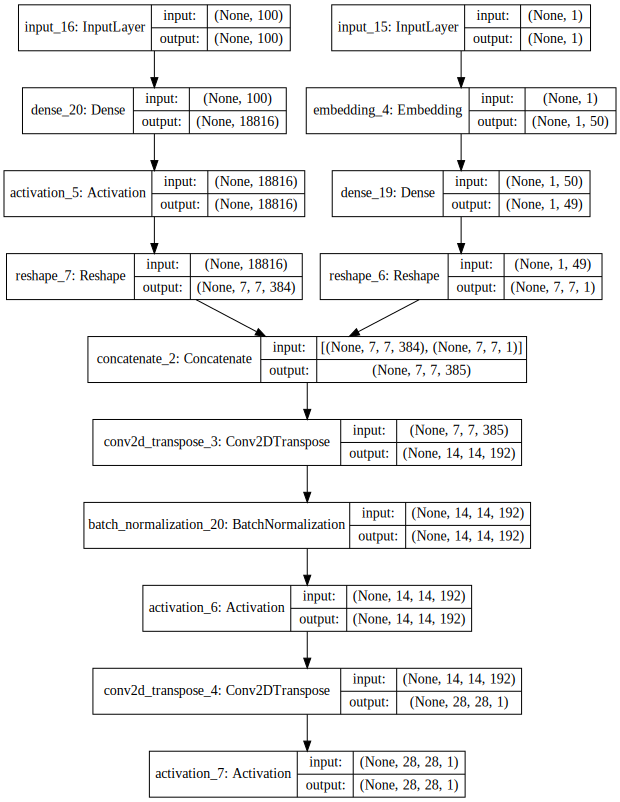

In [29]:
fashion_acgan.plot_generator()

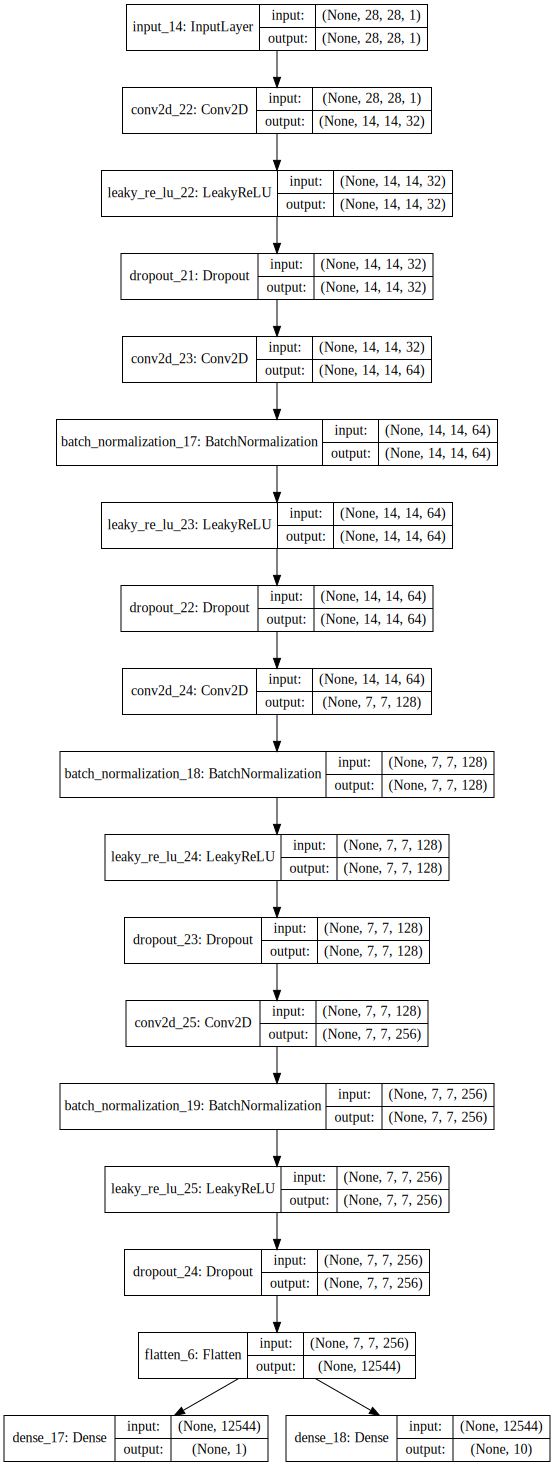

In [30]:
fashion_acgan.plot_discriminator()

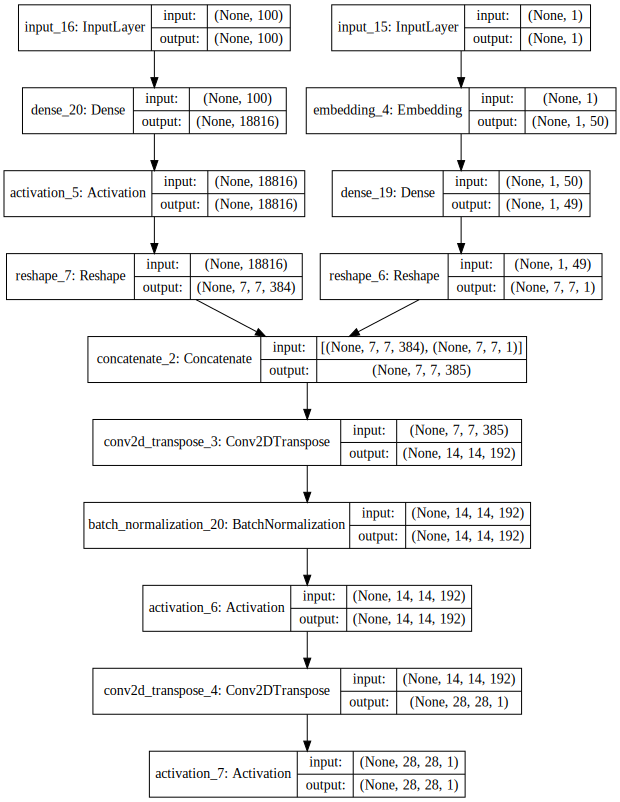

In [31]:
fashion_acgan.plot_gan()

## Train the model

C:\applications\Miniconda3\envs\tf-gpu\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>1, 1/468, dr[1.037,3.140], df[1.156,3.218], g[0.913,3.379]
>1, 2/468, dr[0.724,2.831], df[1.123,3.097], g[0.820,3.025]
>1, 3/468, dr[0.680,2.717], df[0.991,3.241], g[1.137,3.196]
>1, 4/468, dr[0.722,2.807], df[0.904,3.422], g[1.195,3.223]
>1, 5/468, dr[0.532,2.784], df[0.730,3.328], g[1.322,3.131]


C:\applications\Miniconda3\envs\tf-gpu\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>1, 6/468, dr[0.631,2.609], df[0.697,3.045], g[1.378,3.020]
>1, 7/468, dr[0.735,2.410], df[0.728,2.751], g[1.375,3.228]
>1, 8/468, dr[0.638,2.416], df[0.716,2.851], g[1.311,3.018]
>1, 9/468, dr[0.671,2.387], df[0.576,3.196], g[1.286,3.235]
>1, 10/468, dr[0.590,2.133], df[0.737,3.284], g[1.281,3.293]
>1, 11/468, dr[0.549,2.201], df[0.680,3.209], g[1.375,3.210]
>1, 12/468, dr[0.648,2.127], df[0.481,2.649], g[1.296,2.908]
>1, 13/468, dr[0.504,2.103], df[0.756,2.969], g[1.305,3.058]
>1, 14/468, dr[0.532,2.293], df[0.558,2.909], g[1.142,2.965]
>1, 15/468, dr[0.595,1.806], df[0.672,2.981], g[1.272,3.257]
>1, 16/468, dr[0.541,2.062], df[0.489,3.000], g[0.986,3.162]
>1, 17/468, dr[0.523,2.119], df[0.447,3.207], g[1.239,3.014]
>1, 18/468, dr[0.564,1.811], df[0.497,3.138], g[1.054,3.002]
>1, 19/468, dr[0.553,1.827], df[0.410,2.508], g[1.099,3.082]
>1, 20/468, dr[0.375,1.615], df[0.461,3.113], g[1.006,2.995]
>1, 21/468, dr[0.434,1.700], df[0.423,3.175], g[0.965,3.291]
>1, 22/468, dr[0.380,1.820],

>1, 140/468, dr[0.512,1.241], df[0.788,1.512], g[1.878,1.255]
>1, 141/468, dr[0.609,0.981], df[0.623,1.329], g[2.032,1.223]
>1, 142/468, dr[0.561,0.959], df[0.410,1.461], g[1.912,1.382]
>1, 143/468, dr[0.600,0.840], df[0.705,1.184], g[1.737,1.363]
>1, 144/468, dr[0.484,0.792], df[0.549,1.174], g[1.608,1.209]
>1, 145/468, dr[0.593,0.854], df[0.491,1.128], g[1.628,1.108]
>1, 146/468, dr[0.635,0.703], df[0.891,1.109], g[1.709,1.204]
>1, 147/468, dr[0.740,0.829], df[0.597,1.101], g[1.774,1.166]
>1, 148/468, dr[0.547,0.672], df[0.552,1.271], g[1.774,1.021]
>1, 149/468, dr[0.643,0.774], df[0.621,1.006], g[1.638,1.007]
>1, 150/468, dr[0.575,0.714], df[0.724,1.124], g[1.685,0.960]
>1, 151/468, dr[0.568,0.895], df[0.798,0.999], g[1.813,1.092]
>1, 152/468, dr[0.715,1.122], df[0.859,1.315], g[1.763,0.855]
>1, 153/468, dr[0.684,1.088], df[0.546,1.037], g[1.905,1.030]
>1, 154/468, dr[0.875,0.814], df[0.692,1.187], g[1.503,0.942]
>1, 155/468, dr[0.445,0.872], df[0.667,0.767], g[1.756,1.096]
>1, 156/

>1, 275/468, dr[0.511,0.801], df[0.975,0.197], g[1.714,0.184]
>1, 276/468, dr[0.961,0.736], df[0.677,0.178], g[1.390,0.219]
>1, 277/468, dr[0.697,0.734], df[0.561,0.107], g[1.262,0.239]
>1, 278/468, dr[0.695,0.762], df[0.830,0.233], g[1.293,0.220]
>1, 279/468, dr[0.553,0.780], df[0.632,0.188], g[1.611,0.272]
>1, 280/468, dr[0.609,0.677], df[0.384,0.212], g[1.222,0.339]
>1, 281/468, dr[0.600,1.124], df[0.643,0.203], g[1.280,0.212]
>1, 282/468, dr[0.568,0.777], df[0.500,0.227], g[1.328,0.162]
>1, 283/468, dr[0.625,1.135], df[0.543,0.164], g[1.453,0.182]
>1, 284/468, dr[0.494,0.793], df[0.606,0.141], g[1.262,0.168]
>1, 285/468, dr[0.486,0.888], df[0.553,0.178], g[1.424,0.264]
>1, 286/468, dr[0.484,1.003], df[0.554,0.181], g[1.500,0.276]
>1, 287/468, dr[0.744,0.774], df[0.616,0.200], g[1.355,0.265]
>1, 288/468, dr[0.630,0.563], df[0.507,0.211], g[1.289,0.172]
>1, 289/468, dr[0.665,0.776], df[0.759,0.129], g[1.064,0.207]
>1, 290/468, dr[0.549,0.671], df[0.520,0.120], g[1.362,0.281]
>1, 291/

>1, 409/468, dr[0.454,0.775], df[0.455,0.161], g[1.829,0.089]
>1, 410/468, dr[0.545,0.436], df[0.426,0.159], g[1.714,0.077]
>1, 411/468, dr[0.475,0.850], df[0.574,0.064], g[2.009,0.127]
>1, 412/468, dr[0.589,0.869], df[0.470,0.079], g[1.897,0.099]
>1, 413/468, dr[0.462,0.806], df[0.402,0.081], g[1.810,0.159]
>1, 414/468, dr[0.751,0.755], df[0.487,0.105], g[1.601,0.110]
>1, 415/468, dr[0.438,0.791], df[0.432,0.090], g[1.634,0.094]
>1, 416/468, dr[0.630,0.678], df[0.535,0.098], g[1.826,0.102]
>1, 417/468, dr[0.515,0.748], df[0.585,0.120], g[1.742,0.068]
>1, 418/468, dr[0.616,0.968], df[0.607,0.098], g[1.773,0.153]
>1, 419/468, dr[0.556,0.630], df[0.492,0.163], g[1.560,0.076]
>1, 420/468, dr[0.379,0.863], df[0.541,0.160], g[1.804,0.113]
>1, 421/468, dr[0.557,1.270], df[0.432,0.157], g[1.726,0.078]
>1, 422/468, dr[0.504,0.786], df[0.338,0.111], g[1.581,0.140]
>1, 423/468, dr[0.415,0.705], df[0.591,0.095], g[1.639,0.105]
>1, 424/468, dr[0.416,0.721], df[0.502,0.049], g[2.072,0.114]
>1, 425/

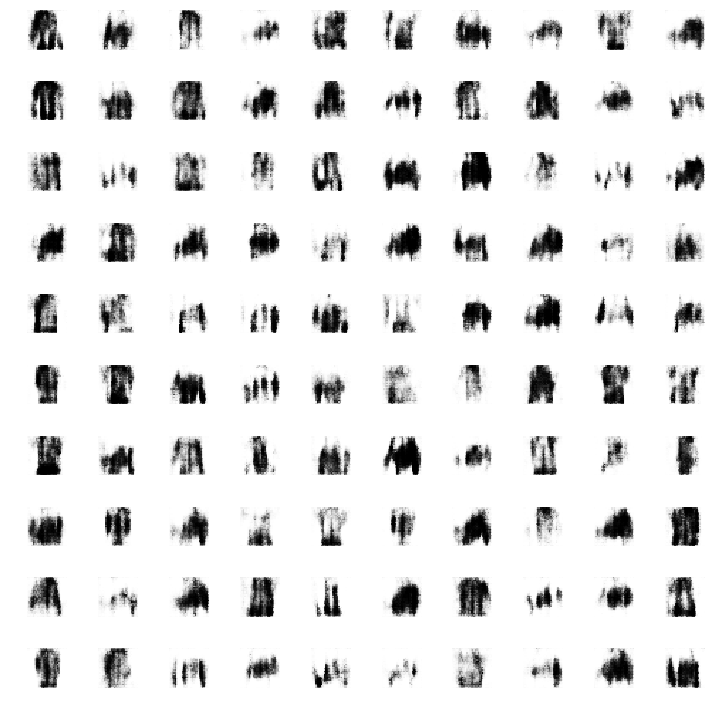

>Saved: ac-gan_generated_plot_0001.png and ac-gan_generator_model_0001.h5
>2, 1/468, dr[0.530,0.388], df[0.627,0.123], g[2.213,0.118]
>2, 2/468, dr[0.522,0.618], df[0.388,0.160], g[2.081,0.099]
>2, 3/468, dr[0.588,0.643], df[0.532,0.171], g[1.827,0.197]
>2, 4/468, dr[0.469,0.776], df[0.529,0.147], g[2.029,0.092]
>2, 5/468, dr[0.485,0.730], df[0.396,0.260], g[1.712,0.109]
>2, 6/468, dr[0.386,0.674], df[0.388,0.074], g[1.911,0.124]
>2, 7/468, dr[0.585,0.636], df[0.382,0.094], g[2.120,0.116]
>2, 8/468, dr[0.508,0.856], df[0.480,0.069], g[1.853,0.117]
>2, 9/468, dr[0.412,0.931], df[0.525,0.117], g[2.048,0.105]
>2, 10/468, dr[0.343,0.418], df[0.374,0.163], g[2.147,0.134]
>2, 11/468, dr[0.595,0.427], df[0.414,0.125], g[1.974,0.160]
>2, 12/468, dr[0.402,0.471], df[0.478,0.169], g[1.923,0.099]
>2, 13/468, dr[0.448,0.566], df[0.588,0.085], g[2.222,0.128]
>2, 14/468, dr[0.529,0.392], df[0.392,0.156], g[2.013,0.159]
>2, 15/468, dr[0.530,0.645], df[0.432,0.065], g[1.955,0.100]
>2, 16/468, dr[0.365

>2, 136/468, dr[0.533,0.815], df[0.384,0.124], g[2.178,0.160]
>2, 137/468, dr[0.475,0.500], df[0.572,0.091], g[1.709,0.074]
>2, 138/468, dr[0.451,0.863], df[0.593,0.138], g[2.140,0.194]
>2, 139/468, dr[0.385,0.806], df[0.295,0.056], g[2.015,0.108]
>2, 140/468, dr[0.597,0.523], df[0.565,0.076], g[2.079,0.145]
>2, 141/468, dr[0.456,0.757], df[0.499,0.063], g[1.713,0.189]
>2, 142/468, dr[0.438,0.825], df[0.388,0.100], g[1.887,0.141]
>2, 143/468, dr[0.478,1.243], df[0.560,0.278], g[1.559,0.156]
>2, 144/468, dr[0.537,0.773], df[0.617,0.159], g[1.853,0.199]
>2, 145/468, dr[0.311,0.459], df[0.343,0.119], g[2.054,0.097]
>2, 146/468, dr[0.437,0.759], df[0.466,0.073], g[2.082,0.161]
>2, 147/468, dr[0.395,0.554], df[0.285,0.162], g[2.259,0.081]
>2, 148/468, dr[0.524,0.798], df[0.501,0.098], g[1.446,0.150]
>2, 149/468, dr[0.239,1.039], df[0.382,0.106], g[2.074,0.135]
>2, 150/468, dr[0.497,0.308], df[0.467,0.193], g[1.894,0.123]
>2, 151/468, dr[0.467,0.482], df[0.324,0.128], g[1.712,0.151]
>2, 152/

>2, 269/468, dr[0.574,0.503], df[0.252,0.106], g[1.482,0.114]
>2, 270/468, dr[0.456,0.687], df[0.542,0.122], g[1.425,0.149]
>2, 271/468, dr[0.298,0.692], df[0.430,0.045], g[2.088,0.137]
>2, 272/468, dr[0.527,0.624], df[0.327,0.113], g[2.082,0.173]
>2, 273/468, dr[0.699,0.252], df[0.560,0.147], g[2.016,0.131]
>2, 274/468, dr[0.530,0.774], df[0.458,0.165], g[1.764,0.191]
>2, 275/468, dr[0.487,0.440], df[0.390,0.104], g[1.555,0.131]
>2, 276/468, dr[0.398,0.732], df[0.640,0.152], g[1.976,0.119]
>2, 277/468, dr[0.701,0.347], df[0.411,0.118], g[1.713,0.104]
>2, 278/468, dr[0.471,0.598], df[0.845,0.186], g[1.557,0.122]
>2, 279/468, dr[0.652,0.817], df[0.535,0.180], g[1.503,0.109]
>2, 280/468, dr[0.612,0.892], df[0.624,0.175], g[1.106,0.130]
>2, 281/468, dr[0.427,0.622], df[0.580,0.291], g[1.268,0.140]
>2, 282/468, dr[0.628,0.432], df[0.439,0.060], g[1.238,0.138]
>2, 283/468, dr[0.584,0.826], df[0.680,0.176], g[1.300,0.217]
>2, 284/468, dr[0.455,0.409], df[0.506,0.179], g[1.687,0.147]
>2, 285/

>2, 403/468, dr[0.437,0.750], df[0.575,0.264], g[2.111,0.210]
>2, 404/468, dr[0.373,1.013], df[0.438,0.171], g[2.488,0.166]
>2, 405/468, dr[0.628,1.042], df[0.283,0.166], g[1.890,0.242]
>2, 406/468, dr[0.398,0.595], df[0.467,0.238], g[2.371,0.113]
>2, 407/468, dr[0.489,0.829], df[0.384,0.155], g[2.526,0.139]
>2, 408/468, dr[0.351,0.939], df[0.260,0.244], g[2.719,0.322]
>2, 409/468, dr[0.722,0.839], df[0.460,0.098], g[1.898,0.177]
>2, 410/468, dr[0.208,0.830], df[0.486,0.136], g[2.138,0.171]
>2, 411/468, dr[0.412,0.614], df[0.406,0.120], g[2.468,0.155]
>2, 412/468, dr[0.304,0.593], df[0.336,0.188], g[1.953,0.143]
>2, 413/468, dr[0.368,0.684], df[0.420,0.170], g[2.254,0.116]
>2, 414/468, dr[0.458,0.924], df[0.475,0.206], g[2.132,0.098]
>2, 415/468, dr[0.577,0.399], df[0.391,0.195], g[1.994,0.161]
>2, 416/468, dr[0.424,0.939], df[0.507,0.129], g[2.007,0.114]
>2, 417/468, dr[0.431,0.607], df[0.501,0.146], g[2.229,0.135]
>2, 418/468, dr[0.385,0.798], df[0.346,0.115], g[2.691,0.260]
>2, 419/

>3, 71/468, dr[0.712,0.593], df[0.437,0.346], g[2.700,0.129]
>3, 72/468, dr[0.325,0.604], df[0.370,0.171], g[2.525,0.269]
>3, 73/468, dr[0.369,0.622], df[0.441,0.192], g[2.827,0.158]
>3, 74/468, dr[0.385,0.776], df[0.309,0.230], g[2.168,0.114]
>3, 75/468, dr[0.329,0.806], df[0.269,0.233], g[2.274,0.259]
>3, 76/468, dr[0.264,0.908], df[0.382,0.260], g[2.798,0.213]
>3, 77/468, dr[0.438,0.594], df[0.257,0.214], g[2.399,0.145]
>3, 78/468, dr[0.215,0.769], df[0.412,0.069], g[2.341,0.176]
>3, 79/468, dr[0.362,1.055], df[0.376,0.254], g[2.628,0.214]
>3, 80/468, dr[0.281,0.548], df[0.265,0.227], g[2.848,0.141]
>3, 81/468, dr[0.375,0.638], df[0.283,0.277], g[2.479,0.140]
>3, 82/468, dr[0.409,0.563], df[0.420,0.137], g[2.533,0.174]
>3, 83/468, dr[0.387,0.807], df[0.293,0.179], g[2.179,0.228]
>3, 84/468, dr[0.305,0.720], df[0.402,0.127], g[2.217,0.190]
>3, 85/468, dr[0.371,0.515], df[0.408,0.178], g[2.358,0.103]
>3, 86/468, dr[0.376,0.689], df[0.384,0.125], g[2.502,0.086]
>3, 87/468, dr[0.511,0.6

>3, 206/468, dr[0.336,0.949], df[0.261,0.049], g[2.282,0.111]
>3, 207/468, dr[0.254,0.662], df[0.452,0.066], g[2.834,0.094]
>3, 208/468, dr[0.380,0.795], df[0.235,0.061], g[2.356,0.077]
>3, 209/468, dr[0.356,0.610], df[0.484,0.134], g[2.398,0.109]
>3, 210/468, dr[0.453,0.547], df[0.336,0.126], g[2.037,0.128]
>3, 211/468, dr[0.393,0.556], df[0.604,0.125], g[2.045,0.109]
>3, 212/468, dr[0.369,0.469], df[0.531,0.160], g[3.294,0.212]
>3, 213/468, dr[0.510,0.922], df[0.144,0.154], g[2.958,0.090]
>3, 214/468, dr[0.479,0.768], df[0.487,0.288], g[2.408,0.100]
>3, 215/468, dr[0.375,0.553], df[0.454,0.150], g[2.393,0.105]
>3, 216/468, dr[0.540,0.577], df[0.395,0.120], g[1.990,0.126]
>3, 217/468, dr[0.328,0.761], df[0.731,0.099], g[2.745,0.154]
>3, 218/468, dr[0.663,1.017], df[0.556,0.205], g[3.208,0.171]
>3, 219/468, dr[0.512,0.491], df[0.361,0.103], g[2.296,0.221]
>3, 220/468, dr[0.288,0.630], df[0.418,0.111], g[2.713,0.155]
>3, 221/468, dr[0.332,0.602], df[0.343,0.107], g[2.494,0.116]
>3, 222/

>3, 341/468, dr[0.316,0.412], df[0.286,0.286], g[2.138,0.092]
>3, 342/468, dr[0.297,0.813], df[0.308,0.174], g[2.504,0.159]
>3, 343/468, dr[0.472,0.526], df[0.397,0.192], g[1.873,0.269]
>3, 344/468, dr[0.455,0.995], df[0.776,0.201], g[2.228,0.122]
>3, 345/468, dr[0.485,0.788], df[0.388,0.152], g[2.205,0.149]
>3, 346/468, dr[0.550,0.980], df[0.477,0.243], g[2.336,0.158]
>3, 347/468, dr[0.300,0.799], df[0.395,0.150], g[2.714,0.167]
>3, 348/468, dr[0.576,0.895], df[0.250,0.151], g[2.422,0.227]
>3, 349/468, dr[0.273,0.590], df[0.524,0.225], g[2.417,0.264]
>3, 350/468, dr[0.370,1.207], df[0.342,0.162], g[2.861,0.158]
>3, 351/468, dr[0.509,0.577], df[0.310,0.331], g[2.033,0.295]
>3, 352/468, dr[0.519,0.626], df[0.550,0.229], g[1.894,0.180]
>3, 353/468, dr[0.388,0.413], df[0.440,0.201], g[2.594,0.121]
>3, 354/468, dr[0.261,0.453], df[0.420,0.093], g[2.872,0.215]
>3, 355/468, dr[0.557,0.649], df[0.379,0.168], g[2.538,0.190]
>3, 356/468, dr[0.577,0.579], df[0.649,0.047], g[2.255,0.237]
>3, 357/

>4, 9/468, dr[0.465,0.844], df[0.538,0.077], g[2.166,0.138]
>4, 10/468, dr[0.496,0.683], df[0.366,0.084], g[2.343,0.099]
>4, 11/468, dr[0.469,0.908], df[0.674,0.125], g[2.683,0.098]
>4, 12/468, dr[0.654,0.420], df[0.448,0.093], g[2.056,0.112]
>4, 13/468, dr[0.511,0.603], df[0.502,0.114], g[2.445,0.077]
>4, 14/468, dr[0.474,0.949], df[0.423,0.135], g[2.031,0.090]
>4, 15/468, dr[0.411,0.590], df[0.551,0.230], g[2.184,0.111]
>4, 16/468, dr[0.413,0.655], df[0.540,0.209], g[2.485,0.100]
>4, 17/468, dr[0.602,1.032], df[0.394,0.172], g[2.302,0.147]
>4, 18/468, dr[0.724,1.254], df[0.895,0.221], g[2.294,0.119]
>4, 19/468, dr[0.543,0.959], df[0.569,0.116], g[2.365,0.106]
>4, 20/468, dr[0.429,0.810], df[0.386,0.159], g[2.415,0.178]
>4, 21/468, dr[0.692,0.590], df[0.690,0.215], g[2.060,0.097]
>4, 22/468, dr[0.429,0.706], df[0.588,0.155], g[2.213,0.103]
>4, 23/468, dr[0.519,0.406], df[0.552,0.170], g[2.231,0.131]
>4, 24/468, dr[0.640,0.478], df[0.495,0.098], g[2.672,0.112]
>4, 25/468, dr[0.511,0.76

>4, 145/468, dr[0.481,0.644], df[0.512,0.092], g[2.454,0.098]
>4, 146/468, dr[0.488,0.649], df[0.361,0.134], g[1.781,0.261]
>4, 147/468, dr[0.500,0.598], df[0.935,0.156], g[2.090,0.224]
>4, 148/468, dr[0.624,0.595], df[0.369,0.163], g[1.688,0.200]
>4, 149/468, dr[0.503,0.766], df[0.749,0.104], g[2.281,0.085]
>4, 150/468, dr[0.623,0.392], df[0.462,0.093], g[2.341,0.143]
>4, 151/468, dr[0.407,0.639], df[0.463,0.175], g[2.368,0.144]
>4, 152/468, dr[0.761,0.361], df[0.419,0.115], g[1.642,0.134]
>4, 153/468, dr[0.676,0.617], df[0.760,0.111], g[2.141,0.129]
>4, 154/468, dr[0.725,0.852], df[0.674,0.077], g[1.974,0.189]
>4, 155/468, dr[0.505,0.732], df[0.589,0.118], g[2.373,0.187]
>4, 156/468, dr[0.452,0.756], df[0.391,0.213], g[2.300,0.120]
>4, 157/468, dr[0.509,0.476], df[0.421,0.094], g[2.405,0.231]
>4, 158/468, dr[0.425,0.676], df[0.336,0.065], g[2.210,0.183]
>4, 159/468, dr[0.481,0.491], df[0.407,0.144], g[1.975,0.158]
>4, 160/468, dr[0.433,0.533], df[0.473,0.131], g[1.859,0.165]
>4, 161/

>4, 279/468, dr[0.624,0.806], df[0.435,0.099], g[1.732,0.132]
>4, 280/468, dr[0.499,0.445], df[0.608,0.062], g[1.795,0.073]
>4, 281/468, dr[0.587,0.555], df[0.513,0.120], g[1.915,0.088]
>4, 282/468, dr[0.577,0.487], df[0.769,0.123], g[2.166,0.102]
>4, 283/468, dr[0.589,0.413], df[0.326,0.071], g[1.895,0.104]
>4, 284/468, dr[0.527,0.578], df[0.894,0.125], g[1.743,0.122]
>4, 285/468, dr[0.490,0.565], df[0.689,0.151], g[2.497,0.135]
>4, 286/468, dr[0.724,0.437], df[0.393,0.091], g[2.240,0.227]
>4, 287/468, dr[0.600,0.536], df[0.502,0.066], g[2.303,0.078]
>4, 288/468, dr[0.861,0.664], df[0.684,0.066], g[1.758,0.118]
>4, 289/468, dr[0.401,0.819], df[0.698,0.057], g[1.945,0.140]
>4, 290/468, dr[0.552,0.570], df[0.581,0.099], g[2.006,0.190]
>4, 291/468, dr[0.453,0.678], df[0.331,0.085], g[1.802,0.243]
>4, 292/468, dr[0.566,0.632], df[0.698,0.165], g[2.083,0.091]
>4, 293/468, dr[0.612,0.642], df[0.392,0.089], g[1.741,0.106]
>4, 294/468, dr[0.561,1.040], df[0.747,0.224], g[1.945,0.115]
>4, 295/

>4, 413/468, dr[0.824,1.221], df[0.480,0.163], g[1.460,0.194]
>4, 414/468, dr[0.513,0.653], df[1.063,0.248], g[1.745,0.108]
>4, 415/468, dr[0.578,0.437], df[0.444,0.103], g[1.920,0.123]
>4, 416/468, dr[0.564,0.707], df[0.723,0.197], g[2.072,0.151]
>4, 417/468, dr[0.736,0.546], df[0.486,0.107], g[1.868,0.131]
>4, 418/468, dr[0.602,0.313], df[0.552,0.228], g[1.695,0.106]
>4, 419/468, dr[0.560,0.541], df[0.762,0.165], g[1.832,0.067]
>4, 420/468, dr[0.574,0.512], df[0.524,0.049], g[1.989,0.071]
>4, 421/468, dr[0.815,0.464], df[0.674,0.094], g[1.785,0.072]
>4, 422/468, dr[0.430,0.593], df[0.536,0.102], g[1.673,0.113]
>4, 423/468, dr[0.696,0.571], df[0.601,0.264], g[1.538,0.109]
>4, 424/468, dr[0.450,0.907], df[0.759,0.052], g[1.759,0.088]
>4, 425/468, dr[0.544,0.945], df[0.544,0.103], g[2.125,0.084]
>4, 426/468, dr[0.497,0.513], df[0.519,0.103], g[2.000,0.072]
>4, 427/468, dr[0.794,0.673], df[0.639,0.155], g[1.784,0.135]
>4, 428/468, dr[0.432,0.361], df[0.536,0.083], g[1.947,0.157]
>4, 429/

>5, 80/468, dr[0.716,0.820], df[0.456,0.054], g[1.581,0.078]
>5, 81/468, dr[0.470,0.603], df[0.688,0.081], g[1.619,0.137]
>5, 82/468, dr[0.590,0.322], df[0.597,0.097], g[1.821,0.216]
>5, 83/468, dr[0.720,0.719], df[0.648,0.188], g[1.657,0.131]
>5, 84/468, dr[0.429,0.628], df[0.651,0.056], g[1.819,0.179]
>5, 85/468, dr[0.792,0.704], df[0.636,0.159], g[1.502,0.141]
>5, 86/468, dr[0.532,0.545], df[0.564,0.060], g[1.616,0.132]
>5, 87/468, dr[0.774,0.486], df[0.561,0.085], g[1.512,0.054]
>5, 88/468, dr[0.311,0.780], df[0.684,0.082], g[1.815,0.109]
>5, 89/468, dr[0.485,0.636], df[0.449,0.102], g[1.790,0.053]
>5, 90/468, dr[0.782,0.618], df[0.772,0.123], g[1.777,0.118]
>5, 91/468, dr[0.817,0.491], df[0.563,0.119], g[1.497,0.196]
>5, 92/468, dr[0.595,0.630], df[0.590,0.111], g[1.395,0.067]
>5, 93/468, dr[0.306,0.509], df[0.616,0.160], g[1.475,0.089]
>5, 94/468, dr[0.602,0.624], df[0.495,0.037], g[1.904,0.082]
>5, 95/468, dr[0.600,0.583], df[0.835,0.070], g[1.511,0.076]
>5, 96/468, dr[0.634,0.5

>5, 214/468, dr[0.460,0.499], df[0.474,0.143], g[1.517,0.075]
>5, 215/468, dr[0.556,0.471], df[0.548,0.233], g[1.369,0.149]
>5, 216/468, dr[0.384,0.397], df[0.562,0.134], g[2.154,0.115]
>5, 217/468, dr[0.891,1.276], df[0.606,0.131], g[1.727,0.281]
>5, 218/468, dr[0.660,1.009], df[0.676,0.182], g[1.617,0.187]
>5, 219/468, dr[0.433,0.486], df[0.506,0.039], g[1.880,0.141]
>5, 220/468, dr[0.550,0.689], df[0.610,0.087], g[2.043,0.148]
>5, 221/468, dr[0.502,0.473], df[0.498,0.079], g[1.807,0.114]
>5, 222/468, dr[0.664,0.364], df[0.569,0.120], g[1.832,0.096]
>5, 223/468, dr[0.474,0.492], df[0.598,0.035], g[1.496,0.139]
>5, 224/468, dr[0.625,1.023], df[0.515,0.154], g[1.466,0.061]
>5, 225/468, dr[0.416,0.687], df[0.615,0.115], g[2.014,0.131]
>5, 226/468, dr[0.513,0.711], df[0.434,0.064], g[1.776,0.115]
>5, 227/468, dr[0.428,0.324], df[0.450,0.093], g[1.780,0.099]
>5, 228/468, dr[0.543,0.724], df[0.729,0.348], g[2.049,0.085]
>5, 229/468, dr[0.685,0.562], df[0.461,0.100], g[1.416,0.146]
>5, 230/

>5, 350/468, dr[0.563,0.483], df[0.585,0.162], g[1.469,0.123]
>5, 351/468, dr[0.555,0.524], df[0.639,0.105], g[1.768,0.070]
>5, 352/468, dr[0.587,0.919], df[0.559,0.074], g[1.671,0.168]
>5, 353/468, dr[0.536,0.505], df[0.619,0.073], g[1.895,0.094]
>5, 354/468, dr[0.624,0.652], df[0.603,0.042], g[1.730,0.203]
>5, 355/468, dr[0.540,0.869], df[0.556,0.058], g[1.916,0.044]
>5, 356/468, dr[0.750,0.752], df[0.487,0.178], g[1.467,0.120]
>5, 357/468, dr[0.555,0.705], df[0.755,0.066], g[1.656,0.088]
>5, 358/468, dr[0.568,0.716], df[0.621,0.084], g[1.533,0.066]
>5, 359/468, dr[0.509,0.523], df[0.615,0.096], g[1.819,0.079]
>5, 360/468, dr[0.454,0.329], df[0.532,0.131], g[1.873,0.049]
>5, 361/468, dr[0.872,0.765], df[0.626,0.091], g[1.547,0.141]
>5, 362/468, dr[0.425,0.508], df[0.770,0.171], g[2.016,0.106]
>5, 363/468, dr[0.728,0.669], df[0.536,0.104], g[1.929,0.084]
>5, 364/468, dr[0.681,0.442], df[0.672,0.127], g[1.889,0.113]
>5, 365/468, dr[0.530,0.458], df[0.657,0.105], g[1.776,0.073]
>5, 366/

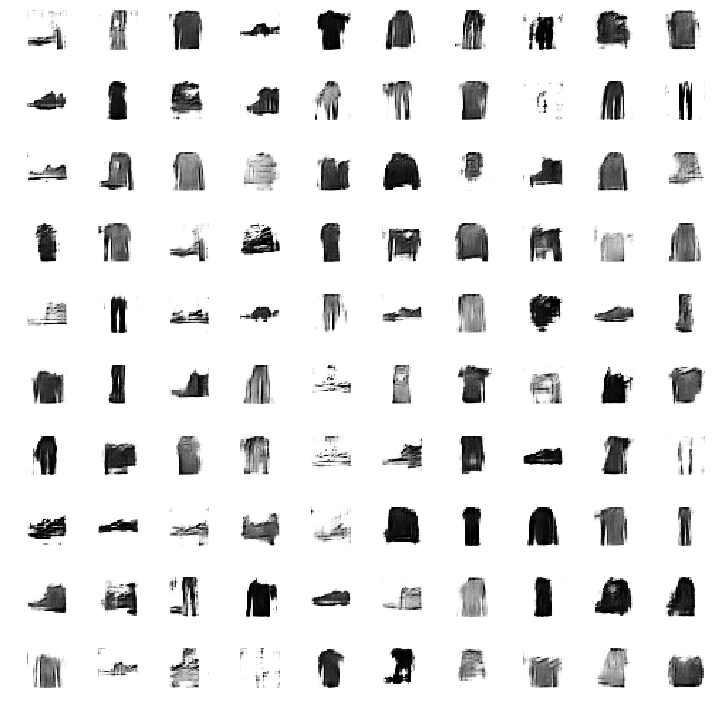

>Saved: ac-gan_generated_plot_0005.png and ac-gan_generator_model_0005.h5
>6, 1/468, dr[0.631,0.428], df[0.611,0.128], g[1.648,0.071]
>6, 2/468, dr[0.599,0.547], df[0.648,0.143], g[1.739,0.117]
>6, 3/468, dr[0.526,0.613], df[0.560,0.095], g[1.746,0.086]
>6, 4/468, dr[0.552,0.417], df[0.594,0.111], g[1.953,0.112]
>6, 5/468, dr[0.622,0.574], df[0.421,0.082], g[1.656,0.089]
>6, 6/468, dr[0.525,0.522], df[0.739,0.119], g[1.581,0.089]
>6, 7/468, dr[0.564,0.651], df[0.456,0.137], g[1.915,0.084]
>6, 8/468, dr[0.652,0.842], df[0.571,0.195], g[1.809,0.071]
>6, 9/468, dr[0.485,0.342], df[0.393,0.173], g[1.557,0.205]
>6, 10/468, dr[0.612,0.600], df[0.553,0.062], g[1.588,0.140]
>6, 11/468, dr[0.467,0.742], df[0.536,0.175], g[1.487,0.115]
>6, 12/468, dr[0.564,0.824], df[0.517,0.115], g[1.672,0.091]
>6, 13/468, dr[0.492,0.488], df[0.386,0.061], g[1.486,0.092]
>6, 14/468, dr[0.627,0.651], df[0.640,0.242], g[1.471,0.167]
>6, 15/468, dr[0.671,0.509], df[0.803,0.106], g[1.387,0.150]
>6, 16/468, dr[0.824

>6, 136/468, dr[0.608,0.682], df[0.514,0.154], g[1.751,0.077]
>6, 137/468, dr[0.456,0.419], df[0.497,0.094], g[1.714,0.125]
>6, 138/468, dr[0.598,0.590], df[0.604,0.171], g[1.762,0.091]
>6, 139/468, dr[0.479,0.639], df[0.642,0.163], g[1.919,0.140]
>6, 140/468, dr[0.587,0.615], df[0.564,0.044], g[1.845,0.152]
>6, 141/468, dr[0.718,0.488], df[0.548,0.064], g[1.598,0.098]
>6, 142/468, dr[0.603,0.494], df[0.716,0.090], g[1.586,0.097]
>6, 143/468, dr[0.599,0.512], df[0.628,0.094], g[1.755,0.149]
>6, 144/468, dr[0.710,0.742], df[0.520,0.102], g[1.551,0.099]
>6, 145/468, dr[0.648,0.557], df[0.675,0.172], g[1.592,0.101]
>6, 146/468, dr[0.605,0.622], df[0.664,0.117], g[1.717,0.119]
>6, 147/468, dr[0.604,0.778], df[0.403,0.114], g[1.674,0.068]
>6, 148/468, dr[0.567,0.915], df[0.548,0.130], g[1.404,0.163]
>6, 149/468, dr[0.644,0.722], df[0.824,0.076], g[1.600,0.081]
>6, 150/468, dr[0.515,0.356], df[0.461,0.104], g[1.988,0.117]
>6, 151/468, dr[0.821,1.001], df[0.654,0.135], g[1.721,0.091]
>6, 152/

>6, 273/468, dr[0.537,0.444], df[0.502,0.078], g[1.479,0.183]
>6, 274/468, dr[0.371,0.288], df[0.406,0.085], g[1.654,0.092]
>6, 275/468, dr[0.655,0.480], df[0.498,0.027], g[1.590,0.084]
>6, 276/468, dr[0.386,0.495], df[0.551,0.041], g[1.580,0.058]
>6, 277/468, dr[0.579,0.457], df[0.707,0.095], g[1.717,0.104]
>6, 278/468, dr[0.660,0.689], df[0.590,0.053], g[1.740,0.133]
>6, 279/468, dr[0.602,0.374], df[0.695,0.076], g[1.727,0.168]
>6, 280/468, dr[0.440,0.395], df[0.475,0.097], g[1.979,0.135]
>6, 281/468, dr[0.784,0.543], df[0.642,0.156], g[1.742,0.077]
>6, 282/468, dr[0.482,1.056], df[0.576,0.063], g[1.676,0.137]
>6, 283/468, dr[0.727,0.599], df[0.699,0.100], g[1.615,0.084]
>6, 284/468, dr[0.559,0.808], df[0.628,0.105], g[1.800,0.084]
>6, 285/468, dr[0.459,0.393], df[0.484,0.129], g[1.865,0.128]
>6, 286/468, dr[0.634,0.421], df[0.632,0.106], g[1.952,0.101]
>6, 287/468, dr[0.516,0.490], df[0.479,0.063], g[1.599,0.089]
>6, 288/468, dr[0.907,0.636], df[0.491,0.092], g[1.400,0.118]
>6, 289/

>6, 411/468, dr[0.557,0.251], df[0.551,0.060], g[1.848,0.146]
>6, 412/468, dr[0.686,0.466], df[0.433,0.106], g[1.620,0.115]
>6, 413/468, dr[0.698,0.495], df[0.665,0.030], g[1.438,0.070]
>6, 414/468, dr[0.662,0.686], df[0.726,0.101], g[1.477,0.086]
>6, 415/468, dr[0.426,0.782], df[0.645,0.193], g[1.635,0.081]
>6, 416/468, dr[0.650,0.640], df[0.620,0.114], g[1.629,0.078]
>6, 417/468, dr[0.514,0.395], df[0.739,0.101], g[1.921,0.078]
>6, 418/468, dr[0.747,1.103], df[0.413,0.096], g[1.767,0.095]
>6, 419/468, dr[0.737,0.424], df[0.571,0.087], g[1.400,0.083]
>6, 420/468, dr[0.625,0.571], df[0.715,0.152], g[1.571,0.045]
>6, 421/468, dr[0.595,0.472], df[0.575,0.155], g[1.558,0.114]
>6, 422/468, dr[0.524,0.525], df[0.777,0.110], g[1.784,0.162]
>6, 423/468, dr[0.731,0.428], df[0.517,0.103], g[1.647,0.114]
>6, 424/468, dr[0.562,0.610], df[0.646,0.143], g[1.930,0.079]
>6, 425/468, dr[0.472,0.412], df[0.650,0.078], g[1.788,0.074]
>6, 426/468, dr[0.628,0.448], df[0.494,0.063], g[1.683,0.098]
>6, 427/

>7, 79/468, dr[0.530,0.372], df[0.665,0.202], g[1.466,0.073]
>7, 80/468, dr[0.584,0.564], df[0.598,0.071], g[1.368,0.078]
>7, 81/468, dr[0.596,0.581], df[0.629,0.048], g[1.691,0.095]
>7, 82/468, dr[0.630,0.853], df[0.622,0.045], g[1.847,0.146]
>7, 83/468, dr[0.781,0.499], df[0.705,0.085], g[1.540,0.066]
>7, 84/468, dr[0.536,0.748], df[0.634,0.063], g[1.722,0.076]
>7, 85/468, dr[0.768,0.620], df[0.785,0.186], g[1.709,0.054]
>7, 86/468, dr[0.612,0.495], df[0.734,0.111], g[1.836,0.068]
>7, 87/468, dr[0.676,0.532], df[0.510,0.260], g[1.649,0.144]
>7, 88/468, dr[0.713,0.494], df[0.636,0.134], g[1.633,0.051]
>7, 89/468, dr[0.628,0.658], df[0.619,0.165], g[1.605,0.075]
>7, 90/468, dr[0.599,0.696], df[0.730,0.089], g[1.698,0.133]
>7, 91/468, dr[0.550,0.734], df[0.441,0.183], g[1.507,0.100]
>7, 92/468, dr[0.778,0.588], df[0.775,0.215], g[1.547,0.098]
>7, 93/468, dr[0.526,0.643], df[0.597,0.185], g[1.743,0.082]
>7, 94/468, dr[0.874,0.737], df[0.623,0.096], g[1.547,0.119]
>7, 95/468, dr[0.502,0.4

>7, 212/468, dr[0.664,0.478], df[0.425,0.111], g[1.869,0.126]
>7, 213/468, dr[0.889,0.546], df[0.633,0.048], g[1.355,0.140]
>7, 214/468, dr[0.543,0.892], df[0.543,0.080], g[1.404,0.067]
>7, 215/468, dr[0.491,0.306], df[0.759,0.104], g[1.504,0.088]
>7, 216/468, dr[0.588,0.228], df[0.501,0.067], g[1.703,0.083]
>7, 217/468, dr[0.597,0.234], df[0.697,0.074], g[1.716,0.092]
>7, 218/468, dr[0.482,0.780], df[0.490,0.057], g[1.607,0.111]
>7, 219/468, dr[0.759,0.480], df[0.706,0.143], g[1.623,0.147]
>7, 220/468, dr[0.781,0.652], df[0.596,0.084], g[1.695,0.149]
>7, 221/468, dr[0.512,0.437], df[0.556,0.139], g[1.535,0.135]
>7, 222/468, dr[0.490,0.860], df[0.588,0.075], g[1.566,0.102]
>7, 223/468, dr[0.488,0.550], df[0.410,0.079], g[1.552,0.122]
>7, 224/468, dr[0.567,0.525], df[0.419,0.175], g[1.363,0.119]
>7, 225/468, dr[0.563,0.478], df[0.714,0.150], g[1.397,0.070]
>7, 226/468, dr[0.418,0.696], df[0.548,0.077], g[1.663,0.098]
>7, 227/468, dr[0.613,0.395], df[0.519,0.101], g[1.677,0.072]
>7, 228/

>7, 348/468, dr[0.561,0.868], df[0.453,0.099], g[1.449,0.051]
>7, 349/468, dr[0.573,0.558], df[0.733,0.034], g[1.432,0.056]
>7, 350/468, dr[0.558,0.564], df[0.696,0.127], g[1.788,0.133]
>7, 351/468, dr[0.863,0.547], df[0.638,0.061], g[1.469,0.049]
>7, 352/468, dr[0.594,0.704], df[0.838,0.091], g[1.459,0.080]
>7, 353/468, dr[0.603,0.355], df[0.487,0.104], g[1.728,0.069]
>7, 354/468, dr[0.719,0.571], df[0.464,0.034], g[1.462,0.085]
>7, 355/468, dr[0.570,0.482], df[0.821,0.173], g[1.425,0.124]
>7, 356/468, dr[0.592,0.561], df[0.600,0.100], g[1.821,0.049]
>7, 357/468, dr[0.579,0.447], df[0.707,0.146], g[1.580,0.069]
>7, 358/468, dr[0.939,0.602], df[0.765,0.062], g[1.526,0.090]
>7, 359/468, dr[0.583,0.620], df[0.704,0.033], g[1.531,0.050]
>7, 360/468, dr[0.403,0.392], df[0.421,0.220], g[1.671,0.056]
>7, 361/468, dr[0.544,0.517], df[0.648,0.154], g[1.788,0.084]
>7, 362/468, dr[0.728,0.616], df[0.554,0.053], g[1.444,0.088]
>7, 363/468, dr[0.625,0.829], df[0.702,0.101], g[1.585,0.085]
>7, 364/

>8, 17/468, dr[0.695,0.359], df[0.713,0.158], g[1.531,0.109]
>8, 18/468, dr[0.641,0.443], df[0.765,0.093], g[1.700,0.114]
>8, 19/468, dr[0.601,0.465], df[0.668,0.095], g[1.803,0.045]
>8, 20/468, dr[0.651,0.589], df[0.568,0.118], g[1.729,0.059]
>8, 21/468, dr[0.859,0.607], df[0.620,0.034], g[1.663,0.052]
>8, 22/468, dr[0.588,0.757], df[0.664,0.050], g[1.467,0.103]
>8, 23/468, dr[0.500,0.426], df[0.639,0.082], g[1.534,0.111]
>8, 24/468, dr[0.496,0.382], df[0.527,0.132], g[1.811,0.114]
>8, 25/468, dr[0.642,0.222], df[0.523,0.072], g[1.630,0.055]
>8, 26/468, dr[0.705,0.958], df[0.606,0.040], g[1.399,0.076]
>8, 27/468, dr[0.669,0.484], df[0.748,0.056], g[1.616,0.077]
>8, 28/468, dr[0.692,0.570], df[0.655,0.030], g[1.423,0.122]
>8, 29/468, dr[0.578,0.581], df[0.653,0.108], g[1.435,0.076]
>8, 30/468, dr[0.619,0.769], df[0.553,0.112], g[1.501,0.075]
>8, 31/468, dr[0.599,0.480], df[0.527,0.086], g[1.419,0.053]
>8, 32/468, dr[0.537,0.586], df[0.610,0.106], g[1.594,0.141]
>8, 33/468, dr[0.548,0.4

>8, 152/468, dr[0.661,0.495], df[0.507,0.063], g[1.292,0.219]
>8, 153/468, dr[0.426,0.561], df[0.613,0.038], g[1.528,0.131]
>8, 154/468, dr[0.854,0.529], df[0.742,0.084], g[1.424,0.090]
>8, 155/468, dr[0.547,0.658], df[0.567,0.021], g[1.394,0.061]
>8, 156/468, dr[0.630,0.414], df[0.618,0.082], g[1.540,0.046]
>8, 157/468, dr[0.747,0.945], df[0.525,0.061], g[1.398,0.148]
>8, 158/468, dr[0.580,0.779], df[0.667,0.064], g[1.309,0.093]
>8, 159/468, dr[0.646,0.372], df[0.780,0.071], g[1.548,0.084]
>8, 160/468, dr[0.741,0.592], df[0.688,0.040], g[1.497,0.102]
>8, 161/468, dr[0.704,0.363], df[0.625,0.079], g[1.590,0.111]
>8, 162/468, dr[0.407,0.440], df[0.615,0.057], g[1.656,0.126]
>8, 163/468, dr[0.787,0.458], df[0.782,0.079], g[1.759,0.088]
>8, 164/468, dr[0.628,0.312], df[0.619,0.031], g[1.526,0.140]
>8, 165/468, dr[0.713,0.561], df[0.627,0.101], g[1.338,0.080]
>8, 166/468, dr[0.739,0.594], df[0.562,0.058], g[1.339,0.127]
>8, 167/468, dr[0.581,0.626], df[0.665,0.073], g[1.608,0.089]
>8, 168/

>8, 289/468, dr[0.763,0.678], df[0.457,0.035], g[1.386,0.095]
>8, 290/468, dr[0.662,0.648], df[0.672,0.107], g[1.848,0.104]
>8, 291/468, dr[0.668,0.694], df[0.606,0.119], g[1.335,0.221]
>8, 292/468, dr[0.529,0.426], df[0.627,0.077], g[1.362,0.101]
>8, 293/468, dr[0.516,0.588], df[0.644,0.150], g[1.819,0.059]
>8, 294/468, dr[0.780,0.467], df[0.545,0.134], g[1.561,0.075]
>8, 295/468, dr[0.462,0.421], df[0.564,0.043], g[1.646,0.061]
>8, 296/468, dr[0.576,0.315], df[0.640,0.149], g[1.789,0.084]
>8, 297/468, dr[0.538,0.681], df[0.434,0.089], g[1.688,0.059]
>8, 298/468, dr[0.635,0.404], df[0.623,0.127], g[1.677,0.059]
>8, 299/468, dr[0.589,0.440], df[0.511,0.129], g[1.602,0.070]
>8, 300/468, dr[0.546,0.570], df[0.632,0.160], g[1.512,0.050]
>8, 301/468, dr[0.498,0.480], df[0.442,0.151], g[1.685,0.088]
>8, 302/468, dr[0.636,0.694], df[0.664,0.220], g[1.767,0.058]
>8, 303/468, dr[0.500,0.410], df[0.424,0.062], g[1.656,0.091]
>8, 304/468, dr[0.711,0.522], df[0.760,0.088], g[1.657,0.065]
>8, 305/

>8, 426/468, dr[0.577,0.484], df[0.530,0.079], g[1.543,0.058]
>8, 427/468, dr[0.529,0.240], df[0.488,0.077], g[1.874,0.070]
>8, 428/468, dr[0.759,0.485], df[0.500,0.039], g[1.235,0.086]
>8, 429/468, dr[0.530,0.604], df[0.636,0.053], g[1.493,0.112]
>8, 430/468, dr[0.490,0.611], df[0.490,0.046], g[1.606,0.126]
>8, 431/468, dr[0.600,0.289], df[0.539,0.055], g[1.669,0.075]
>8, 432/468, dr[0.520,0.737], df[0.520,0.056], g[1.777,0.060]
>8, 433/468, dr[0.494,0.344], df[0.478,0.114], g[1.692,0.070]
>8, 434/468, dr[0.634,0.496], df[0.517,0.216], g[1.732,0.076]
>8, 435/468, dr[0.688,0.510], df[0.666,0.042], g[1.634,0.048]
>8, 436/468, dr[0.675,0.396], df[0.536,0.056], g[1.524,0.106]
>8, 437/468, dr[0.566,0.367], df[0.559,0.042], g[1.359,0.045]
>8, 438/468, dr[0.575,0.613], df[0.701,0.061], g[1.323,0.093]
>8, 439/468, dr[0.714,0.436], df[0.733,0.169], g[1.457,0.069]
>8, 440/468, dr[0.452,0.421], df[0.699,0.061], g[1.600,0.033]
>8, 441/468, dr[0.859,0.417], df[0.592,0.087], g[1.625,0.045]
>8, 442/

>9, 94/468, dr[0.492,0.346], df[0.661,0.108], g[1.382,0.074]
>9, 95/468, dr[0.622,0.299], df[0.559,0.042], g[1.596,0.094]
>9, 96/468, dr[0.665,0.551], df[0.430,0.018], g[1.210,0.063]
>9, 97/468, dr[0.775,0.642], df[0.684,0.079], g[1.219,0.062]
>9, 98/468, dr[0.320,0.534], df[0.675,0.054], g[1.677,0.074]
>9, 99/468, dr[0.647,0.389], df[0.682,0.152], g[1.760,0.069]
>9, 100/468, dr[0.696,0.418], df[0.617,0.055], g[1.627,0.082]
>9, 101/468, dr[0.641,0.454], df[0.630,0.074], g[1.402,0.069]
>9, 102/468, dr[0.663,0.474], df[0.688,0.080], g[1.399,0.102]
>9, 103/468, dr[0.487,0.448], df[0.551,0.078], g[1.719,0.064]
>9, 104/468, dr[0.698,0.563], df[0.386,0.080], g[1.516,0.044]
>9, 105/468, dr[0.600,0.427], df[0.609,0.027], g[1.337,0.132]
>9, 106/468, dr[0.458,0.388], df[0.625,0.082], g[1.568,0.079]
>9, 107/468, dr[0.524,0.268], df[0.619,0.086], g[1.560,0.157]
>9, 108/468, dr[0.753,0.345], df[0.518,0.074], g[1.513,0.061]
>9, 109/468, dr[0.711,0.709], df[0.778,0.021], g[1.351,0.126]
>9, 110/468, d

>9, 231/468, dr[0.543,0.606], df[0.491,0.046], g[1.718,0.074]
>9, 232/468, dr[0.513,0.442], df[0.481,0.128], g[1.544,0.045]
>9, 233/468, dr[0.743,0.702], df[0.463,0.062], g[1.464,0.048]
>9, 234/468, dr[0.528,0.499], df[0.734,0.108], g[1.451,0.051]
>9, 235/468, dr[0.594,0.263], df[0.616,0.161], g[1.510,0.031]
>9, 236/468, dr[0.497,0.427], df[0.542,0.138], g[1.647,0.059]
>9, 237/468, dr[0.618,0.362], df[0.536,0.058], g[1.524,0.093]
>9, 238/468, dr[0.421,0.348], df[0.541,0.058], g[1.401,0.065]
>9, 239/468, dr[0.527,0.388], df[0.726,0.066], g[1.712,0.104]
>9, 240/468, dr[0.726,0.251], df[0.521,0.078], g[1.688,0.114]
>9, 241/468, dr[0.710,0.468], df[0.685,0.076], g[1.665,0.045]
>9, 242/468, dr[0.750,0.718], df[0.563,0.071], g[1.500,0.127]
>9, 243/468, dr[0.504,0.732], df[0.523,0.037], g[1.528,0.118]
>9, 244/468, dr[0.492,0.420], df[0.538,0.083], g[1.638,0.072]
>9, 245/468, dr[0.499,0.407], df[0.631,0.206], g[1.881,0.056]
>9, 246/468, dr[0.527,0.651], df[0.580,0.055], g[1.697,0.099]
>9, 247/

>9, 367/468, dr[0.503,0.372], df[0.485,0.159], g[1.619,0.068]
>9, 368/468, dr[0.526,0.595], df[0.511,0.156], g[1.247,0.060]
>9, 369/468, dr[0.407,0.461], df[0.763,0.164], g[1.501,0.105]
>9, 370/468, dr[0.651,0.540], df[0.523,0.046], g[1.664,0.040]
>9, 371/468, dr[0.640,0.420], df[0.467,0.042], g[1.501,0.137]
>9, 372/468, dr[0.618,0.315], df[0.568,0.044], g[1.589,0.074]
>9, 373/468, dr[0.752,0.510], df[0.688,0.075], g[1.338,0.143]
>9, 374/468, dr[0.456,0.695], df[0.776,0.100], g[1.543,0.055]
>9, 375/468, dr[0.806,0.479], df[0.544,0.181], g[1.764,0.083]
>9, 376/468, dr[0.564,0.507], df[0.637,0.046], g[1.472,0.067]
>9, 377/468, dr[0.538,0.354], df[0.512,0.102], g[1.717,0.055]
>9, 378/468, dr[0.681,0.490], df[0.608,0.098], g[1.298,0.075]
>9, 379/468, dr[0.476,0.634], df[0.578,0.116], g[1.607,0.075]
>9, 380/468, dr[0.739,0.323], df[0.363,0.052], g[1.593,0.092]
>9, 381/468, dr[0.576,0.623], df[0.656,0.041], g[1.264,0.054]
>9, 382/468, dr[0.405,0.394], df[0.607,0.021], g[1.566,0.054]
>9, 383/

>10, 33/468, dr[0.515,0.359], df[0.441,0.125], g[1.630,0.047]
>10, 34/468, dr[0.821,0.423], df[0.429,0.095], g[1.251,0.030]
>10, 35/468, dr[0.578,0.557], df[0.759,0.043], g[1.144,0.046]
>10, 36/468, dr[0.411,0.720], df[0.569,0.055], g[1.431,0.087]
>10, 37/468, dr[0.565,0.374], df[0.593,0.025], g[1.560,0.049]
>10, 38/468, dr[0.585,0.330], df[0.493,0.072], g[1.525,0.112]
>10, 39/468, dr[0.538,0.474], df[0.830,0.102], g[1.645,0.104]
>10, 40/468, dr[0.662,0.651], df[0.449,0.119], g[1.678,0.090]
>10, 41/468, dr[0.690,0.364], df[0.656,0.049], g[1.401,0.116]
>10, 42/468, dr[0.512,0.513], df[0.460,0.090], g[1.370,0.089]
>10, 43/468, dr[0.608,0.677], df[0.677,0.043], g[1.564,0.071]
>10, 44/468, dr[0.645,0.573], df[0.615,0.041], g[1.503,0.091]
>10, 45/468, dr[0.652,0.973], df[0.640,0.105], g[1.553,0.050]
>10, 46/468, dr[0.683,0.473], df[0.520,0.029], g[1.553,0.067]
>10, 47/468, dr[0.478,0.374], df[0.725,0.090], g[1.355,0.051]
>10, 48/468, dr[0.565,0.418], df[0.533,0.057], g[1.859,0.169]
>10, 49/

>10, 165/468, dr[0.530,0.465], df[0.808,0.066], g[1.299,0.089]
>10, 166/468, dr[0.573,0.401], df[0.462,0.087], g[1.344,0.055]
>10, 167/468, dr[0.592,0.434], df[0.524,0.071], g[1.550,0.059]
>10, 168/468, dr[0.585,0.756], df[0.552,0.081], g[1.208,0.085]
>10, 169/468, dr[0.447,0.463], df[0.855,0.151], g[1.646,0.110]
>10, 170/468, dr[0.750,0.710], df[0.417,0.049], g[1.459,0.068]
>10, 171/468, dr[0.528,0.411], df[0.571,0.249], g[1.399,0.067]
>10, 172/468, dr[0.568,0.463], df[0.772,0.018], g[1.403,0.035]
>10, 173/468, dr[0.494,0.357], df[0.572,0.043], g[1.363,0.055]
>10, 174/468, dr[0.623,0.325], df[0.586,0.131], g[1.653,0.059]
>10, 175/468, dr[0.588,0.479], df[0.433,0.060], g[1.463,0.100]
>10, 176/468, dr[0.641,0.485], df[0.690,0.074], g[1.614,0.118]
>10, 177/468, dr[0.636,0.335], df[0.653,0.121], g[1.426,0.174]
>10, 178/468, dr[0.628,0.562], df[0.663,0.072], g[1.564,0.113]
>10, 179/468, dr[0.475,0.494], df[0.571,0.018], g[1.613,0.099]
>10, 180/468, dr[0.715,0.272], df[0.489,0.132], g[1.345

>10, 301/468, dr[0.481,0.692], df[0.543,0.032], g[1.418,0.222]
>10, 302/468, dr[0.507,0.531], df[0.451,0.183], g[1.430,0.043]
>10, 303/468, dr[0.465,0.828], df[0.717,0.085], g[1.552,0.087]
>10, 304/468, dr[0.728,0.561], df[0.497,0.068], g[1.578,0.074]
>10, 305/468, dr[0.536,0.454], df[0.833,0.067], g[1.691,0.103]
>10, 306/468, dr[0.522,0.520], df[0.574,0.060], g[1.681,0.056]
>10, 307/468, dr[0.909,0.344], df[0.489,0.059], g[1.478,0.107]
>10, 308/468, dr[0.517,0.669], df[0.600,0.049], g[1.418,0.067]
>10, 309/468, dr[0.512,0.833], df[0.525,0.120], g[1.350,0.075]
>10, 310/468, dr[0.707,0.542], df[0.606,0.098], g[1.502,0.191]
>10, 311/468, dr[0.477,0.334], df[0.562,0.104], g[1.481,0.081]
>10, 312/468, dr[0.695,0.497], df[0.673,0.067], g[1.519,0.100]
>10, 313/468, dr[0.646,0.580], df[0.704,0.130], g[1.639,0.097]
>10, 314/468, dr[0.805,0.373], df[0.549,0.040], g[1.370,0.041]
>10, 315/468, dr[0.668,0.351], df[0.845,0.017], g[1.277,0.107]
>10, 316/468, dr[0.488,0.556], df[0.652,0.063], g[1.533

>10, 437/468, dr[0.514,0.647], df[0.530,0.060], g[1.329,0.038]
>10, 438/468, dr[0.695,0.455], df[0.594,0.035], g[1.251,0.080]
>10, 439/468, dr[0.445,0.511], df[0.584,0.030], g[1.436,0.065]
>10, 440/468, dr[0.531,0.581], df[0.470,0.156], g[1.614,0.056]
>10, 441/468, dr[0.495,0.343], df[0.549,0.053], g[1.431,0.078]
>10, 442/468, dr[0.727,0.374], df[0.752,0.077], g[1.611,0.085]
>10, 443/468, dr[0.569,0.499], df[0.644,0.309], g[1.679,0.086]
>10, 444/468, dr[0.870,0.343], df[0.367,0.067], g[1.504,0.054]
>10, 445/468, dr[0.596,0.568], df[0.560,0.024], g[1.416,0.080]
>10, 446/468, dr[0.579,0.479], df[0.564,0.032], g[1.055,0.064]
>10, 447/468, dr[0.389,0.366], df[0.650,0.054], g[1.630,0.047]
>10, 448/468, dr[0.608,0.563], df[0.562,0.036], g[1.655,0.045]
>10, 449/468, dr[0.822,0.355], df[0.598,0.108], g[1.315,0.048]
>10, 450/468, dr[0.511,0.413], df[0.647,0.044], g[1.643,0.065]
>10, 451/468, dr[0.603,0.514], df[0.725,0.067], g[1.514,0.046]
>10, 452/468, dr[0.640,0.758], df[0.485,0.042], g[1.444

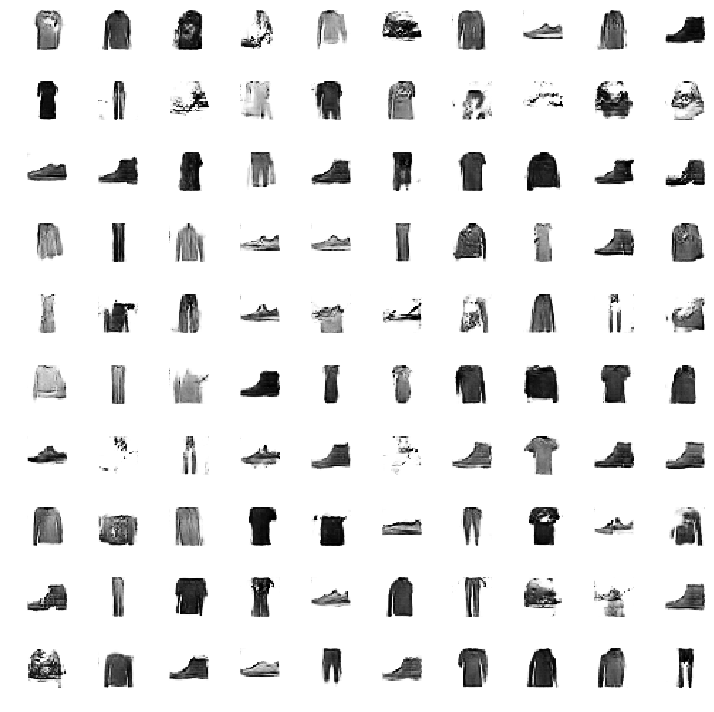

>Saved: ac-gan_generated_plot_0010.png and ac-gan_generator_model_0010.h5
>11, 1/468, dr[0.574,0.603], df[0.729,0.064], g[1.772,0.100]
>11, 2/468, dr[0.720,0.227], df[0.641,0.044], g[1.517,0.034]
>11, 3/468, dr[0.593,0.690], df[0.672,0.053], g[1.640,0.077]
>11, 4/468, dr[0.785,0.491], df[0.609,0.099], g[1.825,0.040]
>11, 5/468, dr[0.816,0.459], df[0.550,0.090], g[1.713,0.059]
>11, 6/468, dr[0.636,0.691], df[0.534,0.093], g[1.328,0.132]
>11, 7/468, dr[0.526,0.604], df[0.602,0.063], g[1.295,0.126]
>11, 8/468, dr[0.386,0.325], df[0.633,0.119], g[1.353,0.079]
>11, 9/468, dr[0.571,0.407], df[0.489,0.109], g[1.573,0.030]
>11, 10/468, dr[0.475,0.511], df[0.561,0.122], g[1.554,0.111]
>11, 11/468, dr[0.687,0.668], df[0.575,0.064], g[1.351,0.108]
>11, 12/468, dr[0.461,0.363], df[0.600,0.071], g[1.546,0.108]
>11, 13/468, dr[0.919,0.419], df[0.725,0.059], g[1.503,0.063]
>11, 14/468, dr[0.555,0.371], df[0.570,0.069], g[1.421,0.126]
>11, 15/468, dr[0.599,0.678], df[0.731,0.071], g[1.459,0.097]
>11, 

>11, 136/468, dr[0.484,0.537], df[0.762,0.121], g[1.584,0.079]
>11, 137/468, dr[0.578,0.474], df[0.690,0.157], g[1.483,0.173]
>11, 138/468, dr[0.601,0.326], df[0.401,0.095], g[1.576,0.147]
>11, 139/468, dr[0.595,0.369], df[0.411,0.037], g[1.677,0.097]
>11, 140/468, dr[0.530,0.299], df[0.800,0.134], g[1.604,0.056]
>11, 141/468, dr[0.584,0.469], df[0.541,0.111], g[1.603,0.075]
>11, 142/468, dr[0.611,0.505], df[0.608,0.072], g[1.399,0.094]
>11, 143/468, dr[0.656,0.957], df[0.599,0.070], g[1.676,0.074]
>11, 144/468, dr[0.462,0.330], df[0.388,0.097], g[1.650,0.062]
>11, 145/468, dr[0.641,0.451], df[0.591,0.053], g[1.611,0.107]
>11, 146/468, dr[0.581,0.383], df[0.795,0.119], g[1.498,0.079]
>11, 147/468, dr[0.634,0.387], df[0.554,0.068], g[1.516,0.049]
>11, 148/468, dr[0.434,0.357], df[0.528,0.028], g[1.516,0.120]
>11, 149/468, dr[0.688,0.351], df[0.505,0.040], g[1.442,0.057]
>11, 150/468, dr[0.764,0.650], df[0.673,0.026], g[1.289,0.131]
>11, 151/468, dr[0.547,0.640], df[1.025,0.058], g[1.344

>11, 267/468, dr[0.832,0.540], df[0.452,0.064], g[1.426,0.078]
>11, 268/468, dr[0.570,0.501], df[0.521,0.059], g[1.374,0.082]
>11, 269/468, dr[0.492,0.580], df[0.635,0.106], g[1.540,0.103]
>11, 270/468, dr[0.722,0.704], df[0.644,0.079], g[1.565,0.036]
>11, 271/468, dr[0.452,0.647], df[0.851,0.157], g[1.528,0.069]
>11, 272/468, dr[0.712,0.616], df[0.638,0.091], g[1.733,0.130]
>11, 273/468, dr[0.756,0.699], df[0.418,0.101], g[1.391,0.134]
>11, 274/468, dr[0.542,0.469], df[0.735,0.063], g[1.592,0.052]
>11, 275/468, dr[0.554,0.486], df[0.530,0.046], g[1.510,0.054]
>11, 276/468, dr[0.536,0.497], df[0.464,0.115], g[1.466,0.059]
>11, 277/468, dr[0.565,0.350], df[0.572,0.038], g[1.684,0.056]
>11, 278/468, dr[0.662,0.364], df[0.534,0.076], g[1.279,0.086]
>11, 279/468, dr[0.667,0.614], df[0.483,0.098], g[1.100,0.109]
>11, 280/468, dr[0.553,0.855], df[0.683,0.049], g[1.242,0.047]
>11, 281/468, dr[0.474,0.771], df[0.555,0.132], g[1.398,0.051]
>11, 282/468, dr[0.578,0.336], df[0.644,0.114], g[1.492

>11, 402/468, dr[0.708,0.565], df[0.713,0.083], g[1.179,0.061]
>11, 403/468, dr[0.515,0.583], df[0.741,0.073], g[1.328,0.037]
>11, 404/468, dr[0.621,0.302], df[0.636,0.128], g[1.615,0.102]
>11, 405/468, dr[0.650,0.424], df[0.434,0.033], g[1.171,0.064]
>11, 406/468, dr[0.575,0.648], df[0.595,0.098], g[1.229,0.123]
>11, 407/468, dr[0.507,0.422], df[0.524,0.035], g[1.640,0.138]
>11, 408/468, dr[0.483,0.608], df[0.606,0.075], g[1.534,0.063]
>11, 409/468, dr[0.801,0.428], df[0.454,0.092], g[1.257,0.040]
>11, 410/468, dr[0.462,0.393], df[0.457,0.082], g[1.300,0.052]
>11, 411/468, dr[0.419,0.560], df[0.676,0.114], g[1.689,0.040]
>11, 412/468, dr[0.513,0.305], df[0.558,0.051], g[1.758,0.064]
>11, 413/468, dr[0.599,0.342], df[0.511,0.041], g[1.481,0.038]
>11, 414/468, dr[0.741,0.566], df[0.634,0.078], g[1.372,0.059]
>11, 415/468, dr[0.671,0.462], df[0.757,0.084], g[1.601,0.071]
>11, 416/468, dr[0.700,0.592], df[0.586,0.077], g[1.596,0.074]
>11, 417/468, dr[0.588,0.392], df[0.623,0.039], g[1.485

>12, 70/468, dr[0.602,0.375], df[0.476,0.068], g[1.553,0.054]
>12, 71/468, dr[0.597,0.280], df[0.731,0.124], g[1.596,0.077]
>12, 72/468, dr[0.558,0.586], df[0.398,0.122], g[1.534,0.042]
>12, 73/468, dr[0.584,0.364], df[0.526,0.092], g[1.311,0.076]
>12, 74/468, dr[0.632,0.386], df[0.801,0.070], g[1.389,0.061]
>12, 75/468, dr[0.644,0.617], df[0.542,0.026], g[1.634,0.071]
>12, 76/468, dr[0.541,0.512], df[0.734,0.063], g[1.432,0.118]
>12, 77/468, dr[0.889,1.116], df[0.638,0.042], g[1.475,0.055]
>12, 78/468, dr[0.589,0.510], df[0.504,0.040], g[1.398,0.096]
>12, 79/468, dr[0.722,0.368], df[0.638,0.041], g[1.434,0.103]
>12, 80/468, dr[0.665,0.496], df[0.735,0.034], g[1.364,0.070]
>12, 81/468, dr[0.635,0.350], df[0.600,0.083], g[1.416,0.030]
>12, 82/468, dr[0.605,0.360], df[0.540,0.112], g[1.527,0.063]
>12, 83/468, dr[0.481,0.230], df[0.526,0.082], g[1.542,0.083]
>12, 84/468, dr[0.529,0.367], df[0.391,0.017], g[1.521,0.086]
>12, 85/468, dr[0.660,0.556], df[0.494,0.057], g[1.237,0.079]
>12, 86/

>12, 205/468, dr[0.585,0.286], df[0.581,0.053], g[1.300,0.152]
>12, 206/468, dr[0.658,0.510], df[0.576,0.151], g[1.586,0.059]
>12, 207/468, dr[0.602,0.379], df[0.615,0.021], g[1.365,0.060]
>12, 208/468, dr[0.592,0.651], df[0.629,0.081], g[1.486,0.069]
>12, 209/468, dr[0.503,0.553], df[0.487,0.080], g[1.524,0.165]
>12, 210/468, dr[0.801,0.573], df[0.580,0.095], g[1.475,0.046]
>12, 211/468, dr[0.441,0.583], df[0.548,0.040], g[1.495,0.069]
>12, 212/468, dr[0.507,0.224], df[0.504,0.050], g[1.497,0.121]
>12, 213/468, dr[0.655,0.179], df[0.514,0.185], g[1.634,0.042]
>12, 214/468, dr[0.577,0.492], df[0.577,0.049], g[1.488,0.099]
>12, 215/468, dr[0.602,0.380], df[0.575,0.057], g[1.418,0.041]
>12, 216/468, dr[0.836,0.344], df[0.638,0.074], g[1.223,0.066]
>12, 217/468, dr[0.566,0.456], df[0.625,0.145], g[1.415,0.072]
>12, 218/468, dr[0.476,0.447], df[0.632,0.107], g[1.531,0.055]
>12, 219/468, dr[0.606,0.348], df[0.517,0.035], g[1.608,0.056]
>12, 220/468, dr[0.792,0.534], df[0.685,0.109], g[1.242

>12, 336/468, dr[0.822,0.390], df[0.647,0.062], g[1.472,0.089]
>12, 337/468, dr[0.630,0.421], df[0.641,0.052], g[1.339,0.077]
>12, 338/468, dr[0.582,0.487], df[0.604,0.048], g[1.249,0.093]
>12, 339/468, dr[0.575,0.582], df[0.583,0.096], g[1.330,0.093]
>12, 340/468, dr[0.636,0.497], df[0.616,0.050], g[1.098,0.043]
>12, 341/468, dr[0.509,0.598], df[0.512,0.062], g[1.265,0.031]
>12, 342/468, dr[0.536,0.340], df[0.643,0.031], g[1.490,0.091]
>12, 343/468, dr[0.541,0.154], df[0.480,0.089], g[1.317,0.043]
>12, 344/468, dr[0.542,0.371], df[0.596,0.039], g[1.406,0.021]
>12, 345/468, dr[0.490,0.753], df[0.598,0.019], g[1.592,0.060]
>12, 346/468, dr[0.661,0.270], df[0.567,0.020], g[1.416,0.058]
>12, 347/468, dr[0.517,0.435], df[0.413,0.039], g[1.255,0.051]
>12, 348/468, dr[0.678,0.402], df[0.643,0.027], g[1.534,0.059]
>12, 349/468, dr[0.599,0.275], df[0.758,0.049], g[1.377,0.056]
>12, 350/468, dr[0.678,0.577], df[0.630,0.024], g[1.294,0.113]
>12, 351/468, dr[0.542,0.387], df[0.516,0.058], g[1.400

>12, 467/468, dr[0.771,0.388], df[0.693,0.101], g[1.330,0.078]
>12, 468/468, dr[0.499,0.515], df[0.652,0.051], g[1.385,0.050]
>13, 1/468, dr[0.783,0.418], df[0.695,0.048], g[1.538,0.081]
>13, 2/468, dr[0.615,0.528], df[0.620,0.024], g[1.376,0.092]
>13, 3/468, dr[0.662,0.372], df[0.524,0.053], g[1.311,0.073]
>13, 4/468, dr[0.506,0.455], df[0.564,0.040], g[1.452,0.054]
>13, 5/468, dr[0.478,0.439], df[0.597,0.030], g[1.306,0.053]
>13, 6/468, dr[0.681,0.877], df[0.634,0.088], g[1.478,0.189]
>13, 7/468, dr[0.583,0.483], df[0.507,0.116], g[1.547,0.083]
>13, 8/468, dr[0.859,0.377], df[0.601,0.061], g[1.248,0.074]
>13, 9/468, dr[0.556,0.490], df[0.584,0.054], g[1.247,0.053]
>13, 10/468, dr[0.481,0.515], df[0.799,0.053], g[1.311,0.068]
>13, 11/468, dr[0.782,0.509], df[0.576,0.057], g[1.551,0.055]
>13, 12/468, dr[0.814,0.395], df[0.522,0.094], g[1.269,0.062]
>13, 13/468, dr[0.420,0.342], df[0.698,0.045], g[1.442,0.080]
>13, 14/468, dr[0.647,0.314], df[0.653,0.087], g[1.526,0.053]
>13, 15/468, dr

>13, 133/468, dr[0.654,0.521], df[0.690,0.024], g[1.447,0.055]
>13, 134/468, dr[0.657,0.336], df[0.632,0.205], g[1.515,0.050]
>13, 135/468, dr[0.595,0.676], df[0.679,0.035], g[1.643,0.088]
>13, 136/468, dr[0.743,0.470], df[0.531,0.091], g[1.402,0.111]
>13, 137/468, dr[0.580,0.418], df[0.672,0.062], g[1.310,0.030]
>13, 138/468, dr[0.669,0.588], df[0.640,0.084], g[1.420,0.100]
>13, 139/468, dr[0.631,0.434], df[0.647,0.093], g[1.376,0.103]
>13, 140/468, dr[0.507,0.784], df[0.624,0.065], g[1.465,0.104]
>13, 141/468, dr[0.666,0.531], df[0.757,0.079], g[1.471,0.051]
>13, 142/468, dr[0.632,0.441], df[0.599,0.028], g[1.593,0.070]
>13, 143/468, dr[0.679,0.756], df[0.596,0.042], g[1.353,0.063]
>13, 144/468, dr[0.809,0.470], df[0.555,0.021], g[1.185,0.044]
>13, 145/468, dr[0.634,0.296], df[0.779,0.087], g[1.441,0.033]
>13, 146/468, dr[0.470,0.545], df[0.720,0.043], g[1.430,0.071]
>13, 147/468, dr[0.705,0.402], df[0.517,0.021], g[1.481,0.097]
>13, 148/468, dr[0.639,0.815], df[0.526,0.062], g[1.316

>13, 264/468, dr[0.480,0.447], df[0.570,0.038], g[1.536,0.040]
>13, 265/468, dr[0.704,0.586], df[0.516,0.072], g[1.311,0.087]
>13, 266/468, dr[0.673,0.554], df[0.661,0.146], g[1.413,0.035]
>13, 267/468, dr[0.538,0.269], df[0.502,0.044], g[1.298,0.067]
>13, 268/468, dr[0.662,0.525], df[0.620,0.035], g[1.307,0.082]
>13, 269/468, dr[0.511,0.583], df[0.559,0.041], g[1.354,0.088]
>13, 270/468, dr[0.616,0.214], df[0.671,0.040], g[1.272,0.044]
>13, 271/468, dr[0.517,0.566], df[0.653,0.121], g[1.596,0.088]
>13, 272/468, dr[0.681,0.231], df[0.575,0.050], g[1.416,0.045]
>13, 273/468, dr[0.500,0.296], df[0.543,0.071], g[1.564,0.038]
>13, 274/468, dr[0.605,0.635], df[0.421,0.102], g[1.489,0.066]
>13, 275/468, dr[0.498,0.498], df[0.728,0.031], g[1.549,0.074]
>13, 276/468, dr[0.635,0.432], df[0.566,0.115], g[1.504,0.093]
>13, 277/468, dr[0.785,0.389], df[0.641,0.122], g[1.331,0.054]
>13, 278/468, dr[0.562,0.545], df[0.610,0.068], g[1.622,0.106]
>13, 279/468, dr[0.582,0.437], df[0.545,0.102], g[1.277

>13, 399/468, dr[0.654,0.596], df[0.579,0.051], g[1.133,0.053]
>13, 400/468, dr[0.435,0.146], df[0.633,0.165], g[1.275,0.072]
>13, 401/468, dr[0.576,0.401], df[0.668,0.039], g[1.561,0.040]
>13, 402/468, dr[0.670,0.658], df[0.544,0.126], g[1.463,0.055]
>13, 403/468, dr[0.779,0.402], df[0.625,0.081], g[1.341,0.138]
>13, 404/468, dr[0.583,0.451], df[0.571,0.130], g[1.425,0.032]
>13, 405/468, dr[0.529,0.414], df[0.621,0.083], g[1.433,0.058]
>13, 406/468, dr[0.619,0.551], df[0.600,0.053], g[1.612,0.068]
>13, 407/468, dr[0.674,0.644], df[0.650,0.067], g[1.385,0.058]
>13, 408/468, dr[0.808,0.319], df[0.793,0.113], g[1.374,0.106]
>13, 409/468, dr[0.594,0.514], df[0.689,0.147], g[1.327,0.087]
>13, 410/468, dr[0.541,0.358], df[0.508,0.046], g[1.352,0.070]
>13, 411/468, dr[0.536,0.673], df[0.684,0.058], g[1.598,0.113]
>13, 412/468, dr[0.773,0.282], df[0.652,0.068], g[1.310,0.059]
>13, 413/468, dr[0.542,0.443], df[0.589,0.025], g[1.842,0.052]
>13, 414/468, dr[0.571,0.412], df[0.494,0.070], g[1.512

>14, 68/468, dr[0.538,0.255], df[0.702,0.073], g[1.575,0.075]
>14, 69/468, dr[0.548,0.776], df[0.502,0.046], g[1.551,0.049]
>14, 70/468, dr[0.747,0.669], df[0.573,0.096], g[1.437,0.045]
>14, 71/468, dr[0.712,0.312], df[0.646,0.034], g[1.276,0.076]
>14, 72/468, dr[0.646,0.629], df[0.622,0.080], g[1.301,0.119]
>14, 73/468, dr[0.550,0.546], df[0.440,0.042], g[1.054,0.100]
>14, 74/468, dr[0.445,0.315], df[0.672,0.253], g[1.345,0.046]
>14, 75/468, dr[0.547,0.504], df[0.457,0.109], g[1.328,0.078]
>14, 76/468, dr[0.752,0.434], df[0.832,0.039], g[1.425,0.063]
>14, 77/468, dr[0.528,0.638], df[0.520,0.018], g[1.446,0.083]
>14, 78/468, dr[0.456,0.599], df[0.576,0.061], g[1.494,0.101]
>14, 79/468, dr[0.771,0.504], df[0.482,0.060], g[1.288,0.082]
>14, 80/468, dr[0.542,0.234], df[0.617,0.093], g[1.256,0.038]
>14, 81/468, dr[0.583,0.414], df[0.568,0.081], g[1.160,0.040]
>14, 82/468, dr[0.875,0.329], df[0.745,0.054], g[1.305,0.115]
>14, 83/468, dr[0.513,0.475], df[0.556,0.129], g[1.409,0.041]
>14, 84/

>14, 199/468, dr[0.544,0.308], df[0.505,0.082], g[1.372,0.104]
>14, 200/468, dr[0.609,0.365], df[0.668,0.119], g[1.492,0.106]
>14, 201/468, dr[0.556,0.614], df[0.652,0.058], g[1.402,0.057]
>14, 202/468, dr[0.794,0.719], df[0.676,0.021], g[1.351,0.069]
>14, 203/468, dr[0.552,0.449], df[0.635,0.038], g[1.476,0.076]
>14, 204/468, dr[0.624,0.478], df[0.546,0.038], g[1.313,0.061]
>14, 205/468, dr[0.698,0.463], df[0.542,0.042], g[1.401,0.070]
>14, 206/468, dr[0.464,0.665], df[0.494,0.062], g[1.468,0.077]
>14, 207/468, dr[0.473,0.223], df[0.570,0.073], g[1.557,0.095]
>14, 208/468, dr[0.757,0.367], df[0.496,0.067], g[1.360,0.106]
>14, 209/468, dr[0.656,0.470], df[0.751,0.132], g[1.210,0.074]
>14, 210/468, dr[0.577,0.459], df[0.711,0.107], g[1.482,0.068]
>14, 211/468, dr[0.622,0.514], df[0.569,0.052], g[1.362,0.033]
>14, 212/468, dr[0.577,0.318], df[0.577,0.073], g[1.365,0.080]
>14, 213/468, dr[0.579,0.701], df[0.524,0.049], g[1.556,0.048]
>14, 214/468, dr[0.720,0.568], df[0.583,0.109], g[1.454

>14, 331/468, dr[0.717,0.442], df[0.665,0.073], g[1.465,0.046]
>14, 332/468, dr[0.665,0.519], df[0.592,0.019], g[1.236,0.112]
>14, 333/468, dr[0.479,0.420], df[0.677,0.063], g[1.582,0.046]
>14, 334/468, dr[0.527,0.417], df[0.511,0.129], g[1.454,0.075]
>14, 335/468, dr[0.800,0.531], df[0.737,0.100], g[1.397,0.079]
>14, 336/468, dr[0.649,0.474], df[0.661,0.054], g[1.127,0.067]
>14, 337/468, dr[0.655,0.487], df[0.642,0.021], g[1.366,0.044]
>14, 338/468, dr[0.478,0.633], df[0.468,0.152], g[1.430,0.091]
>14, 339/468, dr[0.726,0.537], df[0.751,0.123], g[1.341,0.135]
>14, 340/468, dr[0.737,0.290], df[0.485,0.034], g[1.379,0.083]
>14, 341/468, dr[0.609,0.313], df[0.668,0.026], g[1.257,0.033]
>14, 342/468, dr[0.476,0.348], df[0.704,0.023], g[1.271,0.051]
>14, 343/468, dr[0.806,0.489], df[0.640,0.050], g[1.257,0.051]
>14, 344/468, dr[0.531,0.387], df[0.546,0.067], g[1.498,0.051]
>14, 345/468, dr[0.652,0.360], df[0.602,0.044], g[1.379,0.058]
>14, 346/468, dr[0.583,0.576], df[0.607,0.028], g[1.521

>14, 467/468, dr[0.454,0.186], df[0.651,0.124], g[1.301,0.040]
>14, 468/468, dr[0.603,0.235], df[0.684,0.031], g[1.566,0.052]
>15, 1/468, dr[0.557,0.333], df[0.622,0.045], g[1.630,0.123]
>15, 2/468, dr[0.851,0.802], df[0.535,0.070], g[1.290,0.204]
>15, 3/468, dr[0.689,0.563], df[0.698,0.060], g[1.308,0.047]
>15, 4/468, dr[0.481,0.585], df[0.667,0.035], g[1.306,0.058]
>15, 5/468, dr[0.569,0.666], df[0.617,0.065], g[1.419,0.082]
>15, 6/468, dr[0.698,0.400], df[0.573,0.035], g[1.403,0.054]
>15, 7/468, dr[0.675,0.312], df[0.560,0.080], g[1.199,0.051]
>15, 8/468, dr[0.516,0.314], df[0.710,0.083], g[1.233,0.052]
>15, 9/468, dr[0.689,0.660], df[0.511,0.049], g[1.462,0.091]
>15, 10/468, dr[0.484,0.474], df[0.648,0.061], g[1.561,0.063]
>15, 11/468, dr[0.565,0.501], df[0.554,0.085], g[1.360,0.089]
>15, 12/468, dr[0.661,0.488], df[0.639,0.061], g[1.290,0.121]
>15, 13/468, dr[0.642,0.484], df[0.509,0.101], g[1.297,0.044]
>15, 14/468, dr[0.666,0.869], df[0.693,0.026], g[1.169,0.091]
>15, 15/468, dr

>15, 136/468, dr[0.676,0.587], df[0.631,0.057], g[1.564,0.080]
>15, 137/468, dr[0.811,0.213], df[0.701,0.051], g[1.518,0.091]
>15, 138/468, dr[0.675,0.532], df[0.753,0.077], g[1.443,0.065]
>15, 139/468, dr[0.790,0.128], df[0.582,0.050], g[1.321,0.042]
>15, 140/468, dr[0.650,0.562], df[0.552,0.027], g[1.323,0.065]
>15, 141/468, dr[0.544,0.480], df[0.705,0.045], g[1.373,0.081]
>15, 142/468, dr[0.659,0.302], df[0.558,0.040], g[1.318,0.063]
>15, 143/468, dr[0.442,0.242], df[0.629,0.043], g[1.430,0.108]
>15, 144/468, dr[0.634,0.771], df[0.539,0.068], g[1.474,0.172]
>15, 145/468, dr[0.475,0.442], df[0.485,0.169], g[1.470,0.051]
>15, 146/468, dr[0.470,0.357], df[0.721,0.071], g[1.383,0.032]
>15, 147/468, dr[0.712,0.374], df[0.551,0.082], g[1.415,0.051]
>15, 148/468, dr[0.638,0.734], df[0.541,0.050], g[1.391,0.080]
>15, 149/468, dr[0.538,0.457], df[0.603,0.039], g[1.425,0.108]
>15, 150/468, dr[0.587,0.507], df[0.499,0.098], g[1.465,0.048]
>15, 151/468, dr[0.605,0.572], df[0.671,0.035], g[1.148

>15, 269/468, dr[0.556,0.384], df[0.698,0.106], g[1.252,0.138]
>15, 270/468, dr[0.624,0.417], df[0.709,0.091], g[1.308,0.086]
>15, 271/468, dr[0.531,0.447], df[0.623,0.121], g[1.441,0.141]
>15, 272/468, dr[0.666,0.361], df[0.472,0.081], g[1.427,0.045]
>15, 273/468, dr[0.662,0.381], df[0.735,0.059], g[1.376,0.075]
>15, 274/468, dr[0.658,0.493], df[0.550,0.053], g[1.304,0.060]
>15, 275/468, dr[0.622,0.444], df[0.595,0.069], g[1.265,0.055]
>15, 276/468, dr[0.534,0.602], df[0.749,0.037], g[1.454,0.047]
>15, 277/468, dr[0.817,0.550], df[0.640,0.055], g[1.278,0.075]
>15, 278/468, dr[0.443,0.385], df[0.491,0.089], g[1.557,0.099]
>15, 279/468, dr[0.623,0.291], df[0.679,0.064], g[1.425,0.117]
>15, 280/468, dr[0.673,0.580], df[0.494,0.045], g[1.444,0.085]
>15, 281/468, dr[0.569,0.729], df[0.499,0.034], g[1.421,0.069]
>15, 282/468, dr[0.621,0.403], df[0.588,0.084], g[1.399,0.071]
>15, 283/468, dr[0.869,0.387], df[0.450,0.044], g[1.191,0.051]
>15, 284/468, dr[0.442,0.365], df[0.691,0.063], g[1.328

>15, 404/468, dr[0.600,0.565], df[0.648,0.034], g[1.401,0.022]
>15, 405/468, dr[0.796,0.853], df[0.701,0.074], g[1.318,0.085]
>15, 406/468, dr[0.717,0.648], df[0.629,0.087], g[1.404,0.065]
>15, 407/468, dr[0.668,0.593], df[0.792,0.038], g[1.506,0.041]
>15, 408/468, dr[0.507,0.665], df[0.533,0.062], g[1.575,0.071]
>15, 409/468, dr[0.781,0.478], df[0.635,0.095], g[1.396,0.060]
>15, 410/468, dr[0.612,0.681], df[0.490,0.041], g[1.323,0.137]
>15, 411/468, dr[0.417,0.201], df[0.476,0.051], g[1.360,0.045]
>15, 412/468, dr[0.452,0.499], df[0.628,0.051], g[1.450,0.056]
>15, 413/468, dr[0.775,0.317], df[0.585,0.042], g[1.466,0.046]
>15, 414/468, dr[0.400,0.494], df[0.597,0.035], g[1.564,0.109]
>15, 415/468, dr[0.756,0.584], df[0.708,0.043], g[1.537,0.055]
>15, 416/468, dr[0.666,0.383], df[0.552,0.032], g[1.329,0.059]
>15, 417/468, dr[0.574,0.538], df[0.579,0.027], g[1.345,0.044]
>15, 418/468, dr[0.529,0.545], df[0.581,0.073], g[1.381,0.027]
>15, 419/468, dr[0.622,0.370], df[0.483,0.045], g[1.256

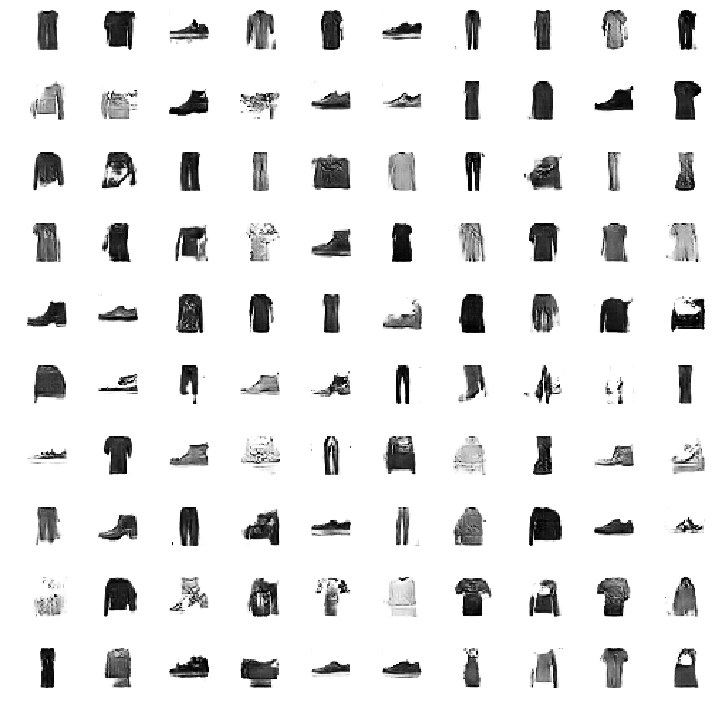

>Saved: ac-gan_generated_plot_0015.png and ac-gan_generator_model_0015.h5
>16, 1/468, dr[0.563,0.359], df[0.692,0.108], g[1.365,0.054]
>16, 2/468, dr[0.637,0.400], df[0.449,0.055], g[1.513,0.051]
>16, 3/468, dr[0.545,0.419], df[0.405,0.011], g[1.365,0.075]
>16, 4/468, dr[0.402,0.444], df[0.514,0.056], g[1.261,0.045]
>16, 5/468, dr[0.568,0.577], df[0.584,0.041], g[1.456,0.095]
>16, 6/468, dr[0.549,0.429], df[0.532,0.103], g[1.421,0.110]
>16, 7/468, dr[0.349,0.346], df[0.595,0.042], g[1.712,0.062]
>16, 8/468, dr[0.614,0.586], df[0.467,0.073], g[1.495,0.029]
>16, 9/468, dr[0.683,0.645], df[0.597,0.043], g[1.305,0.063]
>16, 10/468, dr[0.603,0.433], df[0.755,0.054], g[1.511,0.051]
>16, 11/468, dr[0.570,0.508], df[0.577,0.028], g[1.525,0.044]
>16, 12/468, dr[0.688,0.374], df[0.590,0.051], g[1.507,0.050]
>16, 13/468, dr[0.757,0.586], df[0.643,0.034], g[1.316,0.147]
>16, 14/468, dr[0.671,0.536], df[0.476,0.086], g[1.141,0.035]
>16, 15/468, dr[0.639,0.383], df[0.633,0.028], g[1.265,0.031]
>16, 

>16, 132/468, dr[0.657,0.664], df[0.689,0.085], g[1.405,0.094]
>16, 133/468, dr[0.601,0.770], df[0.594,0.197], g[1.497,0.066]
>16, 134/468, dr[0.791,0.367], df[0.379,0.056], g[1.391,0.084]
>16, 135/468, dr[0.482,0.358], df[0.651,0.043], g[1.442,0.081]
>16, 136/468, dr[0.500,0.642], df[0.520,0.024], g[1.520,0.125]
>16, 137/468, dr[0.730,0.499], df[0.586,0.096], g[1.274,0.109]
>16, 138/468, dr[0.492,0.390], df[0.646,0.036], g[1.418,0.016]
>16, 139/468, dr[0.613,0.607], df[0.588,0.094], g[1.506,0.035]
>16, 140/468, dr[0.574,0.526], df[0.613,0.048], g[1.363,0.053]
>16, 141/468, dr[0.678,0.447], df[0.542,0.047], g[1.302,0.081]
>16, 142/468, dr[0.571,0.752], df[0.613,0.060], g[1.400,0.098]
>16, 143/468, dr[0.776,0.675], df[0.686,0.053], g[1.449,0.034]
>16, 144/468, dr[0.730,0.284], df[0.671,0.042], g[1.237,0.057]
>16, 145/468, dr[0.587,0.671], df[0.770,0.207], g[1.429,0.086]
>16, 146/468, dr[0.500,0.740], df[0.483,0.028], g[1.375,0.092]
>16, 147/468, dr[0.668,0.350], df[0.527,0.051], g[1.381

>16, 268/468, dr[0.541,0.729], df[0.629,0.081], g[1.520,0.057]
>16, 269/468, dr[0.725,0.678], df[0.715,0.069], g[1.318,0.048]
>16, 270/468, dr[0.580,0.549], df[0.717,0.139], g[1.316,0.078]
>16, 271/468, dr[0.583,0.525], df[0.555,0.185], g[1.413,0.091]
>16, 272/468, dr[0.519,0.450], df[0.490,0.059], g[1.362,0.095]
>16, 273/468, dr[0.604,0.302], df[0.526,0.037], g[1.402,0.093]
>16, 274/468, dr[0.578,0.395], df[0.702,0.055], g[1.474,0.061]
>16, 275/468, dr[0.662,0.435], df[0.653,0.111], g[1.324,0.105]
>16, 276/468, dr[0.632,0.205], df[0.590,0.103], g[1.521,0.031]
>16, 277/468, dr[0.586,0.262], df[0.601,0.113], g[1.379,0.101]
>16, 278/468, dr[0.853,0.456], df[0.500,0.064], g[1.179,0.042]
>16, 279/468, dr[0.733,0.559], df[0.639,0.103], g[1.119,0.122]
>16, 280/468, dr[0.458,0.178], df[0.764,0.158], g[1.239,0.054]
>16, 281/468, dr[0.614,0.596], df[0.498,0.043], g[1.337,0.093]
>16, 282/468, dr[0.659,0.495], df[0.637,0.140], g[1.510,0.064]
>16, 283/468, dr[0.583,0.551], df[0.514,0.032], g[1.459

>16, 402/468, dr[0.786,0.665], df[0.634,0.122], g[1.343,0.097]
>16, 403/468, dr[0.445,0.463], df[0.615,0.122], g[1.292,0.063]
>16, 404/468, dr[0.819,0.652], df[0.768,0.082], g[1.470,0.034]
>16, 405/468, dr[0.668,0.450], df[0.739,0.113], g[1.310,0.114]
>16, 406/468, dr[0.572,0.506], df[0.714,0.074], g[1.211,0.136]
>16, 407/468, dr[0.660,0.603], df[0.802,0.117], g[1.311,0.082]
>16, 408/468, dr[0.512,0.493], df[0.584,0.062], g[1.344,0.053]
>16, 409/468, dr[0.811,0.373], df[0.787,0.080], g[1.479,0.051]
>16, 410/468, dr[0.592,0.334], df[0.546,0.109], g[1.326,0.042]
>16, 411/468, dr[0.614,0.350], df[0.676,0.024], g[1.538,0.067]
>16, 412/468, dr[0.596,0.263], df[0.557,0.068], g[1.549,0.103]
>16, 413/468, dr[0.623,0.111], df[0.504,0.030], g[1.563,0.049]
>16, 414/468, dr[0.625,0.474], df[0.704,0.130], g[1.270,0.032]
>16, 415/468, dr[0.761,0.229], df[0.656,0.038], g[1.235,0.071]
>16, 416/468, dr[0.613,0.576], df[0.637,0.037], g[1.622,0.076]
>16, 417/468, dr[0.572,0.528], df[0.496,0.082], g[1.196

>17, 69/468, dr[0.782,0.419], df[0.537,0.036], g[1.226,0.043]
>17, 70/468, dr[0.496,0.545], df[0.599,0.038], g[1.267,0.059]
>17, 71/468, dr[0.543,0.311], df[0.579,0.034], g[1.482,0.104]
>17, 72/468, dr[0.564,0.451], df[0.654,0.025], g[1.357,0.031]
>17, 73/468, dr[0.539,0.377], df[0.614,0.054], g[1.281,0.032]
>17, 74/468, dr[0.629,0.659], df[0.550,0.026], g[1.451,0.093]
>17, 75/468, dr[0.698,0.540], df[0.730,0.091], g[1.511,0.045]
>17, 76/468, dr[0.600,0.491], df[0.619,0.179], g[1.484,0.042]
>17, 77/468, dr[0.599,0.716], df[0.547,0.030], g[1.406,0.095]
>17, 78/468, dr[0.424,0.540], df[0.496,0.059], g[1.612,0.071]
>17, 79/468, dr[0.678,0.584], df[0.657,0.071], g[1.480,0.098]
>17, 80/468, dr[0.598,0.311], df[0.518,0.021], g[1.505,0.067]
>17, 81/468, dr[0.722,0.472], df[0.458,0.062], g[1.167,0.078]
>17, 82/468, dr[0.613,0.386], df[0.593,0.040], g[1.275,0.102]
>17, 83/468, dr[0.498,0.438], df[0.573,0.033], g[1.247,0.086]
>17, 84/468, dr[0.537,0.511], df[0.637,0.051], g[1.385,0.025]
>17, 85/

>17, 200/468, dr[0.515,0.398], df[0.531,0.042], g[1.490,0.056]
>17, 201/468, dr[0.616,0.447], df[0.674,0.066], g[1.429,0.105]
>17, 202/468, dr[0.481,0.227], df[0.699,0.073], g[1.281,0.075]
>17, 203/468, dr[0.447,0.525], df[0.471,0.052], g[1.630,0.058]
>17, 204/468, dr[0.575,0.534], df[0.404,0.049], g[1.401,0.070]
>17, 205/468, dr[0.578,0.210], df[0.428,0.027], g[1.380,0.052]
>17, 206/468, dr[0.491,0.437], df[0.618,0.039], g[1.320,0.047]
>17, 207/468, dr[0.681,0.428], df[0.783,0.125], g[1.567,0.054]
>17, 208/468, dr[0.652,0.651], df[0.579,0.030], g[1.374,0.084]
>17, 209/468, dr[0.814,0.621], df[0.610,0.048], g[1.149,0.060]
>17, 210/468, dr[0.497,0.412], df[0.740,0.094], g[1.327,0.040]
>17, 211/468, dr[0.558,0.512], df[0.512,0.052], g[1.474,0.050]
>17, 212/468, dr[0.635,0.319], df[0.670,0.112], g[1.343,0.115]
>17, 213/468, dr[0.599,0.307], df[0.617,0.039], g[1.309,0.079]
>17, 214/468, dr[0.684,0.342], df[0.556,0.034], g[1.298,0.027]
>17, 215/468, dr[0.668,0.520], df[0.592,0.083], g[1.520

>17, 332/468, dr[0.680,0.468], df[0.663,0.048], g[1.255,0.134]
>17, 333/468, dr[0.506,0.495], df[0.599,0.013], g[1.467,0.152]
>17, 334/468, dr[0.569,0.312], df[0.665,0.044], g[1.571,0.067]
>17, 335/468, dr[0.568,0.427], df[0.439,0.124], g[1.312,0.054]
>17, 336/468, dr[0.720,0.487], df[0.525,0.086], g[1.397,0.067]
>17, 337/468, dr[0.616,0.433], df[0.643,0.119], g[1.346,0.077]
>17, 338/468, dr[0.629,0.339], df[0.595,0.110], g[1.193,0.087]
>17, 339/468, dr[0.599,0.366], df[0.605,0.042], g[1.240,0.057]
>17, 340/468, dr[0.520,0.233], df[0.618,0.085], g[1.612,0.065]
>17, 341/468, dr[0.696,0.268], df[0.530,0.033], g[1.298,0.074]
>17, 342/468, dr[0.658,0.537], df[0.600,0.060], g[1.334,0.048]
>17, 343/468, dr[0.580,0.267], df[0.710,0.065], g[1.428,0.071]
>17, 344/468, dr[0.474,0.324], df[0.650,0.034], g[1.493,0.086]
>17, 345/468, dr[0.765,0.320], df[0.530,0.012], g[1.210,0.112]
>17, 346/468, dr[0.730,0.237], df[0.550,0.075], g[1.226,0.072]
>17, 347/468, dr[0.590,0.490], df[0.634,0.128], g[1.334

>17, 466/468, dr[0.556,0.500], df[0.544,0.095], g[1.492,0.040]
>17, 467/468, dr[0.777,0.374], df[0.482,0.021], g[1.109,0.067]
>17, 468/468, dr[0.596,0.291], df[0.788,0.093], g[1.177,0.072]
>18, 1/468, dr[0.569,0.333], df[0.597,0.136], g[1.211,0.081]
>18, 2/468, dr[0.446,0.406], df[0.566,0.019], g[1.436,0.021]
>18, 3/468, dr[0.459,0.494], df[0.447,0.071], g[1.486,0.046]
>18, 4/468, dr[0.607,0.418], df[0.485,0.019], g[1.389,0.128]
>18, 5/468, dr[0.537,0.400], df[0.588,0.061], g[1.367,0.047]
>18, 6/468, dr[0.586,0.370], df[0.622,0.024], g[1.448,0.049]
>18, 7/468, dr[0.597,0.864], df[0.608,0.153], g[1.662,0.048]
>18, 8/468, dr[0.682,0.339], df[0.471,0.086], g[1.430,0.048]
>18, 9/468, dr[0.536,0.410], df[0.686,0.031], g[1.348,0.038]
>18, 10/468, dr[0.598,0.256], df[0.495,0.073], g[1.379,0.113]
>18, 11/468, dr[0.508,0.420], df[0.760,0.043], g[1.280,0.065]
>18, 12/468, dr[0.609,0.512], df[0.553,0.019], g[1.337,0.042]
>18, 13/468, dr[0.705,0.682], df[0.607,0.085], g[1.358,0.096]
>18, 14/468, d

>18, 132/468, dr[0.674,0.298], df[0.510,0.055], g[1.321,0.106]
>18, 133/468, dr[0.782,0.520], df[0.627,0.078], g[1.071,0.059]
>18, 134/468, dr[0.594,0.268], df[0.642,0.024], g[1.301,0.029]
>18, 135/468, dr[0.563,0.199], df[0.680,0.037], g[1.409,0.057]
>18, 136/468, dr[0.614,0.281], df[0.659,0.020], g[1.335,0.038]
>18, 137/468, dr[0.737,0.572], df[0.562,0.045], g[1.516,0.041]
>18, 138/468, dr[0.496,0.241], df[0.343,0.087], g[1.402,0.066]
>18, 139/468, dr[0.623,0.372], df[0.678,0.064], g[1.253,0.046]
>18, 140/468, dr[0.509,0.397], df[0.642,0.049], g[1.256,0.039]
>18, 141/468, dr[0.724,0.346], df[0.681,0.134], g[1.219,0.115]
>18, 142/468, dr[0.578,0.576], df[0.631,0.049], g[1.323,0.073]
>18, 143/468, dr[0.533,0.307], df[0.563,0.018], g[1.463,0.035]
>18, 144/468, dr[0.665,0.566], df[0.756,0.055], g[1.344,0.043]
>18, 145/468, dr[0.621,0.423], df[0.585,0.059], g[1.466,0.051]
>18, 146/468, dr[0.674,0.320], df[0.600,0.023], g[1.428,0.026]
>18, 147/468, dr[0.743,0.540], df[0.594,0.037], g[1.239

>18, 264/468, dr[0.533,0.417], df[0.534,0.039], g[1.235,0.080]
>18, 265/468, dr[0.526,0.369], df[0.635,0.081], g[1.086,0.047]
>18, 266/468, dr[0.482,0.291], df[0.501,0.057], g[1.485,0.034]
>18, 267/468, dr[0.708,0.705], df[0.584,0.045], g[1.372,0.057]
>18, 268/468, dr[0.650,0.567], df[0.651,0.045], g[1.220,0.051]
>18, 269/468, dr[0.509,0.545], df[0.651,0.035], g[1.420,0.116]
>18, 270/468, dr[0.640,0.236], df[0.798,0.034], g[1.364,0.057]
>18, 271/468, dr[0.784,0.442], df[0.409,0.062], g[1.310,0.066]
>18, 272/468, dr[0.623,0.440], df[0.814,0.024], g[1.402,0.067]
>18, 273/468, dr[0.680,0.304], df[0.628,0.071], g[1.190,0.051]
>18, 274/468, dr[0.585,0.503], df[0.566,0.055], g[1.186,0.098]
>18, 275/468, dr[0.675,0.413], df[0.691,0.120], g[1.274,0.075]
>18, 276/468, dr[0.449,0.467], df[0.656,0.036], g[1.271,0.081]
>18, 277/468, dr[0.730,0.615], df[0.460,0.099], g[1.384,0.034]
>18, 278/468, dr[0.560,0.389], df[0.620,0.021], g[1.332,0.039]
>18, 279/468, dr[0.586,0.251], df[0.575,0.042], g[1.397

>18, 395/468, dr[0.645,0.235], df[0.567,0.024], g[1.276,0.035]
>18, 396/468, dr[0.617,0.523], df[0.589,0.054], g[1.364,0.052]
>18, 397/468, dr[0.486,0.302], df[0.499,0.054], g[1.404,0.151]
>18, 398/468, dr[0.546,0.536], df[0.512,0.073], g[1.489,0.062]
>18, 399/468, dr[0.526,0.456], df[0.507,0.057], g[1.340,0.043]
>18, 400/468, dr[0.807,0.898], df[0.696,0.044], g[1.217,0.078]
>18, 401/468, dr[0.584,0.541], df[0.569,0.071], g[1.215,0.084]
>18, 402/468, dr[0.550,0.479], df[0.600,0.039], g[1.247,0.089]
>18, 403/468, dr[0.502,0.988], df[0.577,0.059], g[1.210,0.064]
>18, 404/468, dr[0.617,0.396], df[0.572,0.054], g[1.387,0.080]
>18, 405/468, dr[0.593,0.330], df[0.560,0.096], g[1.266,0.041]
>18, 406/468, dr[0.728,0.527], df[0.675,0.057], g[1.126,0.066]
>18, 407/468, dr[0.630,0.580], df[0.595,0.035], g[1.067,0.053]
>18, 408/468, dr[0.508,0.286], df[0.632,0.029], g[1.416,0.071]
>18, 409/468, dr[0.621,0.258], df[0.693,0.047], g[1.258,0.075]
>18, 410/468, dr[0.802,0.409], df[0.524,0.052], g[1.173

>19, 59/468, dr[0.614,0.105], df[0.691,0.067], g[1.395,0.038]
>19, 60/468, dr[0.596,0.551], df[0.648,0.082], g[1.217,0.177]
>19, 61/468, dr[0.633,0.358], df[0.659,0.025], g[1.457,0.043]
>19, 62/468, dr[0.611,0.332], df[0.563,0.081], g[1.280,0.043]
>19, 63/468, dr[0.596,0.400], df[0.440,0.028], g[1.323,0.020]
>19, 64/468, dr[0.709,0.566], df[0.569,0.172], g[1.147,0.053]
>19, 65/468, dr[0.445,0.481], df[0.595,0.078], g[1.339,0.042]
>19, 66/468, dr[0.562,0.782], df[0.499,0.051], g[1.152,0.056]
>19, 67/468, dr[0.611,0.185], df[0.653,0.050], g[1.337,0.059]
>19, 68/468, dr[0.619,0.378], df[0.647,0.067], g[1.254,0.041]
>19, 69/468, dr[0.662,0.092], df[0.523,0.075], g[1.433,0.098]
>19, 70/468, dr[0.677,0.475], df[0.420,0.140], g[1.053,0.108]
>19, 71/468, dr[0.459,0.440], df[0.829,0.080], g[1.398,0.077]
>19, 72/468, dr[0.672,0.457], df[0.745,0.021], g[1.330,0.026]
>19, 73/468, dr[0.555,0.217], df[0.600,0.030], g[1.491,0.085]
>19, 74/468, dr[0.725,0.492], df[0.477,0.086], g[1.310,0.084]
>19, 75/

>19, 192/468, dr[0.579,0.453], df[0.539,0.027], g[1.214,0.053]
>19, 193/468, dr[0.477,0.308], df[0.640,0.018], g[1.154,0.079]
>19, 194/468, dr[0.508,0.328], df[0.634,0.047], g[1.218,0.090]
>19, 195/468, dr[0.729,0.383], df[0.821,0.081], g[1.362,0.075]
>19, 196/468, dr[0.711,0.530], df[0.635,0.074], g[1.435,0.073]
>19, 197/468, dr[0.689,0.574], df[0.686,0.036], g[1.422,0.057]
>19, 198/468, dr[0.529,0.215], df[0.497,0.065], g[1.289,0.057]
>19, 199/468, dr[0.631,0.439], df[0.770,0.058], g[1.322,0.052]
>19, 200/468, dr[0.621,0.232], df[0.520,0.048], g[1.413,0.064]
>19, 201/468, dr[0.787,0.775], df[0.619,0.045], g[1.353,0.055]
>19, 202/468, dr[0.543,0.397], df[0.610,0.040], g[1.318,0.054]
>19, 203/468, dr[0.645,0.329], df[0.626,0.032], g[1.290,0.060]
>19, 204/468, dr[0.718,0.407], df[0.691,0.208], g[1.362,0.089]
>19, 205/468, dr[0.515,0.460], df[0.566,0.039], g[1.243,0.070]
>19, 206/468, dr[0.440,0.271], df[0.537,0.030], g[1.407,0.091]
>19, 207/468, dr[0.574,0.300], df[0.666,0.104], g[1.488

>19, 326/468, dr[0.562,0.557], df[0.642,0.064], g[1.357,0.062]
>19, 327/468, dr[0.633,0.441], df[0.613,0.079], g[1.411,0.054]
>19, 328/468, dr[0.650,0.399], df[0.623,0.082], g[1.245,0.031]
>19, 329/468, dr[0.680,0.706], df[0.590,0.067], g[1.236,0.053]
>19, 330/468, dr[0.538,0.445], df[0.730,0.043], g[1.384,0.073]
>19, 331/468, dr[0.576,0.367], df[0.577,0.054], g[1.264,0.072]
>19, 332/468, dr[0.779,0.289], df[0.525,0.036], g[1.300,0.064]
>19, 333/468, dr[0.722,0.309], df[0.780,0.074], g[1.393,0.037]
>19, 334/468, dr[0.540,0.365], df[0.571,0.051], g[1.260,0.047]
>19, 335/468, dr[0.510,0.564], df[0.639,0.024], g[1.410,0.018]
>19, 336/468, dr[0.639,0.309], df[0.576,0.060], g[1.158,0.028]
>19, 337/468, dr[0.500,0.148], df[0.743,0.075], g[1.242,0.047]
>19, 338/468, dr[0.711,0.232], df[0.460,0.037], g[1.523,0.068]
>19, 339/468, dr[0.896,0.417], df[0.718,0.076], g[1.147,0.089]
>19, 340/468, dr[0.610,0.521], df[0.713,0.097], g[0.986,0.036]
>19, 341/468, dr[0.514,0.450], df[0.671,0.042], g[1.245

>19, 458/468, dr[0.688,0.553], df[0.677,0.050], g[1.203,0.041]
>19, 459/468, dr[0.593,0.348], df[0.642,0.031], g[1.181,0.032]
>19, 460/468, dr[0.512,0.272], df[0.583,0.028], g[1.378,0.035]
>19, 461/468, dr[0.677,0.572], df[0.598,0.041], g[1.322,0.044]
>19, 462/468, dr[0.568,0.680], df[0.565,0.047], g[1.253,0.053]
>19, 463/468, dr[0.607,0.242], df[0.604,0.023], g[1.266,0.042]
>19, 464/468, dr[0.626,0.551], df[0.698,0.062], g[1.246,0.079]
>19, 465/468, dr[0.601,0.223], df[0.673,0.068], g[1.266,0.054]
>19, 466/468, dr[0.687,0.443], df[0.532,0.030], g[1.261,0.065]
>19, 467/468, dr[0.658,0.307], df[0.649,0.061], g[1.237,0.033]
>19, 468/468, dr[0.572,0.281], df[0.678,0.067], g[1.071,0.071]
>20, 1/468, dr[0.631,0.355], df[0.532,0.164], g[1.271,0.094]
>20, 2/468, dr[0.622,0.245], df[0.614,0.040], g[1.450,0.040]
>20, 3/468, dr[0.623,0.440], df[0.686,0.074], g[1.241,0.083]
>20, 4/468, dr[0.661,0.252], df[0.611,0.099], g[1.176,0.066]
>20, 5/468, dr[0.673,0.480], df[0.545,0.063], g[1.260,0.029]
>2

>20, 123/468, dr[0.708,0.262], df[0.707,0.045], g[1.374,0.053]
>20, 124/468, dr[0.584,0.518], df[0.621,0.049], g[1.102,0.037]
>20, 125/468, dr[0.617,0.661], df[0.522,0.043], g[1.283,0.122]
>20, 126/468, dr[0.688,0.268], df[0.547,0.125], g[1.280,0.024]
>20, 127/468, dr[0.622,0.305], df[0.628,0.035], g[1.332,0.050]
>20, 128/468, dr[0.654,0.769], df[0.689,0.053], g[1.244,0.082]
>20, 129/468, dr[0.312,0.243], df[0.531,0.109], g[1.294,0.021]
>20, 130/468, dr[0.472,0.344], df[0.552,0.076], g[1.330,0.067]
>20, 131/468, dr[0.844,0.483], df[0.457,0.035], g[1.191,0.061]
>20, 132/468, dr[0.691,0.346], df[0.684,0.086], g[1.113,0.073]
>20, 133/468, dr[0.428,0.495], df[0.695,0.074], g[1.336,0.050]
>20, 134/468, dr[0.585,0.763], df[0.524,0.126], g[1.416,0.053]
>20, 135/468, dr[0.698,0.104], df[0.715,0.032], g[1.298,0.084]
>20, 136/468, dr[0.386,0.369], df[0.430,0.039], g[1.443,0.036]
>20, 137/468, dr[0.748,0.686], df[0.665,0.046], g[1.243,0.078]
>20, 138/468, dr[0.559,0.443], df[0.418,0.046], g[1.283

>20, 255/468, dr[0.768,0.440], df[0.593,0.044], g[1.335,0.063]
>20, 256/468, dr[0.592,0.361], df[0.703,0.081], g[1.357,0.047]
>20, 257/468, dr[0.597,0.502], df[0.542,0.055], g[1.236,0.057]
>20, 258/468, dr[0.618,0.489], df[0.566,0.041], g[1.166,0.098]
>20, 259/468, dr[0.697,0.696], df[0.620,0.026], g[1.274,0.062]
>20, 260/468, dr[0.592,0.343], df[0.498,0.035], g[1.172,0.122]
>20, 261/468, dr[0.572,0.329], df[0.610,0.056], g[1.386,0.069]
>20, 262/468, dr[0.724,0.389], df[0.625,0.023], g[1.238,0.084]
>20, 263/468, dr[0.584,0.389], df[0.710,0.033], g[1.284,0.058]
>20, 264/468, dr[0.820,0.534], df[0.684,0.022], g[1.166,0.050]
>20, 265/468, dr[0.548,0.159], df[0.715,0.019], g[1.415,0.029]
>20, 266/468, dr[0.622,0.289], df[0.486,0.035], g[1.190,0.056]
>20, 267/468, dr[0.668,0.571], df[0.602,0.107], g[1.130,0.044]
>20, 268/468, dr[0.581,0.457], df[0.707,0.033], g[1.114,0.035]
>20, 269/468, dr[0.477,0.956], df[0.662,0.075], g[1.216,0.083]
>20, 270/468, dr[0.639,0.647], df[0.536,0.028], g[1.360

>20, 387/468, dr[0.622,0.398], df[0.719,0.049], g[1.324,0.072]
>20, 388/468, dr[0.520,0.202], df[0.545,0.088], g[1.375,0.028]
>20, 389/468, dr[0.503,0.361], df[0.510,0.096], g[1.252,0.065]
>20, 390/468, dr[0.806,0.532], df[0.630,0.035], g[1.300,0.044]
>20, 391/468, dr[0.576,0.286], df[0.568,0.058], g[1.262,0.120]
>20, 392/468, dr[0.720,0.541], df[0.654,0.039], g[1.309,0.060]
>20, 393/468, dr[0.670,0.569], df[0.688,0.010], g[1.510,0.030]
>20, 394/468, dr[0.698,0.671], df[0.700,0.062], g[1.322,0.038]
>20, 395/468, dr[0.586,0.425], df[0.622,0.067], g[1.387,0.097]
>20, 396/468, dr[0.648,0.497], df[0.482,0.111], g[1.190,0.047]
>20, 397/468, dr[0.963,0.531], df[0.593,0.068], g[1.113,0.029]
>20, 398/468, dr[0.533,0.519], df[0.772,0.088], g[1.098,0.066]
>20, 399/468, dr[0.552,0.311], df[0.619,0.035], g[1.265,0.041]
>20, 400/468, dr[0.448,0.334], df[0.656,0.026], g[1.525,0.044]
>20, 401/468, dr[0.553,0.259], df[0.433,0.075], g[1.343,0.043]
>20, 402/468, dr[0.672,0.528], df[0.503,0.023], g[1.347

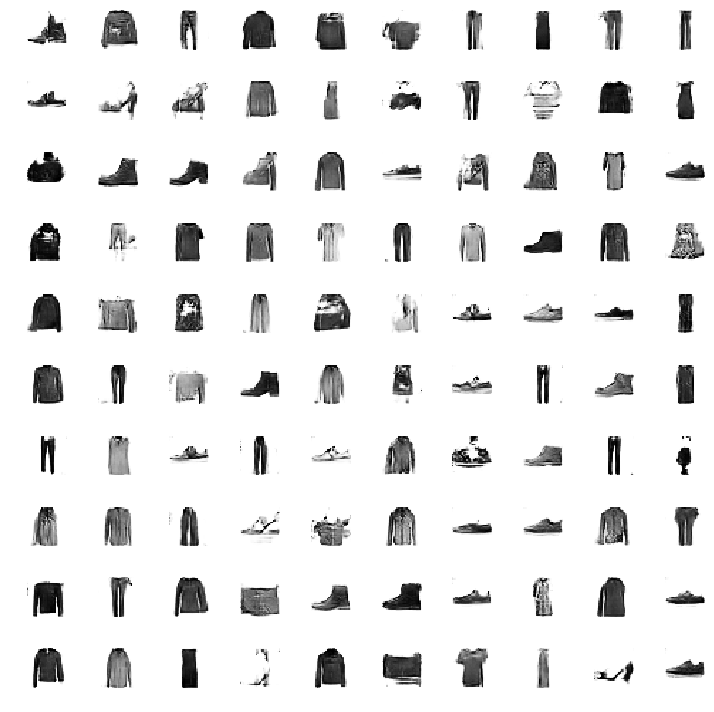

>Saved: ac-gan_generated_plot_0020.png and ac-gan_generator_model_0020.h5
>21, 1/468, dr[0.689,0.525], df[0.606,0.064], g[1.278,0.036]
>21, 2/468, dr[0.574,0.297], df[0.592,0.106], g[1.281,0.098]
>21, 3/468, dr[0.580,0.512], df[0.746,0.112], g[1.388,0.056]
>21, 4/468, dr[0.739,0.540], df[0.526,0.059], g[1.119,0.028]
>21, 5/468, dr[0.536,0.629], df[0.636,0.030], g[1.320,0.077]
>21, 6/468, dr[0.675,0.412], df[0.708,0.032], g[1.332,0.061]
>21, 7/468, dr[0.499,0.321], df[0.571,0.086], g[1.305,0.078]
>21, 8/468, dr[0.698,0.490], df[0.639,0.032], g[1.407,0.044]
>21, 9/468, dr[0.581,0.556], df[0.594,0.052], g[1.462,0.097]
>21, 10/468, dr[0.691,0.301], df[0.563,0.061], g[1.359,0.062]
>21, 11/468, dr[0.675,0.308], df[0.544,0.037], g[1.238,0.107]
>21, 12/468, dr[0.547,0.294], df[0.778,0.033], g[1.211,0.075]
>21, 13/468, dr[0.590,0.601], df[0.501,0.053], g[1.451,0.051]
>21, 14/468, dr[0.469,0.303], df[0.512,0.035], g[1.378,0.099]
>21, 15/468, dr[0.655,0.407], df[0.536,0.168], g[1.535,0.071]
>21, 

>21, 132/468, dr[0.569,0.525], df[0.723,0.074], g[1.094,0.087]
>21, 133/468, dr[0.608,0.459], df[0.680,0.058], g[1.175,0.057]
>21, 134/468, dr[0.696,0.264], df[0.769,0.056], g[1.417,0.079]
>21, 135/468, dr[0.672,0.504], df[0.645,0.034], g[1.306,0.048]
>21, 136/468, dr[0.629,0.491], df[0.485,0.066], g[1.305,0.049]
>21, 137/468, dr[0.769,0.493], df[0.663,0.108], g[1.281,0.061]
>21, 138/468, dr[0.608,0.448], df[0.649,0.072], g[1.340,0.048]
>21, 139/468, dr[0.709,0.697], df[0.656,0.065], g[1.284,0.104]
>21, 140/468, dr[0.678,0.370], df[0.772,0.045], g[1.071,0.057]
>21, 141/468, dr[0.624,0.745], df[0.623,0.055], g[1.261,0.022]
>21, 142/468, dr[0.461,0.236], df[0.611,0.035], g[1.257,0.068]
>21, 143/468, dr[0.531,0.682], df[0.545,0.052], g[1.334,0.040]
>21, 144/468, dr[0.692,0.397], df[0.497,0.043], g[1.383,0.080]
>21, 145/468, dr[0.588,0.578], df[0.655,0.089], g[1.417,0.103]
>21, 146/468, dr[0.597,0.322], df[0.501,0.100], g[1.345,0.038]
>21, 147/468, dr[0.579,0.376], df[0.578,0.034], g[1.362

>21, 265/468, dr[0.615,0.859], df[0.550,0.069], g[1.291,0.024]
>21, 266/468, dr[0.572,0.395], df[0.576,0.027], g[1.166,0.026]
>21, 267/468, dr[0.590,0.513], df[0.669,0.028], g[1.259,0.065]
>21, 268/468, dr[0.540,0.228], df[0.552,0.115], g[1.224,0.050]
>21, 269/468, dr[0.567,0.244], df[0.629,0.016], g[1.296,0.042]
>21, 270/468, dr[0.498,0.424], df[0.484,0.039], g[1.347,0.068]
>21, 271/468, dr[0.659,0.393], df[0.663,0.041], g[1.103,0.052]
>21, 272/468, dr[0.677,0.340], df[0.797,0.038], g[1.215,0.063]
>21, 273/468, dr[0.593,0.219], df[0.401,0.018], g[1.333,0.074]
>21, 274/468, dr[0.714,0.936], df[0.547,0.014], g[1.069,0.095]
>21, 275/468, dr[0.622,0.354], df[0.817,0.069], g[1.143,0.049]
>21, 276/468, dr[0.629,0.441], df[0.570,0.010], g[1.235,0.092]
>21, 277/468, dr[0.592,0.334], df[0.812,0.033], g[1.417,0.041]
>21, 278/468, dr[0.697,0.630], df[0.655,0.027], g[1.262,0.024]
>21, 279/468, dr[0.508,0.348], df[0.530,0.041], g[1.429,0.033]
>21, 280/468, dr[0.576,0.474], df[0.597,0.122], g[1.192

>21, 401/468, dr[0.606,0.450], df[0.664,0.026], g[1.276,0.038]
>21, 402/468, dr[0.656,0.487], df[0.597,0.039], g[1.416,0.050]
>21, 403/468, dr[0.555,0.668], df[0.697,0.043], g[1.507,0.103]
>21, 404/468, dr[0.624,0.421], df[0.451,0.018], g[1.330,0.112]
>21, 405/468, dr[0.634,0.283], df[0.565,0.055], g[1.141,0.073]
>21, 406/468, dr[0.558,0.253], df[0.569,0.086], g[1.249,0.050]
>21, 407/468, dr[0.403,0.305], df[0.567,0.031], g[1.120,0.118]
>21, 408/468, dr[0.728,0.694], df[0.605,0.139], g[1.137,0.050]
>21, 409/468, dr[0.561,0.426], df[0.638,0.041], g[1.214,0.053]
>21, 410/468, dr[0.686,0.706], df[0.571,0.038], g[1.357,0.086]
>21, 411/468, dr[0.573,0.385], df[0.547,0.049], g[1.161,0.054]
>21, 412/468, dr[0.656,0.416], df[0.566,0.066], g[1.388,0.029]
>21, 413/468, dr[0.527,0.695], df[0.665,0.050], g[1.425,0.099]
>21, 414/468, dr[0.665,0.484], df[0.602,0.042], g[1.287,0.032]
>21, 415/468, dr[0.504,0.800], df[0.568,0.045], g[1.212,0.070]
>21, 416/468, dr[0.615,0.283], df[0.572,0.038], g[1.159

>22, 66/468, dr[0.680,0.476], df[0.611,0.047], g[1.347,0.058]
>22, 67/468, dr[0.553,0.466], df[0.698,0.043], g[1.231,0.078]
>22, 68/468, dr[0.512,0.443], df[0.546,0.039], g[1.528,0.091]
>22, 69/468, dr[0.854,0.444], df[0.670,0.030], g[1.271,0.029]
>22, 70/468, dr[0.721,0.374], df[0.720,0.051], g[1.333,0.048]
>22, 71/468, dr[0.661,0.484], df[0.673,0.029], g[1.258,0.058]
>22, 72/468, dr[0.705,0.456], df[0.781,0.065], g[1.149,0.085]
>22, 73/468, dr[0.504,0.359], df[0.585,0.046], g[1.489,0.023]
>22, 74/468, dr[0.818,0.364], df[0.603,0.122], g[1.419,0.025]
>22, 75/468, dr[0.494,0.451], df[0.812,0.065], g[1.353,0.042]
>22, 76/468, dr[0.786,0.451], df[0.515,0.047], g[1.314,0.048]
>22, 77/468, dr[0.912,0.686], df[0.579,0.040], g[1.223,0.045]
>22, 78/468, dr[0.438,0.253], df[0.516,0.082], g[1.137,0.029]
>22, 79/468, dr[0.522,0.274], df[0.712,0.030], g[1.309,0.061]
>22, 80/468, dr[0.560,0.244], df[0.605,0.017], g[1.424,0.031]
>22, 81/468, dr[0.527,0.334], df[0.398,0.047], g[1.221,0.043]
>22, 82/

>22, 202/468, dr[0.582,0.345], df[0.620,0.069], g[1.454,0.049]
>22, 203/468, dr[0.597,0.478], df[0.599,0.051], g[1.305,0.048]
>22, 204/468, dr[0.646,0.437], df[0.488,0.040], g[1.254,0.025]
>22, 205/468, dr[0.579,0.472], df[0.739,0.023], g[1.106,0.044]
>22, 206/468, dr[0.629,0.391], df[0.542,0.094], g[1.247,0.030]
>22, 207/468, dr[0.561,0.197], df[0.738,0.037], g[1.310,0.037]
>22, 208/468, dr[0.691,0.752], df[0.665,0.068], g[1.257,0.044]
>22, 209/468, dr[0.630,0.515], df[0.476,0.076], g[1.202,0.058]
>22, 210/468, dr[0.502,0.497], df[0.619,0.053], g[1.193,0.063]
>22, 211/468, dr[0.629,0.314], df[0.515,0.023], g[1.172,0.042]
>22, 212/468, dr[0.684,0.460], df[0.473,0.044], g[1.377,0.050]
>22, 213/468, dr[0.738,0.817], df[0.810,0.064], g[1.130,0.072]
>22, 214/468, dr[0.529,0.299], df[0.840,0.058], g[1.235,0.081]
>22, 215/468, dr[0.411,0.429], df[0.527,0.059], g[1.367,0.064]
>22, 216/468, dr[0.654,0.298], df[0.509,0.018], g[1.239,0.051]
>22, 217/468, dr[0.500,0.612], df[0.640,0.094], g[1.364

>22, 335/468, dr[0.762,0.339], df[0.548,0.057], g[1.415,0.062]
>22, 336/468, dr[0.725,0.615], df[0.679,0.045], g[1.378,0.079]
>22, 337/468, dr[0.674,0.348], df[0.529,0.065], g[1.281,0.111]
>22, 338/468, dr[0.502,0.588], df[0.594,0.039], g[1.365,0.069]
>22, 339/468, dr[0.729,0.603], df[0.504,0.063], g[1.299,0.052]
>22, 340/468, dr[0.624,0.374], df[0.680,0.053], g[1.284,0.049]
>22, 341/468, dr[0.565,0.481], df[0.585,0.018], g[1.529,0.030]
>22, 342/468, dr[0.706,0.589], df[0.552,0.071], g[1.256,0.153]
>22, 343/468, dr[0.685,0.579], df[0.783,0.063], g[1.349,0.055]
>22, 344/468, dr[0.581,0.338], df[0.504,0.026], g[1.177,0.032]
>22, 345/468, dr[0.722,0.397], df[0.775,0.090], g[1.179,0.062]
>22, 346/468, dr[0.497,0.611], df[0.700,0.137], g[1.175,0.043]
>22, 347/468, dr[0.648,0.444], df[0.637,0.069], g[1.257,0.083]
>22, 348/468, dr[0.570,0.419], df[0.535,0.027], g[1.270,0.049]
>22, 349/468, dr[0.545,0.327], df[0.610,0.035], g[1.408,0.054]
>22, 350/468, dr[0.688,0.281], df[0.548,0.063], g[1.279

>22, 467/468, dr[0.684,0.675], df[0.576,0.034], g[1.272,0.060]
>22, 468/468, dr[0.472,0.277], df[0.592,0.019], g[1.432,0.031]
>23, 1/468, dr[0.720,0.352], df[0.494,0.080], g[1.178,0.044]
>23, 2/468, dr[0.601,0.367], df[0.559,0.070], g[1.280,0.032]
>23, 3/468, dr[0.513,0.395], df[0.550,0.034], g[1.296,0.036]
>23, 4/468, dr[0.646,0.356], df[0.728,0.039], g[1.146,0.043]
>23, 5/468, dr[0.774,0.243], df[0.667,0.025], g[1.080,0.033]
>23, 6/468, dr[0.517,0.389], df[0.628,0.038], g[1.168,0.033]
>23, 7/468, dr[0.481,0.609], df[0.525,0.028], g[1.397,0.025]
>23, 8/468, dr[0.792,0.319], df[0.539,0.126], g[1.236,0.057]
>23, 9/468, dr[0.519,0.632], df[0.650,0.045], g[1.352,0.038]
>23, 10/468, dr[0.555,0.509], df[0.626,0.091], g[1.244,0.067]
>23, 11/468, dr[0.720,0.222], df[0.567,0.120], g[1.285,0.050]
>23, 12/468, dr[0.590,0.321], df[0.552,0.041], g[1.203,0.094]
>23, 13/468, dr[0.690,0.467], df[0.601,0.049], g[1.198,0.031]
>23, 14/468, dr[0.672,0.365], df[0.719,0.025], g[1.357,0.082]
>23, 15/468, dr

>23, 135/468, dr[0.450,0.635], df[0.501,0.065], g[1.345,0.059]
>23, 136/468, dr[0.764,0.526], df[0.682,0.043], g[1.122,0.049]
>23, 137/468, dr[0.666,0.567], df[0.626,0.071], g[1.189,0.053]
>23, 138/468, dr[0.699,0.256], df[0.585,0.067], g[1.211,0.068]
>23, 139/468, dr[0.568,0.278], df[0.688,0.058], g[1.411,0.086]
>23, 140/468, dr[0.433,0.131], df[0.587,0.111], g[1.583,0.097]
>23, 141/468, dr[0.694,0.621], df[0.598,0.102], g[1.312,0.065]
>23, 142/468, dr[0.637,0.676], df[0.622,0.049], g[1.195,0.108]
>23, 143/468, dr[0.648,0.428], df[0.621,0.080], g[1.177,0.046]
>23, 144/468, dr[0.679,0.254], df[0.653,0.070], g[1.235,0.092]
>23, 145/468, dr[0.446,0.182], df[0.595,0.093], g[1.276,0.044]
>23, 146/468, dr[0.693,0.634], df[0.563,0.033], g[1.347,0.057]
>23, 147/468, dr[0.646,0.490], df[0.591,0.027], g[1.200,0.028]
>23, 148/468, dr[0.522,0.402], df[0.552,0.032], g[1.167,0.105]
>23, 149/468, dr[0.747,0.359], df[0.694,0.042], g[1.184,0.035]
>23, 150/468, dr[0.670,0.425], df[0.572,0.062], g[1.299

>23, 267/468, dr[0.541,0.379], df[0.511,0.126], g[1.279,0.032]
>23, 268/468, dr[0.625,0.455], df[0.818,0.143], g[1.230,0.099]
>23, 269/468, dr[0.453,0.482], df[0.553,0.033], g[1.273,0.113]
>23, 270/468, dr[0.659,0.434], df[0.543,0.039], g[1.309,0.067]
>23, 271/468, dr[0.728,0.279], df[0.522,0.040], g[1.348,0.072]
>23, 272/468, dr[0.616,0.404], df[0.688,0.029], g[1.127,0.069]
>23, 273/468, dr[0.651,0.257], df[0.536,0.089], g[1.434,0.055]
>23, 274/468, dr[0.664,0.462], df[0.630,0.066], g[1.166,0.059]
>23, 275/468, dr[0.497,0.306], df[0.674,0.083], g[1.319,0.091]
>23, 276/468, dr[0.579,0.569], df[0.595,0.068], g[1.483,0.082]
>23, 277/468, dr[0.742,0.326], df[0.580,0.049], g[1.303,0.051]
>23, 278/468, dr[0.696,0.613], df[0.695,0.053], g[1.322,0.039]
>23, 279/468, dr[0.478,0.606], df[0.567,0.076], g[1.282,0.055]
>23, 280/468, dr[0.612,0.377], df[0.672,0.057], g[1.391,0.076]
>23, 281/468, dr[0.606,0.362], df[0.656,0.013], g[1.346,0.042]
>23, 282/468, dr[0.707,0.517], df[0.567,0.075], g[1.392

>23, 401/468, dr[0.871,0.583], df[0.687,0.096], g[1.266,0.071]
>23, 402/468, dr[0.650,0.327], df[0.591,0.063], g[1.301,0.063]
>23, 403/468, dr[0.620,0.609], df[0.688,0.096], g[1.288,0.066]
>23, 404/468, dr[0.642,0.524], df[0.588,0.029], g[1.384,0.045]
>23, 405/468, dr[0.670,0.510], df[0.654,0.030], g[1.375,0.051]
>23, 406/468, dr[0.529,0.536], df[0.580,0.102], g[1.227,0.056]
>23, 407/468, dr[0.749,0.362], df[0.520,0.050], g[1.192,0.053]
>23, 408/468, dr[0.573,0.399], df[0.653,0.058], g[1.120,0.059]
>23, 409/468, dr[0.627,0.459], df[0.592,0.036], g[1.283,0.013]
>23, 410/468, dr[0.457,0.357], df[0.582,0.077], g[1.321,0.069]
>23, 411/468, dr[0.644,0.478], df[0.536,0.043], g[1.162,0.052]
>23, 412/468, dr[0.641,0.477], df[0.640,0.021], g[1.203,0.098]
>23, 413/468, dr[0.738,0.390], df[0.618,0.116], g[1.381,0.025]
>23, 414/468, dr[0.590,0.511], df[0.627,0.056], g[1.106,0.073]
>23, 415/468, dr[0.635,0.562], df[0.671,0.033], g[1.142,0.031]
>23, 416/468, dr[0.413,0.596], df[0.532,0.035], g[1.300

>24, 65/468, dr[0.773,0.739], df[0.818,0.016], g[1.117,0.036]
>24, 66/468, dr[0.600,0.310], df[0.803,0.054], g[1.141,0.047]
>24, 67/468, dr[0.650,0.217], df[0.662,0.042], g[1.130,0.079]
>24, 68/468, dr[0.583,0.397], df[0.706,0.020], g[1.190,0.078]
>24, 69/468, dr[0.651,0.329], df[0.681,0.065], g[1.206,0.074]
>24, 70/468, dr[0.840,0.544], df[0.699,0.061], g[1.165,0.078]
>24, 71/468, dr[0.699,0.506], df[0.649,0.067], g[1.194,0.035]
>24, 72/468, dr[0.629,0.418], df[0.607,0.038], g[1.122,0.046]
>24, 73/468, dr[0.451,0.529], df[0.620,0.082], g[1.259,0.057]
>24, 74/468, dr[0.535,0.293], df[0.516,0.048], g[1.118,0.074]
>24, 75/468, dr[0.643,0.403], df[0.610,0.075], g[1.366,0.068]
>24, 76/468, dr[0.686,0.541], df[0.590,0.027], g[1.129,0.048]
>24, 77/468, dr[0.584,0.195], df[0.652,0.068], g[1.345,0.028]
>24, 78/468, dr[0.655,0.367], df[0.595,0.026], g[1.208,0.030]
>24, 79/468, dr[0.600,0.224], df[0.621,0.216], g[1.156,0.075]
>24, 80/468, dr[0.638,0.300], df[0.558,0.080], g[1.353,0.032]
>24, 81/

>24, 199/468, dr[0.544,0.807], df[0.800,0.032], g[1.212,0.037]
>24, 200/468, dr[0.603,0.491], df[0.594,0.021], g[1.208,0.045]
>24, 201/468, dr[0.721,0.669], df[0.657,0.166], g[1.272,0.044]
>24, 202/468, dr[0.898,0.329], df[0.686,0.066], g[1.007,0.039]
>24, 203/468, dr[0.579,0.674], df[0.676,0.065], g[1.173,0.030]
>24, 204/468, dr[0.616,0.215], df[0.718,0.058], g[1.261,0.044]
>24, 205/468, dr[0.644,0.415], df[0.725,0.033], g[1.147,0.037]
>24, 206/468, dr[0.639,0.405], df[0.504,0.057], g[1.216,0.038]
>24, 207/468, dr[0.633,0.718], df[0.637,0.045], g[1.191,0.057]
>24, 208/468, dr[0.472,0.340], df[0.586,0.084], g[1.202,0.052]
>24, 209/468, dr[0.642,0.611], df[0.604,0.026], g[1.387,0.048]
>24, 210/468, dr[0.546,0.210], df[0.537,0.025], g[1.404,0.025]
>24, 211/468, dr[0.573,0.433], df[0.551,0.049], g[1.395,0.068]
>24, 212/468, dr[0.640,0.485], df[0.691,0.041], g[1.375,0.061]
>24, 213/468, dr[0.745,0.346], df[0.465,0.023], g[1.123,0.080]
>24, 214/468, dr[0.659,0.664], df[0.759,0.051], g[1.142

>24, 335/468, dr[0.703,0.314], df[0.683,0.055], g[1.280,0.078]
>24, 336/468, dr[0.741,0.415], df[0.681,0.027], g[1.277,0.033]
>24, 337/468, dr[0.668,0.558], df[0.658,0.061], g[1.250,0.022]
>24, 338/468, dr[0.672,0.365], df[0.660,0.123], g[1.225,0.032]
>24, 339/468, dr[0.711,0.253], df[0.621,0.048], g[1.397,0.042]
>24, 340/468, dr[0.602,0.453], df[0.613,0.043], g[1.170,0.033]
>24, 341/468, dr[0.806,0.388], df[0.554,0.010], g[1.108,0.022]
>24, 342/468, dr[0.585,0.228], df[0.605,0.030], g[1.189,0.053]
>24, 343/468, dr[0.577,0.397], df[0.758,0.030], g[1.306,0.034]
>24, 344/468, dr[0.690,0.648], df[0.676,0.036], g[1.420,0.028]
>24, 345/468, dr[0.569,0.404], df[0.599,0.024], g[1.257,0.109]
>24, 346/468, dr[0.824,0.662], df[0.591,0.110], g[1.243,0.051]
>24, 347/468, dr[0.488,0.268], df[0.652,0.024], g[1.348,0.037]
>24, 348/468, dr[0.666,0.273], df[0.620,0.012], g[1.403,0.058]
>24, 349/468, dr[0.678,0.522], df[0.461,0.021], g[1.196,0.059]
>24, 350/468, dr[0.688,0.514], df[0.677,0.065], g[1.128

>25, 1/468, dr[0.603,0.417], df[0.647,0.072], g[1.308,0.040]
>25, 2/468, dr[0.668,0.460], df[0.684,0.154], g[1.340,0.071]
>25, 3/468, dr[0.610,0.421], df[0.543,0.048], g[1.163,0.054]
>25, 4/468, dr[0.540,0.315], df[0.557,0.087], g[1.165,0.089]
>25, 5/468, dr[0.523,0.306], df[0.558,0.017], g[1.257,0.050]
>25, 6/468, dr[0.637,0.481], df[0.729,0.046], g[1.264,0.054]
>25, 7/468, dr[0.773,0.237], df[0.552,0.043], g[1.294,0.037]
>25, 8/468, dr[0.612,0.412], df[0.777,0.017], g[1.257,0.021]
>25, 9/468, dr[0.510,0.319], df[0.592,0.021], g[1.357,0.029]
>25, 10/468, dr[0.619,0.817], df[0.419,0.027], g[1.346,0.032]
>25, 11/468, dr[0.688,0.343], df[0.726,0.042], g[1.270,0.094]
>25, 12/468, dr[0.626,0.209], df[0.645,0.093], g[1.074,0.053]
>25, 13/468, dr[0.768,0.414], df[0.668,0.069], g[1.161,0.046]
>25, 14/468, dr[0.525,0.303], df[0.598,0.094], g[1.193,0.025]
>25, 15/468, dr[0.581,0.365], df[0.579,0.060], g[1.331,0.049]
>25, 16/468, dr[0.568,0.640], df[0.490,0.105], g[1.212,0.024]
>25, 17/468, dr[0

>25, 137/468, dr[0.648,0.295], df[0.685,0.051], g[1.542,0.057]
>25, 138/468, dr[0.827,0.572], df[0.682,0.090], g[1.359,0.041]
>25, 139/468, dr[0.683,0.102], df[0.626,0.043], g[1.260,0.045]
>25, 140/468, dr[0.728,0.403], df[0.671,0.212], g[1.275,0.064]
>25, 141/468, dr[0.544,0.449], df[0.710,0.153], g[1.282,0.097]
>25, 142/468, dr[0.758,0.339], df[0.756,0.057], g[1.211,0.053]
>25, 143/468, dr[0.528,0.601], df[0.514,0.079], g[1.221,0.039]
>25, 144/468, dr[0.519,0.379], df[0.496,0.096], g[1.176,0.090]
>25, 145/468, dr[0.665,0.355], df[0.566,0.043], g[1.055,0.058]
>25, 146/468, dr[0.643,0.625], df[0.854,0.117], g[1.163,0.088]
>25, 147/468, dr[0.471,0.286], df[0.632,0.069], g[1.076,0.048]
>25, 148/468, dr[0.739,0.471], df[0.697,0.046], g[1.074,0.035]
>25, 149/468, dr[0.610,0.449], df[0.583,0.049], g[1.133,0.091]
>25, 150/468, dr[0.739,0.232], df[0.501,0.028], g[1.338,0.052]
>25, 151/468, dr[0.518,0.434], df[0.662,0.021], g[1.229,0.113]
>25, 152/468, dr[0.576,0.672], df[0.603,0.029], g[1.130

>25, 271/468, dr[0.709,0.403], df[0.555,0.089], g[1.372,0.047]
>25, 272/468, dr[0.564,0.224], df[0.529,0.038], g[1.508,0.073]
>25, 273/468, dr[0.531,0.302], df[0.514,0.031], g[1.272,0.056]
>25, 274/468, dr[0.783,0.196], df[0.610,0.032], g[1.226,0.051]
>25, 275/468, dr[0.472,0.509], df[0.653,0.022], g[1.231,0.050]
>25, 276/468, dr[0.600,0.220], df[0.612,0.131], g[1.165,0.061]
>25, 277/468, dr[0.514,0.294], df[0.692,0.093], g[1.293,0.032]
>25, 278/468, dr[0.801,0.724], df[0.697,0.101], g[1.133,0.049]
>25, 279/468, dr[0.591,0.535], df[0.783,0.135], g[1.161,0.062]
>25, 280/468, dr[0.666,0.279], df[0.610,0.070], g[1.196,0.029]
>25, 281/468, dr[0.606,0.681], df[0.668,0.090], g[1.223,0.069]
>25, 282/468, dr[0.875,0.703], df[0.671,0.084], g[1.061,0.026]
>25, 283/468, dr[0.665,0.331], df[0.709,0.079], g[1.194,0.042]
>25, 284/468, dr[0.569,0.613], df[0.620,0.052], g[1.236,0.045]
>25, 285/468, dr[0.612,0.591], df[0.615,0.044], g[1.266,0.074]
>25, 286/468, dr[0.616,0.803], df[0.474,0.036], g[1.150

>25, 402/468, dr[0.704,0.437], df[0.795,0.113], g[1.189,0.058]
>25, 403/468, dr[0.565,0.308], df[0.711,0.070], g[1.198,0.034]
>25, 404/468, dr[0.680,0.388], df[0.759,0.025], g[1.383,0.037]
>25, 405/468, dr[0.686,0.477], df[0.439,0.021], g[1.097,0.105]
>25, 406/468, dr[0.665,0.166], df[0.789,0.028], g[1.137,0.057]
>25, 407/468, dr[0.759,0.421], df[0.581,0.038], g[1.049,0.107]
>25, 408/468, dr[0.618,0.456], df[0.696,0.158], g[1.039,0.058]
>25, 409/468, dr[0.644,0.351], df[0.712,0.063], g[1.278,0.075]
>25, 410/468, dr[0.711,0.533], df[0.651,0.017], g[1.280,0.021]
>25, 411/468, dr[0.661,0.499], df[0.679,0.101], g[1.191,0.024]
>25, 412/468, dr[0.478,0.395], df[0.552,0.038], g[1.302,0.030]
>25, 413/468, dr[0.554,0.359], df[0.604,0.035], g[1.292,0.041]
>25, 414/468, dr[0.739,0.604], df[0.660,0.149], g[1.217,0.053]
>25, 415/468, dr[0.675,0.327], df[0.619,0.027], g[1.276,0.039]
>25, 416/468, dr[0.577,0.702], df[0.557,0.014], g[1.397,0.034]
>25, 417/468, dr[0.742,0.685], df[0.608,0.024], g[1.213

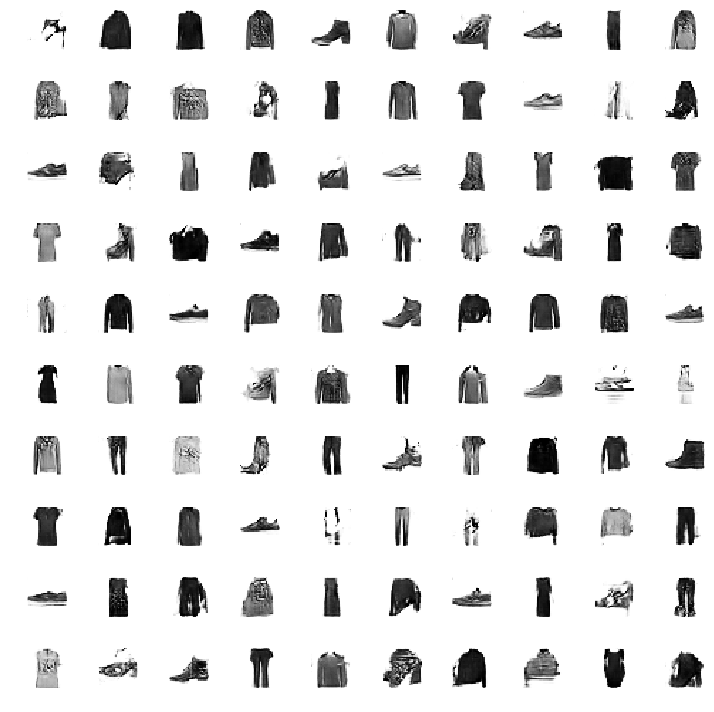

>Saved: ac-gan_generated_plot_0025.png and ac-gan_generator_model_0025.h5
>26, 1/468, dr[0.475,0.290], df[0.679,0.115], g[1.337,0.038]
>26, 2/468, dr[0.719,0.235], df[0.661,0.012], g[1.353,0.093]
>26, 3/468, dr[0.560,0.541], df[0.507,0.090], g[1.343,0.069]
>26, 4/468, dr[0.668,0.617], df[0.499,0.095], g[1.204,0.020]
>26, 5/468, dr[0.784,0.542], df[0.653,0.070], g[1.038,0.125]
>26, 6/468, dr[0.563,0.573], df[0.803,0.069], g[1.205,0.103]
>26, 7/468, dr[0.626,0.512], df[0.599,0.043], g[1.170,0.018]
>26, 8/468, dr[0.628,0.448], df[0.519,0.077], g[1.256,0.069]
>26, 9/468, dr[0.630,0.493], df[0.654,0.029], g[1.206,0.047]
>26, 10/468, dr[0.711,0.475], df[0.629,0.016], g[1.224,0.056]
>26, 11/468, dr[0.730,0.499], df[0.678,0.260], g[1.294,0.041]
>26, 12/468, dr[0.635,0.158], df[0.690,0.033], g[1.187,0.035]
>26, 13/468, dr[0.690,0.332], df[0.553,0.028], g[1.251,0.046]
>26, 14/468, dr[0.793,0.317], df[0.661,0.092], g[1.228,0.034]
>26, 15/468, dr[0.616,0.518], df[0.707,0.031], g[1.099,0.053]
>26, 

>26, 135/468, dr[0.593,0.532], df[0.605,0.087], g[1.227,0.056]
>26, 136/468, dr[0.678,0.385], df[0.559,0.035], g[1.177,0.045]
>26, 137/468, dr[0.601,0.630], df[0.552,0.124], g[1.325,0.059]
>26, 138/468, dr[0.617,0.446], df[0.737,0.203], g[1.205,0.045]
>26, 139/468, dr[0.695,0.374], df[0.624,0.027], g[1.147,0.055]
>26, 140/468, dr[0.523,0.621], df[0.647,0.023], g[1.204,0.047]
>26, 141/468, dr[0.762,0.330], df[0.571,0.026], g[1.243,0.045]
>26, 142/468, dr[0.573,0.565], df[0.601,0.136], g[1.182,0.080]
>26, 143/468, dr[0.588,0.231], df[0.578,0.093], g[1.135,0.055]
>26, 144/468, dr[0.765,0.401], df[0.825,0.076], g[1.216,0.075]
>26, 145/468, dr[0.687,0.185], df[0.638,0.087], g[1.200,0.070]
>26, 146/468, dr[0.759,0.521], df[0.628,0.022], g[1.143,0.129]
>26, 147/468, dr[0.617,0.464], df[0.607,0.150], g[1.199,0.043]
>26, 148/468, dr[0.553,0.532], df[0.750,0.028], g[1.282,0.060]
>26, 149/468, dr[0.657,0.292], df[0.519,0.102], g[1.271,0.067]
>26, 150/468, dr[0.575,0.431], df[0.551,0.054], g[1.217

>26, 270/468, dr[0.823,0.642], df[0.624,0.030], g[1.006,0.075]
>26, 271/468, dr[0.363,0.291], df[0.664,0.032], g[1.185,0.036]
>26, 272/468, dr[0.602,0.550], df[0.698,0.028], g[1.294,0.030]
>26, 273/468, dr[0.648,0.265], df[0.743,0.018], g[1.123,0.047]
>26, 274/468, dr[0.695,0.508], df[0.622,0.086], g[1.202,0.064]
>26, 275/468, dr[0.762,0.617], df[0.552,0.030], g[1.344,0.040]
>26, 276/468, dr[0.601,0.530], df[0.726,0.030], g[1.093,0.046]
>26, 277/468, dr[0.674,0.382], df[0.636,0.039], g[1.252,0.022]
>26, 278/468, dr[0.683,0.318], df[0.580,0.016], g[1.102,0.048]
>26, 279/468, dr[0.453,0.465], df[0.704,0.037], g[1.244,0.082]
>26, 280/468, dr[0.582,0.227], df[0.551,0.061], g[1.282,0.059]
>26, 281/468, dr[0.630,0.482], df[0.487,0.065], g[1.309,0.033]
>26, 282/468, dr[0.692,0.448], df[0.809,0.018], g[1.283,0.016]
>26, 283/468, dr[0.672,0.422], df[0.730,0.041], g[1.275,0.078]
>26, 284/468, dr[0.523,0.629], df[0.666,0.081], g[1.335,0.044]
>26, 285/468, dr[0.781,0.628], df[0.688,0.067], g[1.163

>26, 406/468, dr[0.576,0.464], df[0.607,0.031], g[1.208,0.117]
>26, 407/468, dr[0.684,0.462], df[0.679,0.032], g[1.248,0.065]
>26, 408/468, dr[0.758,0.668], df[0.625,0.125], g[1.084,0.052]
>26, 409/468, dr[0.642,0.282], df[0.513,0.087], g[1.050,0.055]
>26, 410/468, dr[0.454,0.281], df[0.772,0.028], g[1.160,0.049]
>26, 411/468, dr[0.615,0.457], df[0.626,0.029], g[1.339,0.055]
>26, 412/468, dr[0.590,0.323], df[0.666,0.055], g[1.309,0.046]
>26, 413/468, dr[0.590,0.119], df[0.569,0.070], g[1.139,0.080]
>26, 414/468, dr[0.844,0.445], df[0.723,0.051], g[1.198,0.018]
>26, 415/468, dr[0.522,0.325], df[0.688,0.049], g[1.347,0.066]
>26, 416/468, dr[0.530,0.415], df[0.549,0.030], g[1.247,0.042]
>26, 417/468, dr[0.692,0.541], df[0.580,0.046], g[1.065,0.093]
>26, 418/468, dr[0.656,0.335], df[0.695,0.032], g[1.340,0.097]
>26, 419/468, dr[0.595,0.328], df[0.622,0.049], g[1.216,0.033]
>26, 420/468, dr[0.785,0.432], df[0.557,0.019], g[1.109,0.046]
>26, 421/468, dr[0.522,0.370], df[0.623,0.015], g[1.026

>27, 74/468, dr[0.592,0.292], df[0.705,0.046], g[1.278,0.036]
>27, 75/468, dr[0.549,0.390], df[0.672,0.045], g[1.188,0.063]
>27, 76/468, dr[0.734,0.239], df[0.583,0.069], g[1.195,0.037]
>27, 77/468, dr[0.589,0.320], df[0.660,0.047], g[1.116,0.033]
>27, 78/468, dr[0.467,0.373], df[0.548,0.024], g[1.443,0.042]
>27, 79/468, dr[0.615,0.322], df[0.606,0.013], g[1.339,0.037]
>27, 80/468, dr[0.643,0.398], df[0.485,0.049], g[1.092,0.053]
>27, 81/468, dr[0.651,0.354], df[0.623,0.019], g[1.028,0.073]
>27, 82/468, dr[0.763,0.293], df[0.715,0.062], g[1.239,0.037]
>27, 83/468, dr[0.498,0.378], df[0.608,0.092], g[1.143,0.063]
>27, 84/468, dr[0.644,0.268], df[0.530,0.073], g[1.188,0.070]
>27, 85/468, dr[0.620,0.400], df[0.727,0.019], g[1.194,0.051]
>27, 86/468, dr[0.628,0.345], df[0.617,0.048], g[1.197,0.069]
>27, 87/468, dr[0.612,0.381], df[0.575,0.023], g[1.074,0.025]
>27, 88/468, dr[0.658,0.216], df[0.509,0.013], g[1.156,0.038]
>27, 89/468, dr[0.550,0.383], df[0.622,0.017], g[1.170,0.056]
>27, 90/

>27, 209/468, dr[0.649,0.247], df[0.763,0.043], g[1.157,0.043]
>27, 210/468, dr[0.576,0.446], df[0.704,0.066], g[1.194,0.031]
>27, 211/468, dr[0.628,0.285], df[0.715,0.016], g[1.515,0.039]
>27, 212/468, dr[0.562,0.383], df[0.450,0.032], g[1.314,0.048]
>27, 213/468, dr[0.700,0.174], df[0.625,0.084], g[1.267,0.051]
>27, 214/468, dr[0.641,0.309], df[0.609,0.073], g[1.090,0.037]
>27, 215/468, dr[0.593,0.407], df[0.755,0.021], g[1.338,0.043]
>27, 216/468, dr[0.858,0.310], df[0.819,0.041], g[1.199,0.037]
>27, 217/468, dr[0.592,0.497], df[0.498,0.038], g[1.217,0.038]
>27, 218/468, dr[0.712,0.435], df[0.723,0.052], g[1.196,0.045]
>27, 219/468, dr[0.615,0.375], df[0.654,0.127], g[1.053,0.065]
>27, 220/468, dr[0.655,0.481], df[0.621,0.062], g[1.193,0.056]
>27, 221/468, dr[0.621,0.305], df[0.577,0.038], g[1.149,0.099]
>27, 222/468, dr[0.618,0.342], df[0.707,0.091], g[1.179,0.079]
>27, 223/468, dr[0.555,0.482], df[0.566,0.054], g[1.335,0.056]
>27, 224/468, dr[0.826,0.708], df[0.671,0.071], g[1.145

>27, 341/468, dr[0.695,0.602], df[0.645,0.111], g[1.159,0.075]
>27, 342/468, dr[0.503,0.244], df[0.652,0.106], g[1.253,0.039]
>27, 343/468, dr[0.623,0.279], df[0.709,0.062], g[1.451,0.023]
>27, 344/468, dr[0.681,0.345], df[0.584,0.052], g[1.373,0.056]
>27, 345/468, dr[0.678,0.223], df[0.730,0.072], g[1.396,0.024]
>27, 346/468, dr[0.520,0.435], df[0.655,0.011], g[1.266,0.031]
>27, 347/468, dr[0.641,0.401], df[0.550,0.056], g[1.342,0.054]
>27, 348/468, dr[0.642,0.407], df[0.462,0.053], g[1.295,0.056]
>27, 349/468, dr[0.700,0.266], df[0.557,0.061], g[1.352,0.057]
>27, 350/468, dr[0.822,0.135], df[0.599,0.014], g[1.076,0.041]
>27, 351/468, dr[0.540,0.322], df[0.653,0.042], g[1.146,0.062]
>27, 352/468, dr[0.486,0.181], df[0.576,0.082], g[1.358,0.017]
>27, 353/468, dr[0.560,0.577], df[0.453,0.020], g[1.187,0.104]
>27, 354/468, dr[0.600,0.485], df[0.623,0.053], g[1.245,0.050]
>27, 355/468, dr[0.602,0.438], df[0.646,0.039], g[1.235,0.047]
>27, 356/468, dr[0.723,0.410], df[0.621,0.055], g[1.152

>28, 7/468, dr[0.607,0.213], df[0.646,0.028], g[1.341,0.039]
>28, 8/468, dr[0.863,0.279], df[0.704,0.073], g[1.170,0.041]
>28, 9/468, dr[0.550,0.220], df[0.597,0.036], g[1.131,0.031]
>28, 10/468, dr[0.626,0.439], df[0.552,0.032], g[1.219,0.028]
>28, 11/468, dr[0.611,0.198], df[0.524,0.061], g[1.032,0.032]
>28, 12/468, dr[0.492,0.285], df[0.637,0.052], g[1.259,0.032]
>28, 13/468, dr[0.634,0.567], df[0.729,0.031], g[1.197,0.045]
>28, 14/468, dr[0.451,0.412], df[0.608,0.028], g[1.309,0.076]
>28, 15/468, dr[0.649,0.659], df[0.545,0.068], g[1.193,0.095]
>28, 16/468, dr[0.647,0.523], df[0.586,0.044], g[1.176,0.027]
>28, 17/468, dr[0.694,0.451], df[0.624,0.075], g[1.152,0.036]
>28, 18/468, dr[0.723,0.374], df[0.734,0.050], g[1.255,0.041]
>28, 19/468, dr[0.622,0.202], df[0.737,0.044], g[1.183,0.051]
>28, 20/468, dr[0.598,0.492], df[0.474,0.085], g[1.245,0.036]
>28, 21/468, dr[0.558,0.322], df[0.611,0.059], g[1.339,0.019]
>28, 22/468, dr[0.738,0.586], df[0.637,0.028], g[1.215,0.074]
>28, 23/468

>28, 144/468, dr[0.630,0.292], df[0.585,0.051], g[1.156,0.051]
>28, 145/468, dr[0.599,0.378], df[0.760,0.056], g[1.140,0.066]
>28, 146/468, dr[0.557,0.465], df[0.562,0.047], g[1.173,0.050]
>28, 147/468, dr[0.520,0.246], df[0.664,0.019], g[1.363,0.031]
>28, 148/468, dr[0.722,0.520], df[0.515,0.075], g[1.201,0.069]
>28, 149/468, dr[0.787,0.583], df[0.685,0.026], g[1.152,0.053]
>28, 150/468, dr[0.556,0.440], df[0.717,0.057], g[1.178,0.036]
>28, 151/468, dr[0.546,0.123], df[0.631,0.074], g[1.232,0.074]
>28, 152/468, dr[0.731,0.426], df[0.695,0.024], g[1.349,0.045]
>28, 153/468, dr[0.623,0.350], df[0.520,0.020], g[1.313,0.045]
>28, 154/468, dr[0.729,0.388], df[0.712,0.062], g[1.118,0.081]
>28, 155/468, dr[0.721,0.384], df[0.557,0.117], g[1.074,0.072]
>28, 156/468, dr[0.548,0.511], df[0.630,0.095], g[0.993,0.084]
>28, 157/468, dr[0.625,0.475], df[0.705,0.024], g[1.056,0.025]
>28, 158/468, dr[0.564,0.477], df[0.620,0.027], g[1.303,0.051]
>28, 159/468, dr[0.561,0.399], df[0.654,0.060], g[1.297

>28, 280/468, dr[0.827,0.543], df[0.747,0.089], g[1.335,0.032]
>28, 281/468, dr[0.469,0.261], df[0.538,0.049], g[1.368,0.039]
>28, 282/468, dr[0.678,0.428], df[0.708,0.042], g[1.145,0.035]
>28, 283/468, dr[0.804,0.391], df[0.524,0.086], g[1.341,0.027]
>28, 284/468, dr[0.685,0.464], df[0.708,0.035], g[1.212,0.055]
>28, 285/468, dr[0.528,0.275], df[0.624,0.023], g[1.190,0.032]
>28, 286/468, dr[0.676,0.172], df[0.576,0.053], g[1.090,0.035]
>28, 287/468, dr[0.694,0.426], df[0.655,0.038], g[1.046,0.017]
>28, 288/468, dr[0.585,0.350], df[0.718,0.046], g[1.127,0.035]
>28, 289/468, dr[0.577,0.462], df[0.577,0.031], g[1.323,0.062]
>28, 290/468, dr[0.637,0.259], df[0.620,0.039], g[1.406,0.087]
>28, 291/468, dr[0.692,0.252], df[0.602,0.077], g[1.139,0.056]
>28, 292/468, dr[0.552,0.641], df[0.561,0.023], g[1.168,0.125]
>28, 293/468, dr[0.528,0.285], df[0.640,0.063], g[1.201,0.049]
>28, 294/468, dr[0.573,0.324], df[0.506,0.038], g[1.320,0.055]
>28, 295/468, dr[0.634,0.261], df[0.569,0.020], g[1.094

>28, 412/468, dr[0.608,0.656], df[0.760,0.036], g[1.377,0.062]
>28, 413/468, dr[0.705,0.497], df[0.446,0.083], g[1.189,0.042]
>28, 414/468, dr[0.587,0.317], df[0.671,0.041], g[1.126,0.070]
>28, 415/468, dr[0.698,0.580], df[0.694,0.057], g[1.149,0.101]
>28, 416/468, dr[0.517,0.352], df[0.722,0.029], g[1.229,0.056]
>28, 417/468, dr[0.599,0.361], df[0.768,0.023], g[1.264,0.027]
>28, 418/468, dr[0.595,0.327], df[0.549,0.068], g[1.181,0.073]
>28, 419/468, dr[0.598,0.617], df[0.549,0.077], g[1.301,0.055]
>28, 420/468, dr[0.771,0.281], df[0.656,0.053], g[1.043,0.036]
>28, 421/468, dr[0.511,0.455], df[0.569,0.017], g[1.475,0.072]
>28, 422/468, dr[0.561,0.381], df[0.615,0.092], g[1.346,0.036]
>28, 423/468, dr[0.708,0.374], df[0.658,0.041], g[1.127,0.055]
>28, 424/468, dr[0.817,0.370], df[0.472,0.085], g[1.159,0.065]
>28, 425/468, dr[0.717,0.263], df[0.668,0.024], g[1.124,0.047]
>28, 426/468, dr[0.545,0.376], df[0.465,0.029], g[1.015,0.059]
>28, 427/468, dr[0.562,0.417], df[0.575,0.089], g[1.325

>29, 81/468, dr[0.510,0.337], df[0.626,0.055], g[1.278,0.054]
>29, 82/468, dr[0.691,0.525], df[0.619,0.098], g[1.196,0.088]
>29, 83/468, dr[0.817,0.418], df[0.543,0.045], g[1.143,0.081]
>29, 84/468, dr[0.646,0.570], df[0.551,0.079], g[1.120,0.043]
>29, 85/468, dr[0.651,0.639], df[0.680,0.040], g[1.198,0.065]
>29, 86/468, dr[0.728,0.169], df[0.742,0.058], g[1.155,0.036]
>29, 87/468, dr[0.640,0.444], df[0.708,0.111], g[1.374,0.051]
>29, 88/468, dr[0.511,0.357], df[0.649,0.052], g[1.171,0.063]
>29, 89/468, dr[0.610,0.451], df[0.644,0.061], g[1.263,0.036]
>29, 90/468, dr[0.664,0.342], df[0.485,0.022], g[1.269,0.031]
>29, 91/468, dr[0.731,0.252], df[0.543,0.041], g[1.163,0.040]
>29, 92/468, dr[0.624,0.365], df[0.616,0.028], g[1.317,0.030]
>29, 93/468, dr[0.685,0.369], df[0.820,0.044], g[1.001,0.028]
>29, 94/468, dr[0.590,0.581], df[0.746,0.102], g[1.243,0.062]
>29, 95/468, dr[0.643,0.346], df[0.695,0.027], g[1.253,0.028]
>29, 96/468, dr[0.920,0.193], df[0.667,0.051], g[1.215,0.048]
>29, 97/

>29, 214/468, dr[0.526,0.381], df[0.582,0.122], g[1.252,0.063]
>29, 215/468, dr[0.574,0.313], df[0.636,0.045], g[1.169,0.045]
>29, 216/468, dr[0.623,0.409], df[0.784,0.022], g[1.254,0.054]
>29, 217/468, dr[0.652,0.461], df[0.706,0.020], g[1.221,0.034]
>29, 218/468, dr[0.750,0.250], df[0.536,0.051], g[1.319,0.047]
>29, 219/468, dr[0.666,0.542], df[0.572,0.031], g[1.192,0.060]
>29, 220/468, dr[0.750,0.327], df[0.651,0.103], g[1.074,0.022]
>29, 221/468, dr[0.666,0.213], df[0.771,0.060], g[1.088,0.022]
>29, 222/468, dr[0.558,0.346], df[0.572,0.056], g[1.065,0.030]
>29, 223/468, dr[0.636,0.338], df[0.626,0.070], g[1.163,0.048]
>29, 224/468, dr[0.802,0.411], df[0.590,0.036], g[1.145,0.027]
>29, 225/468, dr[0.634,0.584], df[0.620,0.036], g[1.044,0.056]
>29, 226/468, dr[0.610,0.388], df[0.709,0.021], g[1.186,0.056]
>29, 227/468, dr[0.630,0.690], df[0.688,0.090], g[1.207,0.070]
>29, 228/468, dr[0.641,0.382], df[0.653,0.031], g[1.176,0.045]
>29, 229/468, dr[0.509,0.592], df[0.556,0.073], g[1.291

>29, 346/468, dr[0.621,0.471], df[0.565,0.032], g[1.087,0.047]
>29, 347/468, dr[0.629,0.321], df[0.618,0.124], g[1.338,0.043]
>29, 348/468, dr[0.619,0.376], df[0.649,0.050], g[1.263,0.046]
>29, 349/468, dr[0.541,0.288], df[0.650,0.131], g[1.233,0.034]
>29, 350/468, dr[0.658,0.462], df[0.684,0.014], g[1.395,0.049]
>29, 351/468, dr[0.608,0.677], df[0.493,0.035], g[1.158,0.041]
>29, 352/468, dr[0.630,0.346], df[0.614,0.087], g[1.120,0.027]
>29, 353/468, dr[0.766,0.452], df[0.530,0.057], g[1.035,0.054]
>29, 354/468, dr[0.598,0.660], df[0.549,0.021], g[0.921,0.072]
>29, 355/468, dr[0.625,0.228], df[0.807,0.070], g[1.009,0.127]
>29, 356/468, dr[0.467,0.405], df[0.857,0.042], g[1.220,0.074]
>29, 357/468, dr[0.584,0.225], df[0.555,0.059], g[1.158,0.025]
>29, 358/468, dr[0.718,0.412], df[0.544,0.035], g[1.130,0.037]
>29, 359/468, dr[0.772,0.535], df[0.640,0.055], g[1.171,0.103]
>29, 360/468, dr[0.585,0.583], df[0.630,0.053], g[1.167,0.060]
>29, 361/468, dr[0.657,0.277], df[0.621,0.090], g[1.090

>30, 10/468, dr[0.736,0.477], df[0.609,0.062], g[1.169,0.110]
>30, 11/468, dr[0.695,0.371], df[0.650,0.024], g[1.222,0.053]
>30, 12/468, dr[0.474,0.436], df[0.603,0.065], g[1.183,0.099]
>30, 13/468, dr[0.727,0.329], df[0.688,0.042], g[1.239,0.032]
>30, 14/468, dr[0.791,0.206], df[0.576,0.041], g[1.117,0.018]
>30, 15/468, dr[0.580,0.322], df[0.618,0.102], g[1.109,0.028]
>30, 16/468, dr[0.616,0.584], df[0.590,0.074], g[1.019,0.051]
>30, 17/468, dr[0.568,0.311], df[0.762,0.026], g[1.242,0.015]
>30, 18/468, dr[0.679,0.413], df[0.683,0.068], g[1.126,0.023]
>30, 19/468, dr[0.742,0.582], df[0.725,0.029], g[1.215,0.074]
>30, 20/468, dr[0.689,0.350], df[0.554,0.068], g[1.207,0.039]
>30, 21/468, dr[0.560,0.293], df[0.560,0.022], g[1.336,0.059]
>30, 22/468, dr[0.730,0.419], df[0.594,0.046], g[1.194,0.056]
>30, 23/468, dr[0.680,0.417], df[0.649,0.028], g[1.280,0.086]
>30, 24/468, dr[0.478,0.532], df[0.634,0.056], g[1.155,0.063]
>30, 25/468, dr[0.537,0.658], df[0.538,0.049], g[1.247,0.061]
>30, 26/

>30, 145/468, dr[0.571,0.473], df[0.771,0.036], g[1.314,0.032]
>30, 146/468, dr[0.584,0.239], df[0.754,0.091], g[1.184,0.040]
>30, 147/468, dr[0.748,0.172], df[0.735,0.064], g[1.239,0.047]
>30, 148/468, dr[0.706,0.295], df[0.561,0.034], g[1.119,0.026]
>30, 149/468, dr[0.714,0.602], df[0.727,0.117], g[1.208,0.049]
>30, 150/468, dr[0.654,0.292], df[0.797,0.124], g[1.101,0.035]
>30, 151/468, dr[0.594,0.463], df[0.634,0.049], g[1.221,0.016]
>30, 152/468, dr[0.636,0.459], df[0.550,0.081], g[1.256,0.072]
>30, 153/468, dr[0.618,0.286], df[0.702,0.025], g[1.127,0.051]
>30, 154/468, dr[0.791,0.699], df[0.566,0.027], g[1.061,0.050]
>30, 155/468, dr[0.650,0.616], df[0.648,0.035], g[1.070,0.040]
>30, 156/468, dr[0.603,0.265], df[0.709,0.076], g[1.130,0.064]
>30, 157/468, dr[0.553,0.472], df[0.597,0.020], g[1.082,0.062]
>30, 158/468, dr[0.555,0.365], df[0.587,0.050], g[1.309,0.070]
>30, 159/468, dr[0.729,0.377], df[0.645,0.106], g[1.078,0.075]
>30, 160/468, dr[0.647,0.430], df[0.672,0.016], g[1.239

>30, 277/468, dr[0.787,0.464], df[0.652,0.017], g[1.068,0.061]
>30, 278/468, dr[0.658,0.440], df[0.584,0.018], g[1.078,0.037]
>30, 279/468, dr[0.670,0.141], df[0.546,0.087], g[0.926,0.025]
>30, 280/468, dr[0.539,0.391], df[0.645,0.063], g[1.063,0.052]
>30, 281/468, dr[0.566,0.480], df[0.626,0.034], g[0.997,0.045]
>30, 282/468, dr[0.536,0.367], df[0.688,0.041], g[1.110,0.057]
>30, 283/468, dr[0.692,0.574], df[0.612,0.035], g[1.228,0.045]
>30, 284/468, dr[0.515,0.319], df[0.571,0.030], g[1.036,0.046]
>30, 285/468, dr[0.613,0.310], df[0.508,0.047], g[1.152,0.055]
>30, 286/468, dr[0.678,0.354], df[0.560,0.067], g[1.028,0.064]
>30, 287/468, dr[0.576,0.683], df[0.721,0.099], g[1.001,0.041]
>30, 288/468, dr[0.477,0.439], df[0.839,0.024], g[1.247,0.049]
>30, 289/468, dr[0.615,0.313], df[0.575,0.038], g[1.279,0.070]
>30, 290/468, dr[0.655,0.673], df[0.583,0.058], g[1.167,0.108]
>30, 291/468, dr[0.695,0.293], df[0.522,0.078], g[1.189,0.025]
>30, 292/468, dr[0.652,0.280], df[0.565,0.060], g[1.134

>30, 411/468, dr[0.495,0.518], df[0.601,0.015], g[1.065,0.057]
>30, 412/468, dr[0.533,0.482], df[0.623,0.045], g[1.272,0.033]
>30, 413/468, dr[0.634,0.552], df[0.565,0.021], g[1.428,0.074]
>30, 414/468, dr[0.646,0.282], df[0.637,0.051], g[1.256,0.060]
>30, 415/468, dr[0.765,0.349], df[0.571,0.042], g[1.114,0.056]
>30, 416/468, dr[0.654,0.378], df[0.535,0.025], g[1.274,0.030]
>30, 417/468, dr[0.635,0.432], df[0.741,0.036], g[1.261,0.074]
>30, 418/468, dr[0.533,0.550], df[0.572,0.087], g[1.107,0.087]
>30, 419/468, dr[0.527,0.260], df[0.497,0.075], g[1.146,0.045]
>30, 420/468, dr[0.723,0.249], df[0.692,0.045], g[1.150,0.032]
>30, 421/468, dr[0.686,0.425], df[0.722,0.043], g[1.100,0.037]
>30, 422/468, dr[0.651,0.303], df[0.708,0.076], g[1.205,0.025]
>30, 423/468, dr[0.657,0.377], df[0.564,0.077], g[1.279,0.066]
>30, 424/468, dr[0.640,0.119], df[0.578,0.040], g[1.194,0.054]
>30, 425/468, dr[0.685,0.332], df[0.645,0.072], g[1.079,0.051]
>30, 426/468, dr[0.604,0.360], df[0.514,0.037], g[1.216

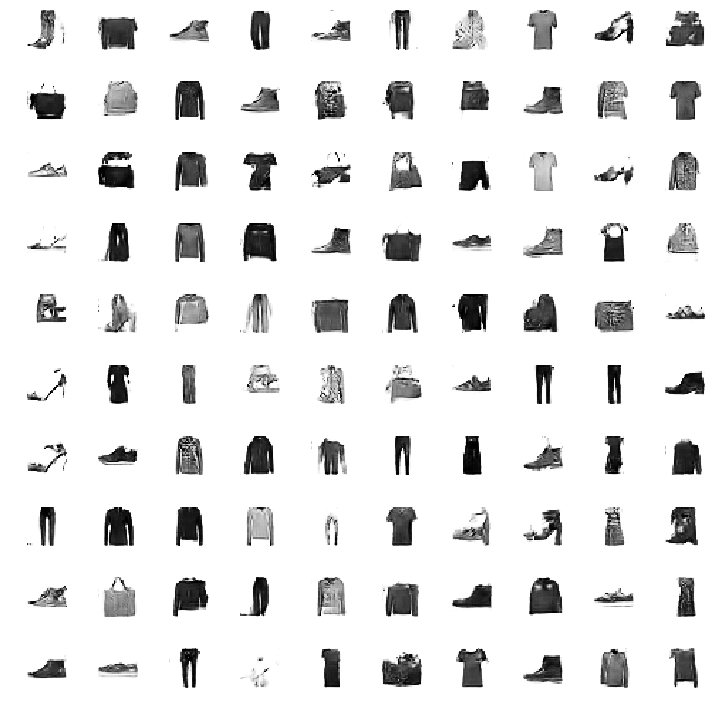

>Saved: ac-gan_generated_plot_0030.png and ac-gan_generator_model_0030.h5
>31, 1/468, dr[0.553,0.351], df[0.646,0.068], g[0.995,0.020]
>31, 2/468, dr[0.611,0.276], df[0.621,0.069], g[1.159,0.042]
>31, 3/468, dr[0.634,0.551], df[0.650,0.050], g[1.283,0.039]
>31, 4/468, dr[0.780,0.339], df[0.695,0.016], g[1.162,0.054]
>31, 5/468, dr[0.728,0.351], df[0.689,0.042], g[1.123,0.061]
>31, 6/468, dr[0.547,0.181], df[0.555,0.016], g[1.124,0.080]
>31, 7/468, dr[0.655,0.209], df[0.622,0.057], g[1.176,0.034]
>31, 8/468, dr[0.642,0.463], df[0.649,0.012], g[1.243,0.056]
>31, 9/468, dr[0.696,0.227], df[0.672,0.011], g[1.153,0.069]
>31, 10/468, dr[0.613,0.214], df[0.605,0.048], g[1.247,0.044]
>31, 11/468, dr[0.553,0.310], df[0.565,0.010], g[1.115,0.046]
>31, 12/468, dr[0.621,0.355], df[0.534,0.018], g[1.050,0.088]
>31, 13/468, dr[0.605,0.253], df[0.561,0.105], g[1.182,0.071]
>31, 14/468, dr[0.543,0.575], df[0.655,0.020], g[1.112,0.043]
>31, 15/468, dr[0.572,0.515], df[0.562,0.032], g[1.171,0.049]
>31, 

>31, 137/468, dr[0.767,0.707], df[0.666,0.039], g[1.157,0.036]
>31, 138/468, dr[0.528,0.752], df[0.740,0.066], g[1.238,0.044]
>31, 139/468, dr[0.654,0.386], df[0.460,0.039], g[1.157,0.049]
>31, 140/468, dr[0.521,0.285], df[0.656,0.039], g[1.099,0.033]
>31, 141/468, dr[0.861,0.489], df[0.662,0.030], g[1.023,0.069]
>31, 142/468, dr[0.593,0.250], df[0.796,0.079], g[1.042,0.086]
>31, 143/468, dr[0.617,0.482], df[0.806,0.133], g[1.131,0.049]
>31, 144/468, dr[0.585,0.304], df[0.624,0.019], g[1.173,0.076]
>31, 145/468, dr[0.647,0.307], df[0.646,0.046], g[1.349,0.032]
>31, 146/468, dr[0.677,0.506], df[0.589,0.024], g[1.349,0.040]
>31, 147/468, dr[0.623,0.274], df[0.472,0.100], g[1.137,0.062]
>31, 148/468, dr[0.755,0.292], df[0.637,0.083], g[1.071,0.026]
>31, 149/468, dr[0.748,0.345], df[0.658,0.067], g[1.050,0.039]
>31, 150/468, dr[0.608,0.264], df[0.710,0.043], g[1.018,0.058]
>31, 151/468, dr[0.558,0.296], df[0.640,0.041], g[1.119,0.043]
>31, 152/468, dr[0.552,0.399], df[0.743,0.024], g[1.269

>31, 272/468, dr[0.576,0.399], df[0.552,0.013], g[1.240,0.023]
>31, 273/468, dr[0.613,0.831], df[0.541,0.013], g[1.085,0.068]
>31, 274/468, dr[0.741,0.824], df[0.641,0.053], g[1.074,0.050]
>31, 275/468, dr[0.599,0.435], df[0.634,0.018], g[1.109,0.014]
>31, 276/468, dr[0.514,0.642], df[0.726,0.039], g[1.036,0.046]
>31, 277/468, dr[0.720,0.747], df[0.635,0.149], g[1.005,0.072]
>31, 278/468, dr[0.565,0.454], df[0.676,0.062], g[1.029,0.030]
>31, 279/468, dr[0.596,0.383], df[0.546,0.066], g[0.953,0.052]
>31, 280/468, dr[0.460,0.432], df[0.727,0.051], g[1.186,0.043]
>31, 281/468, dr[0.488,0.561], df[0.645,0.077], g[1.202,0.054]
>31, 282/468, dr[0.677,0.401], df[0.677,0.057], g[1.201,0.052]
>31, 283/468, dr[0.894,0.550], df[0.557,0.070], g[1.192,0.045]
>31, 284/468, dr[0.537,0.308], df[0.589,0.033], g[1.070,0.058]
>31, 285/468, dr[0.566,0.329], df[0.541,0.078], g[1.131,0.047]
>31, 286/468, dr[0.589,0.566], df[0.473,0.140], g[1.144,0.068]
>31, 287/468, dr[0.563,0.367], df[0.626,0.017], g[1.241

>31, 407/468, dr[0.669,0.343], df[0.573,0.023], g[1.052,0.038]
>31, 408/468, dr[0.626,0.333], df[0.622,0.026], g[1.032,0.036]
>31, 409/468, dr[0.400,0.372], df[0.667,0.078], g[1.232,0.040]
>31, 410/468, dr[0.636,0.149], df[0.538,0.076], g[1.098,0.026]
>31, 411/468, dr[0.616,0.297], df[0.527,0.063], g[1.340,0.095]
>31, 412/468, dr[0.847,0.372], df[0.556,0.042], g[1.006,0.049]
>31, 413/468, dr[0.471,0.750], df[0.593,0.013], g[1.107,0.023]
>31, 414/468, dr[0.662,0.343], df[0.661,0.032], g[1.140,0.017]
>31, 415/468, dr[0.462,0.315], df[0.664,0.078], g[1.340,0.059]
>31, 416/468, dr[0.682,0.125], df[0.706,0.052], g[1.276,0.023]
>31, 417/468, dr[0.672,0.286], df[0.675,0.050], g[1.254,0.094]
>31, 418/468, dr[0.691,0.733], df[0.638,0.025], g[1.364,0.061]
>31, 419/468, dr[0.555,0.360], df[0.351,0.025], g[1.156,0.024]
>31, 420/468, dr[0.667,0.358], df[0.598,0.017], g[0.996,0.030]
>31, 421/468, dr[0.637,0.480], df[0.743,0.022], g[1.084,0.036]
>31, 422/468, dr[0.518,0.458], df[0.631,0.035], g[1.286

>32, 71/468, dr[0.593,0.240], df[0.596,0.129], g[1.223,0.030]
>32, 72/468, dr[0.546,0.331], df[0.584,0.047], g[1.103,0.026]
>32, 73/468, dr[0.549,0.332], df[0.702,0.078], g[1.225,0.059]
>32, 74/468, dr[0.681,0.508], df[0.517,0.076], g[1.157,0.064]
>32, 75/468, dr[0.568,0.220], df[0.705,0.096], g[1.220,0.022]
>32, 76/468, dr[0.592,0.205], df[0.527,0.022], g[1.148,0.015]
>32, 77/468, dr[0.649,0.342], df[0.552,0.068], g[1.182,0.049]
>32, 78/468, dr[0.682,0.655], df[0.538,0.043], g[1.092,0.034]
>32, 79/468, dr[0.568,0.222], df[0.754,0.043], g[1.066,0.039]
>32, 80/468, dr[0.604,0.602], df[0.676,0.018], g[1.204,0.045]
>32, 81/468, dr[0.599,0.239], df[0.556,0.081], g[1.124,0.057]
>32, 82/468, dr[0.595,0.883], df[0.577,0.104], g[1.391,0.043]
>32, 83/468, dr[0.652,0.645], df[0.676,0.078], g[1.080,0.035]
>32, 84/468, dr[0.579,0.290], df[0.614,0.053], g[1.107,0.062]
>32, 85/468, dr[0.646,0.340], df[0.661,0.032], g[1.160,0.049]
>32, 86/468, dr[0.629,0.486], df[0.499,0.035], g[1.185,0.030]
>32, 87/

>32, 206/468, dr[0.685,0.495], df[0.649,0.021], g[1.195,0.023]
>32, 207/468, dr[0.653,0.363], df[0.679,0.034], g[1.222,0.039]
>32, 208/468, dr[0.689,0.751], df[0.579,0.005], g[1.159,0.035]
>32, 209/468, dr[0.694,0.385], df[0.687,0.122], g[1.144,0.022]
>32, 210/468, dr[0.592,0.373], df[0.657,0.029], g[1.266,0.053]
>32, 211/468, dr[0.579,0.484], df[0.721,0.052], g[1.193,0.049]
>32, 212/468, dr[0.527,0.512], df[0.492,0.015], g[1.285,0.077]
>32, 213/468, dr[0.717,0.259], df[0.689,0.027], g[1.141,0.046]
>32, 214/468, dr[0.481,0.585], df[0.652,0.077], g[1.159,0.044]
>32, 215/468, dr[0.627,0.623], df[0.702,0.074], g[1.212,0.035]
>32, 216/468, dr[0.753,0.377], df[0.575,0.103], g[1.168,0.093]
>32, 217/468, dr[0.666,0.434], df[0.613,0.037], g[1.272,0.033]
>32, 218/468, dr[0.743,0.313], df[0.705,0.047], g[1.159,0.088]
>32, 219/468, dr[0.748,0.360], df[0.783,0.031], g[1.152,0.057]
>32, 220/468, dr[0.595,0.371], df[0.737,0.097], g[1.150,0.031]
>32, 221/468, dr[0.677,0.265], df[0.489,0.025], g[1.097

>32, 340/468, dr[0.807,0.270], df[0.560,0.023], g[1.254,0.032]
>32, 341/468, dr[0.670,0.242], df[0.562,0.016], g[1.148,0.021]
>32, 342/468, dr[0.491,0.679], df[0.656,0.021], g[1.096,0.076]
>32, 343/468, dr[0.691,0.524], df[0.600,0.018], g[1.154,0.037]
>32, 344/468, dr[0.656,0.412], df[0.770,0.044], g[1.250,0.036]
>32, 345/468, dr[0.456,0.248], df[0.673,0.024], g[1.343,0.052]
>32, 346/468, dr[0.671,0.353], df[0.562,0.100], g[1.201,0.023]
>32, 347/468, dr[0.753,0.679], df[0.626,0.022], g[1.156,0.051]
>32, 348/468, dr[0.735,0.247], df[0.555,0.047], g[1.107,0.047]
>32, 349/468, dr[0.567,0.343], df[0.671,0.022], g[0.982,0.051]
>32, 350/468, dr[0.625,0.600], df[0.652,0.050], g[1.237,0.058]
>32, 351/468, dr[0.502,0.656], df[0.640,0.043], g[1.128,0.034]
>32, 352/468, dr[0.725,0.465], df[0.452,0.043], g[0.976,0.018]
>32, 353/468, dr[0.703,0.194], df[0.748,0.052], g[1.169,0.046]
>32, 354/468, dr[0.572,0.410], df[0.550,0.050], g[1.203,0.018]
>32, 355/468, dr[0.589,0.318], df[0.597,0.057], g[1.054

>33, 4/468, dr[0.646,0.311], df[0.825,0.038], g[1.229,0.045]
>33, 5/468, dr[0.686,0.234], df[0.629,0.111], g[1.317,0.062]
>33, 6/468, dr[0.744,0.541], df[0.583,0.018], g[1.099,0.051]
>33, 7/468, dr[0.715,0.344], df[0.548,0.031], g[1.109,0.046]
>33, 8/468, dr[0.535,0.535], df[0.575,0.036], g[1.133,0.122]
>33, 9/468, dr[0.552,0.261], df[0.594,0.009], g[1.161,0.026]
>33, 10/468, dr[0.640,0.537], df[0.472,0.034], g[1.003,0.058]
>33, 11/468, dr[0.723,0.575], df[0.731,0.030], g[0.972,0.108]
>33, 12/468, dr[0.532,0.310], df[0.672,0.031], g[1.270,0.028]
>33, 13/468, dr[0.505,0.345], df[0.770,0.032], g[1.215,0.061]
>33, 14/468, dr[0.766,0.428], df[0.543,0.047], g[1.187,0.054]
>33, 15/468, dr[0.606,0.357], df[0.548,0.033], g[1.109,0.122]
>33, 16/468, dr[0.604,0.469], df[0.599,0.060], g[1.167,0.031]
>33, 17/468, dr[0.718,0.208], df[0.715,0.036], g[1.137,0.029]
>33, 18/468, dr[0.692,0.521], df[0.694,0.069], g[1.049,0.038]
>33, 19/468, dr[0.693,0.341], df[0.582,0.042], g[1.034,0.040]
>33, 20/468, d

>33, 137/468, dr[0.536,0.535], df[0.666,0.050], g[1.184,0.072]
>33, 138/468, dr[0.639,0.645], df[0.779,0.066], g[1.198,0.023]
>33, 139/468, dr[0.601,0.360], df[0.756,0.055], g[1.334,0.092]
>33, 140/468, dr[0.623,0.528], df[0.668,0.054], g[1.135,0.055]
>33, 141/468, dr[0.749,0.403], df[0.520,0.033], g[1.148,0.016]
>33, 142/468, dr[0.616,0.439], df[0.589,0.024], g[1.158,0.060]
>33, 143/468, dr[0.668,0.466], df[0.665,0.022], g[1.246,0.040]
>33, 144/468, dr[0.622,0.561], df[0.737,0.109], g[1.257,0.074]
>33, 145/468, dr[0.521,0.314], df[0.584,0.035], g[1.211,0.050]
>33, 146/468, dr[0.777,0.291], df[0.681,0.012], g[1.352,0.033]
>33, 147/468, dr[0.697,0.494], df[0.583,0.045], g[1.170,0.047]
>33, 148/468, dr[0.541,0.369], df[0.661,0.017], g[1.317,0.017]
>33, 149/468, dr[0.569,0.208], df[0.510,0.057], g[1.046,0.019]
>33, 150/468, dr[0.552,0.248], df[0.601,0.051], g[1.286,0.051]
>33, 151/468, dr[0.769,0.296], df[0.661,0.022], g[1.056,0.033]
>33, 152/468, dr[0.674,0.261], df[0.641,0.113], g[1.103

>33, 272/468, dr[0.565,0.199], df[0.663,0.024], g[1.112,0.068]
>33, 273/468, dr[0.518,0.235], df[0.814,0.019], g[1.198,0.018]
>33, 274/468, dr[0.629,0.380], df[0.512,0.070], g[1.153,0.042]
>33, 275/468, dr[0.647,0.522], df[0.716,0.054], g[1.078,0.055]
>33, 276/468, dr[0.766,0.264], df[0.665,0.065], g[1.150,0.033]
>33, 277/468, dr[0.567,0.309], df[0.682,0.049], g[1.291,0.026]
>33, 278/468, dr[0.669,0.468], df[0.594,0.016], g[1.213,0.033]
>33, 279/468, dr[0.675,0.429], df[0.516,0.012], g[1.134,0.030]
>33, 280/468, dr[0.662,0.555], df[0.725,0.054], g[1.003,0.046]
>33, 281/468, dr[0.637,0.368], df[0.750,0.014], g[1.063,0.019]
>33, 282/468, dr[0.554,0.235], df[0.706,0.090], g[1.085,0.069]
>33, 283/468, dr[0.526,0.297], df[0.597,0.031], g[1.284,0.020]
>33, 284/468, dr[0.592,0.351], df[0.501,0.016], g[1.185,0.067]
>33, 285/468, dr[0.635,0.522], df[0.649,0.059], g[1.237,0.038]
>33, 286/468, dr[0.707,0.361], df[0.502,0.047], g[1.255,0.097]
>33, 287/468, dr[0.662,0.327], df[0.774,0.028], g[1.136

>33, 406/468, dr[0.502,0.450], df[0.761,0.078], g[1.062,0.100]
>33, 407/468, dr[0.661,0.615], df[0.679,0.025], g[1.113,0.017]
>33, 408/468, dr[0.672,0.700], df[0.656,0.071], g[1.291,0.040]
>33, 409/468, dr[0.598,0.725], df[0.559,0.039], g[1.382,0.034]
>33, 410/468, dr[0.680,0.250], df[0.593,0.131], g[1.168,0.030]
>33, 411/468, dr[0.852,0.436], df[0.527,0.059], g[1.211,0.038]
>33, 412/468, dr[0.715,0.706], df[0.683,0.031], g[1.007,0.097]
>33, 413/468, dr[0.477,0.238], df[0.650,0.040], g[1.104,0.080]
>33, 414/468, dr[0.562,0.362], df[0.645,0.019], g[1.060,0.046]
>33, 415/468, dr[0.567,0.413], df[0.595,0.035], g[1.002,0.089]
>33, 416/468, dr[0.620,0.360], df[0.572,0.053], g[1.196,0.041]
>33, 417/468, dr[0.691,0.209], df[0.517,0.089], g[1.093,0.077]
>33, 418/468, dr[0.676,0.527], df[0.611,0.047], g[1.104,0.068]
>33, 419/468, dr[0.632,0.226], df[0.583,0.034], g[1.089,0.029]
>33, 420/468, dr[0.639,0.316], df[0.699,0.063], g[1.160,0.029]
>33, 421/468, dr[0.568,0.495], df[0.618,0.041], g[1.086

>34, 73/468, dr[0.608,0.203], df[0.572,0.070], g[1.018,0.042]
>34, 74/468, dr[0.796,0.241], df[0.793,0.025], g[1.236,0.055]
>34, 75/468, dr[0.569,0.244], df[0.675,0.052], g[1.097,0.059]
>34, 76/468, dr[0.627,0.163], df[0.727,0.032], g[1.236,0.088]
>34, 77/468, dr[0.687,0.371], df[0.513,0.025], g[1.170,0.037]
>34, 78/468, dr[0.539,0.310], df[0.560,0.044], g[1.066,0.027]
>34, 79/468, dr[0.608,0.498], df[0.631,0.082], g[1.210,0.022]
>34, 80/468, dr[0.769,0.264], df[0.541,0.017], g[1.098,0.057]
>34, 81/468, dr[0.665,0.394], df[0.642,0.016], g[0.997,0.051]
>34, 82/468, dr[0.561,0.351], df[0.603,0.020], g[1.130,0.025]
>34, 83/468, dr[0.632,0.392], df[0.661,0.026], g[1.102,0.046]
>34, 84/468, dr[0.530,0.096], df[0.606,0.021], g[1.132,0.036]
>34, 85/468, dr[0.552,0.424], df[0.625,0.017], g[1.147,0.036]
>34, 86/468, dr[0.684,0.498], df[0.605,0.065], g[1.129,0.061]
>34, 87/468, dr[0.561,0.230], df[0.631,0.074], g[1.072,0.115]
>34, 88/468, dr[0.541,0.304], df[0.604,0.018], g[1.078,0.034]
>34, 89/

>34, 204/468, dr[0.657,0.485], df[0.705,0.043], g[1.100,0.096]
>34, 205/468, dr[0.513,0.450], df[0.633,0.013], g[1.201,0.071]
>34, 206/468, dr[0.595,0.343], df[0.606,0.039], g[1.045,0.029]
>34, 207/468, dr[0.637,0.316], df[0.621,0.090], g[1.139,0.046]
>34, 208/468, dr[0.620,0.396], df[0.553,0.066], g[1.116,0.059]
>34, 209/468, dr[0.505,0.487], df[0.585,0.095], g[1.200,0.039]
>34, 210/468, dr[0.590,0.464], df[0.529,0.078], g[1.106,0.127]
>34, 211/468, dr[0.713,0.218], df[0.728,0.022], g[1.147,0.052]
>34, 212/468, dr[0.529,0.151], df[0.716,0.097], g[1.194,0.096]
>34, 213/468, dr[0.532,0.394], df[0.709,0.053], g[1.212,0.056]
>34, 214/468, dr[0.648,0.412], df[0.522,0.015], g[1.166,0.108]
>34, 215/468, dr[0.696,0.352], df[0.638,0.051], g[1.325,0.090]
>34, 216/468, dr[0.686,0.491], df[0.625,0.057], g[1.155,0.021]
>34, 217/468, dr[0.695,0.471], df[0.628,0.019], g[1.186,0.062]
>34, 218/468, dr[0.691,0.316], df[0.599,0.072], g[1.143,0.036]
>34, 219/468, dr[0.443,0.384], df[0.539,0.079], g[1.154

>34, 338/468, dr[0.709,0.150], df[0.524,0.027], g[1.253,0.036]
>34, 339/468, dr[0.649,0.305], df[0.759,0.101], g[1.154,0.037]
>34, 340/468, dr[0.569,0.246], df[0.591,0.059], g[1.215,0.030]
>34, 341/468, dr[0.603,0.400], df[0.595,0.023], g[1.146,0.048]
>34, 342/468, dr[0.623,0.449], df[0.574,0.012], g[1.060,0.032]
>34, 343/468, dr[0.643,0.481], df[0.752,0.038], g[1.142,0.056]
>34, 344/468, dr[0.523,0.350], df[0.656,0.018], g[1.273,0.059]
>34, 345/468, dr[0.649,0.419], df[0.603,0.060], g[1.202,0.123]
>34, 346/468, dr[0.699,0.360], df[0.759,0.056], g[1.191,0.042]
>34, 347/468, dr[0.762,0.477], df[0.552,0.096], g[1.160,0.051]
>34, 348/468, dr[0.775,0.725], df[0.772,0.063], g[1.261,0.034]
>34, 349/468, dr[0.653,0.225], df[0.622,0.014], g[1.183,0.056]
>34, 350/468, dr[0.689,0.423], df[0.595,0.032], g[1.071,0.017]
>34, 351/468, dr[0.665,0.433], df[0.584,0.070], g[1.052,0.047]
>34, 352/468, dr[0.499,0.479], df[0.730,0.018], g[1.180,0.076]
>34, 353/468, dr[0.700,0.624], df[0.675,0.040], g[1.082

>35, 6/468, dr[0.615,0.526], df[0.641,0.055], g[1.050,0.026]
>35, 7/468, dr[0.580,0.229], df[0.676,0.072], g[1.240,0.041]
>35, 8/468, dr[0.734,0.565], df[0.500,0.032], g[1.331,0.064]
>35, 9/468, dr[0.690,0.352], df[0.690,0.028], g[1.077,0.045]
>35, 10/468, dr[0.655,0.397], df[0.667,0.093], g[1.185,0.047]
>35, 11/468, dr[0.660,0.462], df[0.621,0.052], g[1.203,0.023]
>35, 12/468, dr[0.573,0.509], df[0.537,0.044], g[1.097,0.045]
>35, 13/468, dr[0.645,0.219], df[0.628,0.062], g[1.127,0.030]
>35, 14/468, dr[0.546,0.240], df[0.698,0.023], g[1.245,0.066]
>35, 15/468, dr[0.514,0.237], df[0.743,0.014], g[1.229,0.030]
>35, 16/468, dr[0.708,0.394], df[0.583,0.034], g[1.281,0.031]
>35, 17/468, dr[0.616,0.387], df[0.596,0.098], g[1.249,0.070]
>35, 18/468, dr[0.832,0.272], df[0.620,0.018], g[1.289,0.019]
>35, 19/468, dr[0.745,0.297], df[0.644,0.092], g[1.271,0.037]
>35, 20/468, dr[0.635,0.105], df[0.701,0.062], g[1.027,0.028]
>35, 21/468, dr[0.879,0.677], df[0.669,0.018], g[1.100,0.043]
>35, 22/468,

>35, 141/468, dr[0.456,0.279], df[0.692,0.031], g[1.227,0.043]
>35, 142/468, dr[0.566,0.343], df[0.551,0.039], g[1.082,0.121]
>35, 143/468, dr[0.639,0.386], df[0.557,0.045], g[1.250,0.021]
>35, 144/468, dr[0.580,0.407], df[0.645,0.042], g[1.131,0.039]
>35, 145/468, dr[0.524,0.707], df[0.677,0.087], g[1.119,0.053]
>35, 146/468, dr[0.671,0.552], df[0.574,0.024], g[1.206,0.039]
>35, 147/468, dr[0.755,0.480], df[0.606,0.067], g[1.149,0.054]
>35, 148/468, dr[0.667,0.368], df[0.616,0.047], g[1.215,0.061]
>35, 149/468, dr[0.511,0.154], df[0.623,0.069], g[1.214,0.115]
>35, 150/468, dr[0.694,0.324], df[0.606,0.114], g[1.039,0.087]
>35, 151/468, dr[0.512,0.302], df[0.667,0.035], g[1.262,0.038]
>35, 152/468, dr[0.650,0.193], df[0.599,0.017], g[1.173,0.036]
>35, 153/468, dr[0.781,0.402], df[0.589,0.050], g[1.102,0.064]
>35, 154/468, dr[0.606,0.304], df[0.536,0.029], g[1.100,0.046]
>35, 155/468, dr[0.595,0.404], df[0.541,0.034], g[1.033,0.040]
>35, 156/468, dr[0.668,0.258], df[0.729,0.084], g[1.052

>35, 273/468, dr[0.781,0.343], df[0.606,0.040], g[1.102,0.069]
>35, 274/468, dr[0.583,0.214], df[0.599,0.013], g[1.017,0.055]
>35, 275/468, dr[0.508,0.235], df[0.565,0.044], g[1.147,0.025]
>35, 276/468, dr[0.654,0.392], df[0.663,0.060], g[1.073,0.018]
>35, 277/468, dr[0.700,0.384], df[0.651,0.017], g[1.169,0.050]
>35, 278/468, dr[0.657,0.302], df[0.650,0.033], g[1.193,0.046]
>35, 279/468, dr[0.433,0.196], df[0.652,0.045], g[1.222,0.055]
>35, 280/468, dr[0.668,0.156], df[0.576,0.022], g[1.185,0.046]
>35, 281/468, dr[0.783,0.536], df[0.594,0.039], g[1.171,0.059]
>35, 282/468, dr[0.696,0.736], df[0.545,0.058], g[1.098,0.067]
>35, 283/468, dr[0.666,0.213], df[0.727,0.035], g[1.004,0.067]
>35, 284/468, dr[0.590,0.351], df[0.588,0.020], g[1.076,0.055]
>35, 285/468, dr[0.501,0.352], df[0.740,0.059], g[1.344,0.026]
>35, 286/468, dr[0.689,0.459], df[0.501,0.046], g[1.151,0.069]
>35, 287/468, dr[0.643,0.351], df[0.650,0.082], g[1.092,0.040]
>35, 288/468, dr[0.647,0.268], df[0.690,0.013], g[1.172

>35, 405/468, dr[0.584,0.332], df[0.703,0.035], g[1.095,0.041]
>35, 406/468, dr[0.652,0.271], df[0.613,0.034], g[1.050,0.034]
>35, 407/468, dr[0.609,0.133], df[0.610,0.024], g[1.294,0.034]
>35, 408/468, dr[0.751,0.457], df[0.530,0.046], g[1.088,0.052]
>35, 409/468, dr[0.544,0.243], df[0.621,0.054], g[0.987,0.082]
>35, 410/468, dr[0.477,0.442], df[0.514,0.020], g[1.198,0.013]
>35, 411/468, dr[0.574,0.322], df[0.613,0.041], g[1.274,0.065]
>35, 412/468, dr[0.513,0.376], df[0.517,0.072], g[1.277,0.024]
>35, 413/468, dr[0.716,0.460], df[0.595,0.034], g[1.066,0.031]
>35, 414/468, dr[0.586,0.411], df[0.710,0.124], g[1.160,0.047]
>35, 415/468, dr[0.554,0.312], df[0.646,0.043], g[1.188,0.017]
>35, 416/468, dr[0.612,0.477], df[0.582,0.024], g[1.157,0.056]
>35, 417/468, dr[0.598,0.323], df[0.622,0.037], g[1.174,0.037]
>35, 418/468, dr[0.724,0.239], df[0.480,0.089], g[1.198,0.037]
>35, 419/468, dr[0.425,0.306], df[0.550,0.047], g[1.071,0.033]
>35, 420/468, dr[0.744,0.412], df[0.569,0.026], g[1.128

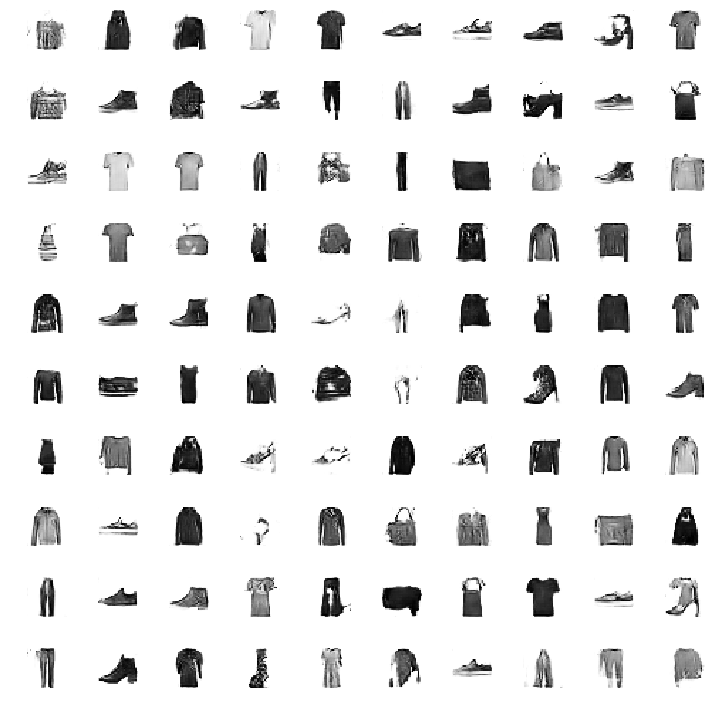

>Saved: ac-gan_generated_plot_0035.png and ac-gan_generator_model_0035.h5
>36, 1/468, dr[0.642,0.250], df[0.489,0.041], g[1.314,0.038]
>36, 2/468, dr[0.553,0.461], df[0.491,0.022], g[1.295,0.068]
>36, 3/468, dr[0.750,0.364], df[0.544,0.161], g[1.288,0.151]
>36, 4/468, dr[0.665,0.386], df[0.621,0.056], g[1.043,0.028]
>36, 5/468, dr[0.629,0.413], df[0.528,0.020], g[1.136,0.066]
>36, 6/468, dr[0.650,0.410], df[0.742,0.052], g[1.057,0.044]
>36, 7/468, dr[0.641,0.323], df[0.501,0.077], g[1.033,0.046]
>36, 8/468, dr[0.639,0.449], df[0.567,0.018], g[1.070,0.033]
>36, 9/468, dr[0.448,0.400], df[0.593,0.058], g[1.186,0.025]
>36, 10/468, dr[0.596,0.262], df[0.602,0.095], g[1.242,0.023]
>36, 11/468, dr[0.550,0.166], df[0.583,0.039], g[1.142,0.015]
>36, 12/468, dr[0.643,0.320], df[0.753,0.043], g[1.064,0.032]
>36, 13/468, dr[0.592,0.277], df[0.546,0.043], g[1.034,0.055]
>36, 14/468, dr[0.566,0.376], df[0.569,0.118], g[1.078,0.042]
>36, 15/468, dr[0.660,0.360], df[0.673,0.024], g[1.124,0.037]
>36, 

>36, 133/468, dr[0.662,0.327], df[0.578,0.023], g[1.324,0.117]
>36, 134/468, dr[0.583,0.253], df[0.639,0.042], g[1.119,0.044]
>36, 135/468, dr[0.761,0.434], df[0.683,0.086], g[1.141,0.051]
>36, 136/468, dr[0.755,0.348], df[0.491,0.043], g[1.109,0.036]
>36, 137/468, dr[0.679,0.234], df[0.775,0.022], g[1.093,0.063]
>36, 138/468, dr[0.537,0.157], df[0.640,0.086], g[1.270,0.030]
>36, 139/468, dr[0.508,0.306], df[0.654,0.130], g[1.206,0.036]
>36, 140/468, dr[0.569,0.439], df[0.611,0.031], g[1.206,0.034]
>36, 141/468, dr[0.603,0.326], df[0.498,0.017], g[1.182,0.062]
>36, 142/468, dr[0.689,0.294], df[0.515,0.013], g[1.133,0.034]
>36, 143/468, dr[0.729,0.417], df[0.581,0.022], g[1.203,0.091]
>36, 144/468, dr[0.618,0.382], df[0.590,0.019], g[1.136,0.019]
>36, 145/468, dr[0.520,0.165], df[0.631,0.059], g[1.242,0.018]
>36, 146/468, dr[0.608,0.312], df[0.477,0.018], g[1.038,0.053]
>36, 147/468, dr[0.631,0.738], df[0.438,0.019], g[1.129,0.072]
>36, 148/468, dr[0.632,0.420], df[0.751,0.080], g[1.105

>36, 265/468, dr[0.637,0.316], df[0.559,0.025], g[1.097,0.053]
>36, 266/468, dr[0.629,0.492], df[0.672,0.035], g[1.159,0.081]
>36, 267/468, dr[0.716,0.284], df[0.701,0.019], g[1.126,0.040]
>36, 268/468, dr[0.559,0.301], df[0.654,0.041], g[1.070,0.081]
>36, 269/468, dr[0.649,0.358], df[0.596,0.036], g[1.127,0.057]
>36, 270/468, dr[0.588,0.272], df[0.512,0.026], g[1.125,0.019]
>36, 271/468, dr[0.663,0.412], df[0.722,0.094], g[1.101,0.049]
>36, 272/468, dr[0.575,0.315], df[0.950,0.030], g[1.214,0.016]
>36, 273/468, dr[0.686,0.530], df[0.608,0.011], g[1.189,0.077]
>36, 274/468, dr[0.575,0.280], df[0.589,0.066], g[1.188,0.046]
>36, 275/468, dr[0.732,0.259], df[0.589,0.023], g[1.294,0.023]
>36, 276/468, dr[0.610,0.201], df[0.662,0.118], g[1.181,0.066]
>36, 277/468, dr[0.658,0.416], df[0.520,0.036], g[1.226,0.034]
>36, 278/468, dr[0.598,0.281], df[0.486,0.011], g[1.108,0.041]
>36, 279/468, dr[0.719,0.400], df[0.772,0.047], g[1.075,0.057]
>36, 280/468, dr[0.671,0.169], df[0.700,0.032], g[1.185

>36, 397/468, dr[0.515,0.289], df[0.636,0.044], g[1.209,0.030]
>36, 398/468, dr[0.686,0.518], df[0.688,0.067], g[1.159,0.046]
>36, 399/468, dr[0.604,0.314], df[0.638,0.028], g[1.185,0.047]
>36, 400/468, dr[0.513,0.805], df[0.517,0.061], g[1.101,0.056]
>36, 401/468, dr[0.758,0.621], df[0.652,0.035], g[1.004,0.063]
>36, 402/468, dr[0.719,0.424], df[0.720,0.020], g[1.084,0.039]
>36, 403/468, dr[0.656,0.410], df[0.677,0.027], g[1.195,0.060]
>36, 404/468, dr[0.702,0.612], df[0.694,0.036], g[1.092,0.085]
>36, 405/468, dr[0.464,0.234], df[0.615,0.043], g[1.107,0.068]
>36, 406/468, dr[0.599,0.228], df[0.613,0.051], g[1.267,0.040]
>36, 407/468, dr[0.639,0.791], df[0.636,0.047], g[1.152,0.048]
>36, 408/468, dr[0.665,0.458], df[0.778,0.032], g[1.227,0.043]
>36, 409/468, dr[0.696,0.439], df[0.608,0.043], g[1.209,0.018]
>36, 410/468, dr[0.643,0.426], df[0.661,0.034], g[1.070,0.063]
>36, 411/468, dr[0.583,0.359], df[0.468,0.070], g[1.093,0.065]
>36, 412/468, dr[0.705,0.440], df[0.635,0.043], g[1.000

>37, 64/468, dr[0.595,0.400], df[0.535,0.026], g[1.100,0.060]
>37, 65/468, dr[0.694,0.358], df[0.661,0.020], g[1.150,0.033]
>37, 66/468, dr[0.606,0.376], df[0.651,0.068], g[1.084,0.048]
>37, 67/468, dr[0.593,0.355], df[0.610,0.056], g[1.144,0.047]
>37, 68/468, dr[0.544,0.332], df[0.678,0.023], g[1.126,0.043]
>37, 69/468, dr[0.524,0.235], df[0.572,0.054], g[1.165,0.072]
>37, 70/468, dr[0.840,0.424], df[0.709,0.064], g[1.224,0.077]
>37, 71/468, dr[0.569,0.429], df[0.521,0.024], g[1.240,0.117]
>37, 72/468, dr[0.663,0.167], df[0.521,0.019], g[1.040,0.039]
>37, 73/468, dr[0.577,0.355], df[0.729,0.023], g[1.144,0.048]
>37, 74/468, dr[0.596,0.359], df[0.517,0.051], g[1.275,0.039]
>37, 75/468, dr[0.731,0.407], df[0.524,0.022], g[1.115,0.058]
>37, 76/468, dr[0.509,0.338], df[0.564,0.089], g[1.057,0.023]
>37, 77/468, dr[0.577,0.743], df[0.679,0.052], g[1.034,0.090]
>37, 78/468, dr[0.568,0.360], df[0.622,0.131], g[1.141,0.055]
>37, 79/468, dr[0.698,0.323], df[0.565,0.036], g[1.107,0.063]
>37, 80/

>37, 198/468, dr[0.671,0.568], df[0.639,0.032], g[1.247,0.032]
>37, 199/468, dr[0.661,0.405], df[0.585,0.019], g[1.122,0.052]
>37, 200/468, dr[0.622,0.335], df[0.557,0.060], g[1.180,0.054]
>37, 201/468, dr[0.631,0.414], df[0.612,0.025], g[0.981,0.028]
>37, 202/468, dr[0.568,0.245], df[0.638,0.019], g[1.158,0.040]
>37, 203/468, dr[0.503,0.515], df[0.616,0.068], g[1.151,0.042]
>37, 204/468, dr[0.672,0.379], df[0.705,0.042], g[1.161,0.052]
>37, 205/468, dr[0.841,0.630], df[0.541,0.016], g[1.151,0.041]
>37, 206/468, dr[0.537,0.559], df[0.608,0.022], g[0.915,0.039]
>37, 207/468, dr[0.630,0.177], df[0.722,0.083], g[1.041,0.057]
>37, 208/468, dr[0.640,0.497], df[0.739,0.052], g[1.076,0.058]
>37, 209/468, dr[0.507,0.477], df[0.646,0.017], g[1.043,0.012]
>37, 210/468, dr[0.600,0.320], df[0.549,0.055], g[1.177,0.046]
>37, 211/468, dr[0.612,0.335], df[0.606,0.026], g[1.238,0.051]
>37, 212/468, dr[0.532,0.368], df[0.732,0.077], g[1.243,0.014]
>37, 213/468, dr[0.676,0.391], df[0.577,0.026], g[1.195

>37, 330/468, dr[0.606,0.158], df[0.623,0.072], g[1.124,0.032]
>37, 331/468, dr[0.659,0.274], df[0.611,0.031], g[1.022,0.018]
>37, 332/468, dr[0.575,0.269], df[0.594,0.016], g[1.090,0.033]
>37, 333/468, dr[0.686,0.283], df[0.595,0.033], g[1.046,0.024]
>37, 334/468, dr[0.708,0.299], df[0.726,0.030], g[1.120,0.021]
>37, 335/468, dr[0.537,0.433], df[0.719,0.011], g[1.200,0.030]
>37, 336/468, dr[0.660,0.303], df[0.699,0.017], g[1.213,0.077]
>37, 337/468, dr[0.734,0.271], df[0.643,0.018], g[1.115,0.062]
>37, 338/468, dr[0.637,0.153], df[0.583,0.037], g[1.113,0.046]
>37, 339/468, dr[0.711,0.427], df[0.577,0.051], g[1.085,0.039]
>37, 340/468, dr[0.743,0.363], df[0.712,0.026], g[1.154,0.022]
>37, 341/468, dr[0.567,0.440], df[0.662,0.060], g[1.192,0.033]
>37, 342/468, dr[0.557,0.247], df[0.639,0.065], g[1.153,0.026]
>37, 343/468, dr[0.476,0.487], df[0.613,0.069], g[1.338,0.039]
>37, 344/468, dr[0.727,0.156], df[0.560,0.151], g[1.132,0.040]
>37, 345/468, dr[0.765,0.553], df[0.586,0.008], g[1.065

>37, 464/468, dr[0.610,0.269], df[0.723,0.073], g[1.017,0.024]
>37, 465/468, dr[0.582,0.295], df[0.596,0.154], g[1.014,0.063]
>37, 466/468, dr[0.603,0.487], df[0.632,0.022], g[1.214,0.035]
>37, 467/468, dr[0.613,0.559], df[0.523,0.026], g[1.233,0.034]
>37, 468/468, dr[0.709,0.368], df[0.546,0.116], g[1.139,0.028]
>38, 1/468, dr[0.685,0.375], df[0.678,0.048], g[1.049,0.110]
>38, 2/468, dr[0.596,0.479], df[0.579,0.016], g[1.090,0.051]
>38, 3/468, dr[0.677,0.398], df[0.694,0.027], g[1.033,0.096]
>38, 4/468, dr[0.578,0.674], df[0.728,0.024], g[1.151,0.046]
>38, 5/468, dr[0.583,0.291], df[0.578,0.052], g[1.136,0.030]
>38, 6/468, dr[0.616,0.510], df[0.586,0.041], g[1.132,0.016]
>38, 7/468, dr[0.778,0.247], df[0.586,0.009], g[1.192,0.051]
>38, 8/468, dr[0.609,0.221], df[0.688,0.032], g[1.228,0.056]
>38, 9/468, dr[0.811,0.358], df[0.589,0.036], g[0.944,0.053]
>38, 10/468, dr[0.569,0.254], df[0.658,0.049], g[1.098,0.030]
>38, 11/468, dr[0.579,0.390], df[0.735,0.014], g[1.125,0.043]
>38, 12/468,

>38, 129/468, dr[0.503,0.461], df[0.539,0.029], g[1.182,0.053]
>38, 130/468, dr[0.768,0.382], df[0.772,0.101], g[1.209,0.057]
>38, 131/468, dr[0.597,0.341], df[0.452,0.024], g[1.198,0.081]
>38, 132/468, dr[0.783,0.232], df[0.556,0.066], g[1.175,0.064]
>38, 133/468, dr[0.683,0.299], df[0.662,0.168], g[1.060,0.043]
>38, 134/468, dr[0.605,0.400], df[0.558,0.019], g[1.080,0.028]
>38, 135/468, dr[0.653,0.523], df[0.634,0.026], g[1.162,0.063]
>38, 136/468, dr[0.658,0.335], df[0.753,0.023], g[1.267,0.065]
>38, 137/468, dr[0.528,0.411], df[0.598,0.025], g[1.199,0.071]
>38, 138/468, dr[0.609,0.376], df[0.613,0.038], g[1.162,0.038]
>38, 139/468, dr[0.601,0.619], df[0.582,0.020], g[1.173,0.032]
>38, 140/468, dr[0.545,0.325], df[0.676,0.068], g[1.233,0.029]
>38, 141/468, dr[0.605,0.310], df[0.738,0.102], g[1.207,0.047]
>38, 142/468, dr[0.682,0.313], df[0.642,0.054], g[1.194,0.044]
>38, 143/468, dr[0.709,0.471], df[0.609,0.066], g[1.195,0.053]
>38, 144/468, dr[0.695,0.352], df[0.553,0.101], g[1.206

>38, 261/468, dr[0.541,0.349], df[0.614,0.078], g[1.092,0.033]
>38, 262/468, dr[0.537,0.351], df[0.652,0.122], g[1.129,0.046]
>38, 263/468, dr[0.662,0.432], df[0.605,0.021], g[1.195,0.041]
>38, 264/468, dr[0.684,0.413], df[0.582,0.056], g[1.289,0.045]
>38, 265/468, dr[0.517,0.207], df[0.553,0.035], g[1.051,0.025]
>38, 266/468, dr[0.722,0.287], df[0.514,0.065], g[1.202,0.027]
>38, 267/468, dr[0.621,0.414], df[0.680,0.047], g[1.042,0.035]
>38, 268/468, dr[0.515,0.664], df[0.764,0.133], g[1.136,0.097]
>38, 269/468, dr[0.773,0.319], df[0.678,0.031], g[1.271,0.030]
>38, 270/468, dr[0.628,0.293], df[0.685,0.023], g[1.141,0.053]
>38, 271/468, dr[0.651,0.318], df[0.529,0.030], g[1.176,0.071]
>38, 272/468, dr[0.749,0.373], df[0.675,0.084], g[1.201,0.105]
>38, 273/468, dr[0.687,0.294], df[0.629,0.027], g[1.061,0.033]
>38, 274/468, dr[0.706,0.674], df[0.648,0.013], g[0.997,0.033]
>38, 275/468, dr[0.577,0.231], df[0.713,0.073], g[1.012,0.036]
>38, 276/468, dr[0.589,0.418], df[0.589,0.092], g[1.004

>38, 394/468, dr[0.623,0.476], df[0.535,0.025], g[1.040,0.061]
>38, 395/468, dr[0.694,0.419], df[0.633,0.063], g[0.979,0.073]
>38, 396/468, dr[0.574,0.417], df[0.744,0.094], g[1.057,0.049]
>38, 397/468, dr[0.568,0.493], df[0.715,0.054], g[1.043,0.079]
>38, 398/468, dr[0.554,0.386], df[0.592,0.073], g[1.120,0.022]
>38, 399/468, dr[0.784,0.232], df[0.576,0.027], g[1.157,0.063]
>38, 400/468, dr[0.646,0.120], df[0.736,0.015], g[1.151,0.022]
>38, 401/468, dr[0.637,0.414], df[0.615,0.068], g[1.129,0.079]
>38, 402/468, dr[0.608,0.188], df[0.648,0.138], g[1.105,0.040]
>38, 403/468, dr[0.561,0.377], df[0.759,0.040], g[1.143,0.036]
>38, 404/468, dr[0.607,0.452], df[0.563,0.085], g[1.191,0.076]
>38, 405/468, dr[0.619,0.222], df[0.494,0.079], g[1.161,0.069]
>38, 406/468, dr[0.737,0.270], df[0.771,0.050], g[1.101,0.048]
>38, 407/468, dr[0.697,0.672], df[0.565,0.112], g[1.042,0.037]
>38, 408/468, dr[0.553,0.346], df[0.646,0.058], g[1.158,0.023]
>38, 409/468, dr[0.596,0.464], df[0.508,0.048], g[1.194

>39, 58/468, dr[0.592,0.505], df[0.666,0.053], g[1.121,0.067]
>39, 59/468, dr[0.678,0.156], df[0.502,0.024], g[1.151,0.050]
>39, 60/468, dr[0.724,0.312], df[0.433,0.011], g[1.234,0.031]
>39, 61/468, dr[0.710,0.304], df[0.644,0.057], g[1.062,0.034]
>39, 62/468, dr[0.528,0.303], df[0.625,0.101], g[1.015,0.030]
>39, 63/468, dr[0.542,0.319], df[0.640,0.022], g[0.991,0.050]
>39, 64/468, dr[0.484,0.310], df[0.545,0.039], g[1.035,0.039]
>39, 65/468, dr[0.617,0.284], df[0.805,0.016], g[1.233,0.010]
>39, 66/468, dr[0.631,0.214], df[0.703,0.072], g[1.073,0.028]
>39, 67/468, dr[0.771,0.341], df[0.582,0.009], g[1.149,0.099]
>39, 68/468, dr[0.616,0.382], df[0.688,0.028], g[1.236,0.070]
>39, 69/468, dr[0.657,0.268], df[0.549,0.032], g[1.080,0.016]
>39, 70/468, dr[0.583,0.258], df[0.618,0.125], g[1.057,0.026]
>39, 71/468, dr[0.710,0.611], df[0.685,0.028], g[1.188,0.029]
>39, 72/468, dr[0.531,0.265], df[0.522,0.111], g[1.153,0.036]
>39, 73/468, dr[0.632,0.383], df[0.691,0.089], g[1.017,0.027]
>39, 74/

>39, 190/468, dr[0.662,0.426], df[0.601,0.020], g[1.083,0.053]
>39, 191/468, dr[0.722,0.243], df[0.685,0.015], g[1.181,0.031]
>39, 192/468, dr[0.564,0.315], df[0.691,0.023], g[1.191,0.030]
>39, 193/468, dr[0.615,0.197], df[0.563,0.018], g[1.132,0.051]
>39, 194/468, dr[0.636,0.247], df[0.588,0.059], g[1.144,0.021]
>39, 195/468, dr[0.618,0.332], df[0.683,0.073], g[1.206,0.087]
>39, 196/468, dr[0.670,0.504], df[0.687,0.023], g[1.143,0.035]
>39, 197/468, dr[0.562,0.304], df[0.641,0.081], g[1.115,0.031]
>39, 198/468, dr[0.727,0.257], df[0.594,0.037], g[1.188,0.027]
>39, 199/468, dr[0.677,0.451], df[0.590,0.015], g[1.224,0.063]
>39, 200/468, dr[0.612,0.301], df[0.649,0.084], g[1.150,0.032]
>39, 201/468, dr[0.675,0.436], df[0.609,0.048], g[1.181,0.031]
>39, 202/468, dr[0.703,0.272], df[0.713,0.172], g[1.250,0.021]
>39, 203/468, dr[0.488,0.269], df[0.710,0.070], g[1.323,0.021]
>39, 204/468, dr[0.806,0.380], df[0.590,0.026], g[0.993,0.090]
>39, 205/468, dr[0.592,0.281], df[0.617,0.027], g[1.119

>39, 321/468, dr[0.791,0.413], df[0.689,0.025], g[1.169,0.079]
>39, 322/468, dr[0.557,0.310], df[0.661,0.020], g[1.028,0.044]
>39, 323/468, dr[0.656,0.232], df[0.679,0.090], g[1.135,0.057]
>39, 324/468, dr[0.876,0.309], df[0.527,0.123], g[0.981,0.041]
>39, 325/468, dr[0.749,0.425], df[0.688,0.051], g[1.136,0.019]
>39, 326/468, dr[0.623,0.297], df[0.627,0.030], g[0.839,0.043]
>39, 327/468, dr[0.599,0.243], df[0.755,0.027], g[0.993,0.049]
>39, 328/468, dr[0.657,0.333], df[0.688,0.032], g[1.089,0.031]
>39, 329/468, dr[0.448,0.243], df[0.640,0.235], g[1.200,0.046]
>39, 330/468, dr[0.660,0.328], df[0.589,0.022], g[1.264,0.033]
>39, 331/468, dr[0.669,0.175], df[0.479,0.037], g[1.187,0.056]
>39, 332/468, dr[0.741,0.415], df[0.719,0.077], g[1.120,0.086]
>39, 333/468, dr[0.556,0.446], df[0.655,0.076], g[0.931,0.031]
>39, 334/468, dr[0.573,0.511], df[0.530,0.072], g[1.039,0.033]
>39, 335/468, dr[0.576,0.321], df[0.604,0.029], g[1.086,0.040]
>39, 336/468, dr[0.532,0.307], df[0.616,0.045], g[1.109

>39, 452/468, dr[0.544,0.290], df[0.567,0.051], g[1.031,0.012]
>39, 453/468, dr[0.550,0.492], df[0.634,0.027], g[1.061,0.056]
>39, 454/468, dr[0.708,0.367], df[0.635,0.051], g[1.056,0.039]
>39, 455/468, dr[0.632,0.249], df[0.718,0.059], g[1.290,0.018]
>39, 456/468, dr[0.639,0.154], df[0.645,0.015], g[1.241,0.046]
>39, 457/468, dr[0.614,0.364], df[0.654,0.048], g[1.138,0.030]
>39, 458/468, dr[0.692,0.548], df[0.576,0.046], g[1.112,0.043]
>39, 459/468, dr[0.748,0.489], df[0.572,0.036], g[1.082,0.036]
>39, 460/468, dr[0.639,0.411], df[0.697,0.019], g[1.034,0.091]
>39, 461/468, dr[0.644,0.266], df[0.702,0.029], g[0.995,0.025]
>39, 462/468, dr[0.680,0.469], df[0.733,0.044], g[1.051,0.066]
>39, 463/468, dr[0.573,0.464], df[0.641,0.018], g[1.082,0.026]
>39, 464/468, dr[0.749,0.690], df[0.654,0.026], g[1.076,0.051]
>39, 465/468, dr[0.785,0.320], df[0.665,0.038], g[0.958,0.073]
>39, 466/468, dr[0.572,0.164], df[0.543,0.037], g[1.000,0.037]
>39, 467/468, dr[0.642,0.456], df[0.723,0.031], g[1.033

>40, 116/468, dr[0.656,0.271], df[0.581,0.015], g[1.073,0.048]
>40, 117/468, dr[0.677,0.228], df[0.663,0.057], g[1.020,0.067]
>40, 118/468, dr[0.639,0.283], df[0.658,0.041], g[1.115,0.033]
>40, 119/468, dr[0.618,0.325], df[0.700,0.029], g[1.305,0.030]
>40, 120/468, dr[0.742,0.378], df[0.823,0.021], g[1.021,0.015]
>40, 121/468, dr[0.607,0.341], df[0.543,0.021], g[0.989,0.020]
>40, 122/468, dr[0.584,0.606], df[0.587,0.024], g[1.097,0.017]
>40, 123/468, dr[0.541,0.345], df[0.625,0.086], g[1.047,0.034]
>40, 124/468, dr[0.608,0.344], df[0.614,0.050], g[1.074,0.026]
>40, 125/468, dr[0.668,0.158], df[0.718,0.161], g[1.085,0.029]
>40, 126/468, dr[0.587,0.459], df[0.642,0.033], g[1.089,0.044]
>40, 127/468, dr[0.689,0.433], df[0.593,0.098], g[1.315,0.046]
>40, 128/468, dr[0.612,0.268], df[0.575,0.083], g[1.111,0.047]
>40, 129/468, dr[0.861,0.396], df[0.720,0.038], g[1.054,0.051]
>40, 130/468, dr[0.432,0.193], df[0.592,0.021], g[1.115,0.029]
>40, 131/468, dr[0.772,0.185], df[0.671,0.040], g[1.049

>40, 249/468, dr[0.713,0.392], df[0.676,0.019], g[1.156,0.027]
>40, 250/468, dr[0.653,0.238], df[0.706,0.031], g[0.993,0.021]
>40, 251/468, dr[0.542,0.518], df[0.534,0.034], g[1.154,0.027]
>40, 252/468, dr[0.737,0.385], df[0.619,0.128], g[1.017,0.056]
>40, 253/468, dr[0.631,0.375], df[0.573,0.108], g[0.996,0.044]
>40, 254/468, dr[0.647,0.670], df[0.676,0.046], g[1.135,0.064]
>40, 255/468, dr[0.571,0.182], df[0.601,0.131], g[1.071,0.032]
>40, 256/468, dr[0.719,0.375], df[0.667,0.024], g[1.003,0.053]
>40, 257/468, dr[0.605,0.341], df[0.605,0.052], g[0.961,0.031]
>40, 258/468, dr[0.665,0.437], df[0.594,0.026], g[1.005,0.028]
>40, 259/468, dr[0.561,0.414], df[0.616,0.054], g[1.026,0.040]
>40, 260/468, dr[0.479,0.227], df[0.711,0.026], g[1.062,0.051]
>40, 261/468, dr[0.608,0.596], df[0.519,0.030], g[1.235,0.028]
>40, 262/468, dr[0.721,0.431], df[0.641,0.020], g[1.200,0.035]
>40, 263/468, dr[0.493,0.558], df[0.599,0.094], g[1.205,0.033]
>40, 264/468, dr[0.742,0.450], df[0.562,0.025], g[1.059

>40, 385/468, dr[0.643,0.350], df[0.573,0.064], g[1.252,0.023]
>40, 386/468, dr[0.578,0.470], df[0.601,0.034], g[1.173,0.041]
>40, 387/468, dr[0.648,0.393], df[0.523,0.016], g[1.180,0.038]
>40, 388/468, dr[0.652,0.595], df[0.585,0.040], g[1.100,0.040]
>40, 389/468, dr[0.511,0.435], df[0.678,0.012], g[1.143,0.019]
>40, 390/468, dr[0.527,0.160], df[0.500,0.036], g[1.212,0.045]
>40, 391/468, dr[0.799,0.274], df[0.782,0.011], g[1.155,0.058]
>40, 392/468, dr[0.630,0.515], df[0.677,0.032], g[1.184,0.049]
>40, 393/468, dr[0.686,0.381], df[0.547,0.035], g[1.163,0.025]
>40, 394/468, dr[0.551,0.550], df[0.484,0.017], g[1.154,0.021]
>40, 395/468, dr[0.567,0.623], df[0.629,0.024], g[1.128,0.024]
>40, 396/468, dr[0.552,0.359], df[0.663,0.040], g[1.130,0.023]
>40, 397/468, dr[0.635,0.602], df[0.640,0.023], g[1.210,0.052]
>40, 398/468, dr[0.717,0.360], df[0.538,0.056], g[1.103,0.013]
>40, 399/468, dr[0.514,0.289], df[0.690,0.023], g[1.077,0.034]
>40, 400/468, dr[0.753,0.477], df[0.618,0.095], g[1.005

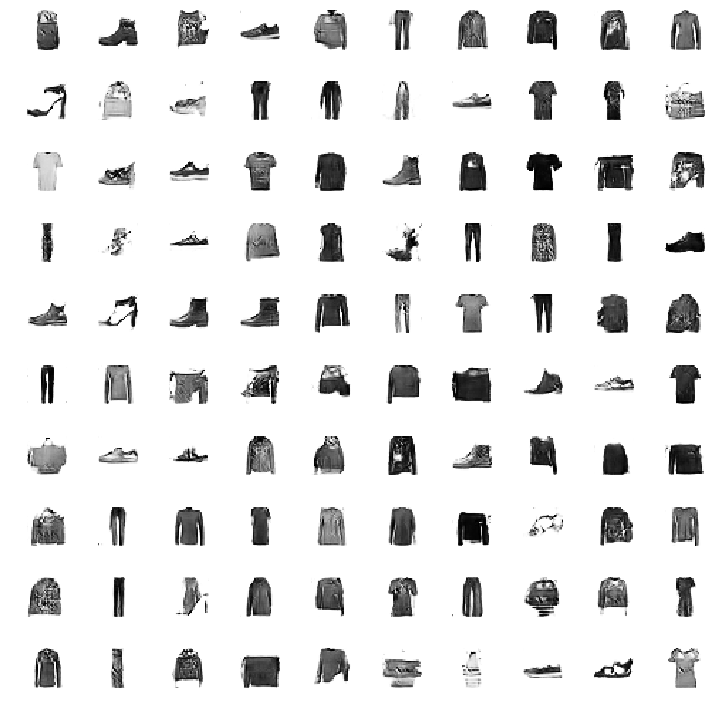

>Saved: ac-gan_generated_plot_0040.png and ac-gan_generator_model_0040.h5
>41, 1/468, dr[0.705,0.197], df[0.694,0.014], g[1.100,0.026]
>41, 2/468, dr[0.587,0.302], df[0.666,0.064], g[1.199,0.016]
>41, 3/468, dr[0.561,0.174], df[0.522,0.030], g[1.058,0.040]
>41, 4/468, dr[0.592,0.295], df[0.620,0.046], g[1.122,0.034]
>41, 5/468, dr[0.767,0.639], df[0.812,0.040], g[1.182,0.046]
>41, 6/468, dr[0.674,0.595], df[0.688,0.043], g[1.066,0.036]
>41, 7/468, dr[0.647,0.490], df[0.453,0.021], g[1.078,0.049]
>41, 8/468, dr[0.666,0.363], df[0.729,0.041], g[1.047,0.050]
>41, 9/468, dr[0.719,0.419], df[0.492,0.034], g[0.947,0.118]
>41, 10/468, dr[0.643,0.393], df[0.799,0.044], g[1.066,0.052]
>41, 11/468, dr[0.523,0.540], df[0.763,0.095], g[1.000,0.073]
>41, 12/468, dr[0.608,0.456], df[0.506,0.046], g[1.115,0.047]
>41, 13/468, dr[0.641,0.323], df[0.570,0.075], g[1.090,0.075]
>41, 14/468, dr[0.638,0.125], df[0.663,0.032], g[1.070,0.059]
>41, 15/468, dr[0.711,0.490], df[0.697,0.046], g[1.109,0.025]
>41, 

>41, 137/468, dr[0.639,0.255], df[0.613,0.060], g[1.128,0.043]
>41, 138/468, dr[0.661,0.502], df[0.637,0.015], g[0.940,0.044]
>41, 139/468, dr[0.618,0.140], df[0.674,0.011], g[1.107,0.048]
>41, 140/468, dr[0.565,0.488], df[0.653,0.042], g[1.257,0.014]
>41, 141/468, dr[0.603,0.261], df[0.671,0.014], g[1.329,0.015]
>41, 142/468, dr[0.591,0.351], df[0.538,0.029], g[1.160,0.034]
>41, 143/468, dr[0.543,0.426], df[0.469,0.101], g[1.145,0.052]
>41, 144/468, dr[0.544,0.216], df[0.559,0.013], g[1.030,0.036]
>41, 145/468, dr[0.552,0.315], df[0.762,0.021], g[1.109,0.037]
>41, 146/468, dr[0.721,0.254], df[0.617,0.026], g[1.182,0.035]
>41, 147/468, dr[0.593,0.447], df[0.668,0.041], g[1.194,0.029]
>41, 148/468, dr[0.689,0.332], df[0.592,0.010], g[1.230,0.038]
>41, 149/468, dr[0.812,0.196], df[0.718,0.107], g[1.095,0.041]
>41, 150/468, dr[0.697,0.232], df[0.648,0.060], g[1.169,0.051]
>41, 151/468, dr[0.564,0.402], df[0.536,0.107], g[1.172,0.053]
>41, 152/468, dr[0.680,0.288], df[0.638,0.018], g[1.206

>41, 269/468, dr[0.652,0.625], df[0.481,0.059], g[1.120,0.034]
>41, 270/468, dr[0.634,0.422], df[0.753,0.033], g[0.935,0.023]
>41, 271/468, dr[0.570,0.314], df[0.646,0.039], g[1.246,0.062]
>41, 272/468, dr[0.556,0.352], df[0.691,0.018], g[1.198,0.063]
>41, 273/468, dr[0.647,0.705], df[0.620,0.048], g[1.334,0.073]
>41, 274/468, dr[0.668,0.420], df[0.610,0.025], g[1.108,0.050]
>41, 275/468, dr[0.706,0.282], df[0.537,0.033], g[1.107,0.087]
>41, 276/468, dr[0.791,0.428], df[0.587,0.078], g[1.000,0.037]
>41, 277/468, dr[0.563,0.565], df[0.501,0.029], g[0.988,0.029]
>41, 278/468, dr[0.562,0.268], df[0.755,0.019], g[1.026,0.016]
>41, 279/468, dr[0.629,0.420], df[0.694,0.020], g[1.087,0.024]
>41, 280/468, dr[0.645,0.385], df[0.621,0.040], g[1.035,0.025]
>41, 281/468, dr[0.549,0.409], df[0.653,0.082], g[1.116,0.027]
>41, 282/468, dr[0.680,0.473], df[0.650,0.046], g[1.100,0.035]
>41, 283/468, dr[0.726,0.513], df[0.523,0.011], g[1.079,0.059]
>41, 284/468, dr[0.608,0.558], df[0.723,0.031], g[0.947

>41, 400/468, dr[0.618,0.292], df[0.557,0.159], g[1.084,0.035]
>41, 401/468, dr[0.580,0.427], df[0.561,0.019], g[1.153,0.046]
>41, 402/468, dr[0.588,0.316], df[0.633,0.044], g[1.177,0.077]
>41, 403/468, dr[0.680,0.407], df[0.582,0.041], g[1.095,0.085]
>41, 404/468, dr[0.628,0.425], df[0.651,0.115], g[1.076,0.110]
>41, 405/468, dr[0.634,0.633], df[0.561,0.088], g[1.163,0.012]
>41, 406/468, dr[0.659,0.397], df[0.624,0.039], g[1.113,0.016]
>41, 407/468, dr[0.734,0.360], df[0.754,0.069], g[1.250,0.025]
>41, 408/468, dr[0.591,0.466], df[0.589,0.025], g[1.213,0.022]
>41, 409/468, dr[0.772,0.270], df[0.540,0.030], g[0.988,0.065]
>41, 410/468, dr[0.597,0.477], df[0.723,0.020], g[1.073,0.031]
>41, 411/468, dr[0.607,0.233], df[0.571,0.053], g[1.068,0.041]
>41, 412/468, dr[0.569,0.351], df[0.856,0.024], g[1.116,0.022]
>41, 413/468, dr[0.465,0.293], df[0.603,0.034], g[1.425,0.019]
>41, 414/468, dr[0.691,0.578], df[0.603,0.110], g[1.294,0.071]
>41, 415/468, dr[0.701,0.293], df[0.616,0.049], g[1.082

>42, 65/468, dr[0.560,0.442], df[0.707,0.078], g[1.114,0.022]
>42, 66/468, dr[0.595,0.350], df[0.585,0.055], g[1.148,0.042]
>42, 67/468, dr[0.606,0.421], df[0.611,0.041], g[1.116,0.031]
>42, 68/468, dr[0.625,0.519], df[0.501,0.027], g[1.131,0.040]
>42, 69/468, dr[0.692,0.278], df[0.571,0.022], g[1.141,0.046]
>42, 70/468, dr[0.597,0.375], df[0.652,0.042], g[1.011,0.044]
>42, 71/468, dr[0.621,0.297], df[0.608,0.027], g[1.103,0.029]
>42, 72/468, dr[0.657,0.338], df[0.650,0.072], g[1.110,0.048]
>42, 73/468, dr[0.632,0.563], df[0.677,0.033], g[1.042,0.025]
>42, 74/468, dr[0.571,0.319], df[0.596,0.051], g[1.240,0.017]
>42, 75/468, dr[0.575,0.497], df[0.593,0.009], g[1.131,0.033]
>42, 76/468, dr[0.668,0.861], df[0.603,0.017], g[1.127,0.033]
>42, 77/468, dr[0.731,0.288], df[0.644,0.027], g[0.908,0.023]
>42, 78/468, dr[0.635,0.158], df[0.696,0.028], g[1.069,0.024]
>42, 79/468, dr[0.592,0.225], df[0.735,0.061], g[1.055,0.031]
>42, 80/468, dr[0.533,0.389], df[0.575,0.060], g[1.068,0.029]
>42, 81/

>42, 200/468, dr[0.711,0.183], df[0.682,0.057], g[1.004,0.048]
>42, 201/468, dr[0.578,0.290], df[0.542,0.030], g[1.161,0.029]
>42, 202/468, dr[0.579,0.593], df[0.634,0.020], g[1.103,0.047]
>42, 203/468, dr[0.608,0.389], df[0.551,0.013], g[1.101,0.028]
>42, 204/468, dr[0.666,0.358], df[0.803,0.110], g[1.155,0.047]
>42, 205/468, dr[0.660,0.219], df[0.731,0.031], g[1.141,0.037]
>42, 206/468, dr[0.814,0.610], df[0.680,0.045], g[1.108,0.034]
>42, 207/468, dr[0.562,0.331], df[0.593,0.038], g[1.139,0.072]
>42, 208/468, dr[0.705,0.611], df[0.621,0.015], g[1.235,0.084]
>42, 209/468, dr[0.714,0.232], df[0.593,0.046], g[1.101,0.037]
>42, 210/468, dr[0.685,0.407], df[0.574,0.051], g[1.118,0.060]
>42, 211/468, dr[0.674,0.424], df[0.632,0.031], g[1.248,0.076]
>42, 212/468, dr[0.668,0.428], df[0.671,0.097], g[1.107,0.049]
>42, 213/468, dr[0.649,0.274], df[0.540,0.050], g[1.030,0.072]
>42, 214/468, dr[0.583,0.397], df[0.563,0.018], g[0.885,0.101]
>42, 215/468, dr[0.561,0.339], df[0.697,0.023], g[0.914

>42, 335/468, dr[0.658,0.665], df[0.619,0.045], g[1.202,0.023]
>42, 336/468, dr[0.611,0.585], df[0.586,0.048], g[1.130,0.037]
>42, 337/468, dr[0.615,0.285], df[0.755,0.017], g[1.097,0.028]
>42, 338/468, dr[0.687,0.175], df[0.637,0.057], g[1.133,0.085]
>42, 339/468, dr[0.766,0.536], df[0.735,0.054], g[1.135,0.053]
>42, 340/468, dr[0.708,0.506], df[0.616,0.055], g[1.128,0.060]
>42, 341/468, dr[0.648,0.288], df[0.693,0.040], g[1.164,0.029]
>42, 342/468, dr[0.747,0.351], df[0.683,0.045], g[1.146,0.059]
>42, 343/468, dr[0.647,0.337], df[0.683,0.021], g[1.066,0.087]
>42, 344/468, dr[0.603,0.405], df[0.567,0.045], g[1.022,0.045]
>42, 345/468, dr[0.536,0.394], df[0.660,0.024], g[1.189,0.046]
>42, 346/468, dr[0.587,0.306], df[0.600,0.035], g[1.287,0.016]
>42, 347/468, dr[0.526,0.303], df[0.588,0.022], g[1.229,0.023]
>42, 348/468, dr[0.763,0.360], df[0.599,0.030], g[1.127,0.044]
>42, 349/468, dr[0.776,0.618], df[0.639,0.050], g[0.921,0.052]
>42, 350/468, dr[0.502,0.390], df[0.674,0.013], g[1.134

>42, 466/468, dr[0.608,0.434], df[0.594,0.046], g[1.275,0.020]
>42, 467/468, dr[0.778,0.475], df[0.605,0.013], g[1.078,0.032]
>42, 468/468, dr[0.753,0.467], df[0.556,0.022], g[1.012,0.060]
>43, 1/468, dr[0.517,0.465], df[0.585,0.054], g[1.133,0.027]
>43, 2/468, dr[0.545,0.327], df[0.628,0.016], g[1.065,0.073]
>43, 3/468, dr[0.739,0.261], df[0.620,0.016], g[1.138,0.055]
>43, 4/468, dr[0.657,0.297], df[0.711,0.019], g[1.102,0.045]
>43, 5/468, dr[0.641,0.245], df[0.674,0.097], g[1.205,0.033]
>43, 6/468, dr[0.637,0.607], df[0.598,0.015], g[1.109,0.057]
>43, 7/468, dr[0.586,0.257], df[0.659,0.017], g[1.038,0.049]
>43, 8/468, dr[0.796,0.205], df[0.689,0.009], g[1.117,0.037]
>43, 9/468, dr[0.515,0.317], df[0.594,0.034], g[1.146,0.062]
>43, 10/468, dr[0.536,0.324], df[0.687,0.012], g[1.185,0.028]
>43, 11/468, dr[0.660,0.414], df[0.526,0.070], g[1.276,0.093]
>43, 12/468, dr[0.694,0.269], df[0.673,0.054], g[1.094,0.025]
>43, 13/468, dr[0.670,0.528], df[0.643,0.027], g[1.061,0.039]
>43, 14/468, d

>43, 131/468, dr[0.729,0.359], df[0.689,0.079], g[1.144,0.027]
>43, 132/468, dr[0.570,0.440], df[0.766,0.089], g[1.053,0.104]
>43, 133/468, dr[0.735,0.232], df[0.725,0.021], g[1.046,0.028]
>43, 134/468, dr[0.586,0.402], df[0.703,0.025], g[1.252,0.066]
>43, 135/468, dr[0.670,0.451], df[0.647,0.049], g[1.031,0.024]
>43, 136/468, dr[0.510,0.380], df[0.626,0.016], g[1.123,0.030]
>43, 137/468, dr[0.526,0.452], df[0.621,0.029], g[1.133,0.023]
>43, 138/468, dr[0.756,0.236], df[0.674,0.016], g[1.160,0.034]
>43, 139/468, dr[0.764,0.444], df[0.686,0.007], g[1.198,0.021]
>43, 140/468, dr[0.630,0.169], df[0.588,0.030], g[1.190,0.014]
>43, 141/468, dr[0.646,0.442], df[0.512,0.032], g[1.154,0.058]
>43, 142/468, dr[0.641,0.355], df[0.645,0.018], g[1.105,0.025]
>43, 143/468, dr[0.608,0.324], df[0.674,0.057], g[1.123,0.042]
>43, 144/468, dr[0.700,0.233], df[0.652,0.024], g[1.085,0.015]
>43, 145/468, dr[0.662,0.362], df[0.635,0.067], g[1.118,0.088]
>43, 146/468, dr[0.608,0.318], df[0.507,0.042], g[0.971

>43, 266/468, dr[0.599,0.312], df[0.529,0.044], g[0.930,0.039]
>43, 267/468, dr[0.715,0.530], df[0.702,0.024], g[1.155,0.028]
>43, 268/468, dr[0.602,0.438], df[0.762,0.060], g[1.154,0.055]
>43, 269/468, dr[0.627,0.292], df[0.631,0.064], g[1.206,0.064]
>43, 270/468, dr[0.718,0.212], df[0.481,0.013], g[1.127,0.014]
>43, 271/468, dr[0.626,0.495], df[0.606,0.022], g[1.097,0.036]
>43, 272/468, dr[0.577,0.569], df[0.727,0.062], g[1.119,0.043]
>43, 273/468, dr[0.616,0.515], df[0.648,0.015], g[1.229,0.040]
>43, 274/468, dr[0.637,0.160], df[0.546,0.040], g[1.060,0.031]
>43, 275/468, dr[0.860,0.321], df[0.659,0.029], g[1.158,0.033]
>43, 276/468, dr[0.676,0.424], df[0.689,0.040], g[1.071,0.030]
>43, 277/468, dr[0.569,0.285], df[0.676,0.053], g[1.151,0.033]
>43, 278/468, dr[0.629,0.328], df[0.613,0.086], g[1.082,0.055]
>43, 279/468, dr[0.709,0.441], df[0.786,0.067], g[1.238,0.030]
>43, 280/468, dr[0.587,0.318], df[0.721,0.029], g[1.137,0.033]
>43, 281/468, dr[0.785,0.171], df[0.688,0.051], g[1.075

>43, 399/468, dr[0.778,0.255], df[0.642,0.017], g[0.958,0.020]
>43, 400/468, dr[0.604,0.187], df[0.569,0.027], g[1.150,0.043]
>43, 401/468, dr[0.796,0.491], df[0.616,0.041], g[1.067,0.071]
>43, 402/468, dr[0.474,0.385], df[0.682,0.032], g[0.967,0.024]
>43, 403/468, dr[0.536,0.159], df[0.498,0.014], g[1.151,0.027]
>43, 404/468, dr[0.690,0.244], df[0.535,0.048], g[1.145,0.023]
>43, 405/468, dr[0.749,0.084], df[0.767,0.029], g[1.031,0.034]
>43, 406/468, dr[0.615,0.470], df[0.600,0.055], g[1.079,0.036]
>43, 407/468, dr[0.713,0.265], df[0.629,0.095], g[1.057,0.046]
>43, 408/468, dr[0.533,0.388], df[0.726,0.019], g[1.150,0.042]
>43, 409/468, dr[0.635,0.337], df[0.719,0.080], g[1.060,0.054]
>43, 410/468, dr[0.697,0.326], df[0.570,0.017], g[1.103,0.014]
>43, 411/468, dr[0.723,0.256], df[0.726,0.017], g[1.112,0.043]
>43, 412/468, dr[0.633,0.380], df[0.644,0.013], g[1.021,0.084]
>43, 413/468, dr[0.808,0.274], df[0.719,0.028], g[1.068,0.057]
>43, 414/468, dr[0.562,0.293], df[0.647,0.083], g[1.129

>44, 65/468, dr[0.677,0.526], df[0.693,0.025], g[0.964,0.039]
>44, 66/468, dr[0.658,0.420], df[0.606,0.076], g[0.885,0.049]
>44, 67/468, dr[0.668,0.389], df[0.697,0.096], g[0.989,0.024]
>44, 68/468, dr[0.595,0.469], df[0.679,0.041], g[1.086,0.033]
>44, 69/468, dr[0.520,0.379], df[0.717,0.035], g[1.037,0.088]
>44, 70/468, dr[0.719,0.561], df[0.607,0.032], g[1.059,0.092]
>44, 71/468, dr[0.511,0.246], df[0.583,0.066], g[1.247,0.028]
>44, 72/468, dr[0.699,0.668], df[0.539,0.042], g[1.108,0.047]
>44, 73/468, dr[0.626,0.424], df[0.609,0.021], g[1.082,0.013]
>44, 74/468, dr[0.543,0.292], df[0.561,0.042], g[1.180,0.025]
>44, 75/468, dr[0.618,0.350], df[0.522,0.031], g[1.210,0.021]
>44, 76/468, dr[0.618,0.248], df[0.547,0.055], g[1.196,0.043]
>44, 77/468, dr[0.828,0.499], df[0.634,0.038], g[0.975,0.060]
>44, 78/468, dr[0.638,0.512], df[0.618,0.057], g[0.943,0.022]
>44, 79/468, dr[0.625,0.344], df[0.674,0.014], g[1.000,0.052]
>44, 80/468, dr[0.544,0.361], df[0.703,0.034], g[1.098,0.029]
>44, 81/

>44, 200/468, dr[0.615,0.397], df[0.649,0.040], g[1.120,0.026]
>44, 201/468, dr[0.685,0.444], df[0.718,0.037], g[1.161,0.021]
>44, 202/468, dr[0.651,0.282], df[0.730,0.094], g[1.019,0.018]
>44, 203/468, dr[0.630,0.299], df[0.736,0.067], g[1.068,0.072]
>44, 204/468, dr[0.793,0.593], df[0.579,0.014], g[1.067,0.023]
>44, 205/468, dr[0.647,0.205], df[0.656,0.023], g[1.142,0.016]
>44, 206/468, dr[0.741,0.277], df[0.666,0.025], g[1.125,0.023]
>44, 207/468, dr[0.754,0.413], df[0.727,0.076], g[1.044,0.049]
>44, 208/468, dr[0.628,0.431], df[0.653,0.047], g[1.152,0.037]
>44, 209/468, dr[0.739,0.420], df[0.588,0.024], g[0.997,0.052]
>44, 210/468, dr[0.670,0.272], df[0.618,0.022], g[1.057,0.078]
>44, 211/468, dr[0.641,0.215], df[0.608,0.045], g[0.939,0.019]
>44, 212/468, dr[0.533,0.158], df[0.610,0.015], g[0.991,0.018]
>44, 213/468, dr[0.659,0.460], df[0.834,0.044], g[1.111,0.035]
>44, 214/468, dr[0.683,0.137], df[0.576,0.059], g[1.113,0.031]
>44, 215/468, dr[0.668,0.369], df[0.659,0.028], g[1.118

>44, 336/468, dr[0.612,0.465], df[0.707,0.021], g[1.016,0.026]
>44, 337/468, dr[0.527,0.368], df[0.821,0.042], g[1.014,0.098]
>44, 338/468, dr[0.728,0.485], df[0.524,0.049], g[1.138,0.063]
>44, 339/468, dr[0.660,0.300], df[0.577,0.046], g[1.156,0.062]
>44, 340/468, dr[0.813,0.373], df[0.698,0.025], g[1.122,0.080]
>44, 341/468, dr[0.695,0.454], df[0.751,0.039], g[0.939,0.029]
>44, 342/468, dr[0.524,0.362], df[0.582,0.034], g[1.073,0.021]
>44, 343/468, dr[0.603,0.557], df[0.565,0.015], g[1.002,0.031]
>44, 344/468, dr[0.638,0.170], df[0.675,0.040], g[0.920,0.024]
>44, 345/468, dr[0.727,0.482], df[0.663,0.028], g[0.952,0.072]
>44, 346/468, dr[0.558,0.404], df[0.649,0.043], g[1.042,0.049]
>44, 347/468, dr[0.629,0.340], df[0.578,0.033], g[0.934,0.032]
>44, 348/468, dr[0.573,0.308], df[0.804,0.042], g[1.132,0.061]
>44, 349/468, dr[0.553,0.429], df[0.539,0.020], g[1.195,0.023]
>44, 350/468, dr[0.691,0.581], df[0.731,0.045], g[1.140,0.039]
>44, 351/468, dr[0.618,0.252], df[0.554,0.007], g[1.093

>44, 468/468, dr[0.559,0.357], df[0.579,0.082], g[1.019,0.065]
>45, 1/468, dr[0.501,0.317], df[0.511,0.043], g[1.232,0.060]
>45, 2/468, dr[0.596,0.438], df[0.644,0.023], g[1.205,0.034]
>45, 3/468, dr[0.625,0.566], df[0.563,0.046], g[1.178,0.055]
>45, 4/468, dr[0.676,0.344], df[0.515,0.044], g[1.015,0.029]
>45, 5/468, dr[0.661,0.500], df[0.573,0.015], g[1.090,0.050]
>45, 6/468, dr[0.628,0.381], df[0.700,0.010], g[1.078,0.086]
>45, 7/468, dr[0.609,0.455], df[0.789,0.093], g[1.104,0.025]
>45, 8/468, dr[0.579,0.325], df[0.691,0.047], g[1.071,0.085]
>45, 9/468, dr[0.658,0.344], df[0.559,0.032], g[1.053,0.062]
>45, 10/468, dr[0.568,0.492], df[0.792,0.050], g[1.124,0.052]
>45, 11/468, dr[0.629,0.297], df[0.639,0.047], g[1.072,0.031]
>45, 12/468, dr[0.578,0.389], df[0.464,0.037], g[1.176,0.037]
>45, 13/468, dr[0.655,0.472], df[0.585,0.018], g[1.004,0.030]
>45, 14/468, dr[0.702,0.265], df[0.693,0.034], g[1.000,0.072]
>45, 15/468, dr[0.411,0.452], df[0.701,0.017], g[1.014,0.050]
>45, 16/468, dr[

>45, 134/468, dr[0.684,0.272], df[0.553,0.020], g[1.015,0.009]
>45, 135/468, dr[0.588,0.316], df[0.634,0.024], g[1.015,0.033]
>45, 136/468, dr[0.694,0.358], df[0.717,0.026], g[1.051,0.049]
>45, 137/468, dr[0.671,0.414], df[0.637,0.091], g[0.996,0.023]
>45, 138/468, dr[0.698,0.178], df[0.719,0.073], g[1.060,0.039]
>45, 139/468, dr[0.475,0.554], df[0.602,0.021], g[1.190,0.053]
>45, 140/468, dr[0.674,0.418], df[0.553,0.009], g[1.011,0.052]
>45, 141/468, dr[0.537,0.201], df[0.627,0.024], g[1.175,0.040]
>45, 142/468, dr[0.690,0.403], df[0.789,0.134], g[1.090,0.041]
>45, 143/468, dr[0.701,0.443], df[0.737,0.072], g[1.183,0.025]
>45, 144/468, dr[0.721,0.435], df[0.579,0.082], g[1.083,0.031]
>45, 145/468, dr[0.530,0.383], df[0.613,0.076], g[1.119,0.052]
>45, 146/468, dr[0.588,0.266], df[0.614,0.044], g[1.109,0.048]
>45, 147/468, dr[0.744,0.380], df[0.712,0.026], g[1.150,0.026]
>45, 148/468, dr[0.665,0.466], df[0.642,0.045], g[1.108,0.037]
>45, 149/468, dr[0.643,0.283], df[0.514,0.046], g[1.166

>45, 268/468, dr[0.627,0.327], df[0.647,0.050], g[1.006,0.063]
>45, 269/468, dr[0.535,0.311], df[0.661,0.065], g[1.197,0.059]
>45, 270/468, dr[0.668,0.603], df[0.683,0.064], g[0.919,0.039]
>45, 271/468, dr[0.634,0.349], df[0.730,0.040], g[1.140,0.039]
>45, 272/468, dr[0.684,0.507], df[0.688,0.051], g[1.000,0.019]
>45, 273/468, dr[0.699,0.299], df[0.557,0.028], g[1.090,0.025]
>45, 274/468, dr[0.526,0.651], df[0.702,0.029], g[1.016,0.048]
>45, 275/468, dr[0.626,0.546], df[0.664,0.081], g[1.094,0.031]
>45, 276/468, dr[0.611,0.241], df[0.646,0.017], g[0.971,0.055]
>45, 277/468, dr[0.710,0.606], df[0.720,0.032], g[1.042,0.044]
>45, 278/468, dr[0.606,0.198], df[0.694,0.150], g[1.095,0.031]
>45, 279/468, dr[0.656,0.303], df[0.573,0.018], g[1.248,0.058]
>45, 280/468, dr[0.679,0.327], df[0.600,0.066], g[1.054,0.089]
>45, 281/468, dr[0.693,0.360], df[0.649,0.033], g[1.110,0.053]
>45, 282/468, dr[0.643,0.281], df[0.803,0.045], g[1.099,0.028]
>45, 283/468, dr[0.618,0.203], df[0.562,0.042], g[0.952

>45, 399/468, dr[0.679,0.589], df[0.632,0.069], g[1.076,0.039]
>45, 400/468, dr[0.624,0.283], df[0.615,0.036], g[1.162,0.033]
>45, 401/468, dr[0.645,0.253], df[0.699,0.018], g[1.144,0.058]
>45, 402/468, dr[0.637,0.370], df[0.482,0.053], g[1.083,0.095]
>45, 403/468, dr[0.698,0.396], df[0.747,0.109], g[1.173,0.046]
>45, 404/468, dr[0.706,0.761], df[0.620,0.014], g[0.942,0.023]
>45, 405/468, dr[0.648,0.320], df[0.579,0.089], g[1.018,0.024]
>45, 406/468, dr[0.746,0.459], df[0.623,0.047], g[0.923,0.053]
>45, 407/468, dr[0.594,0.248], df[0.760,0.066], g[1.083,0.074]
>45, 408/468, dr[0.487,0.341], df[0.654,0.048], g[1.077,0.040]
>45, 409/468, dr[0.674,0.159], df[0.526,0.059], g[1.204,0.031]
>45, 410/468, dr[0.724,0.247], df[0.683,0.024], g[1.147,0.027]
>45, 411/468, dr[0.676,0.268], df[0.575,0.028], g[1.084,0.076]
>45, 412/468, dr[0.726,0.423], df[0.681,0.058], g[1.089,0.038]
>45, 413/468, dr[0.642,0.330], df[0.555,0.027], g[0.977,0.037]
>45, 414/468, dr[0.610,0.429], df[0.769,0.046], g[1.126

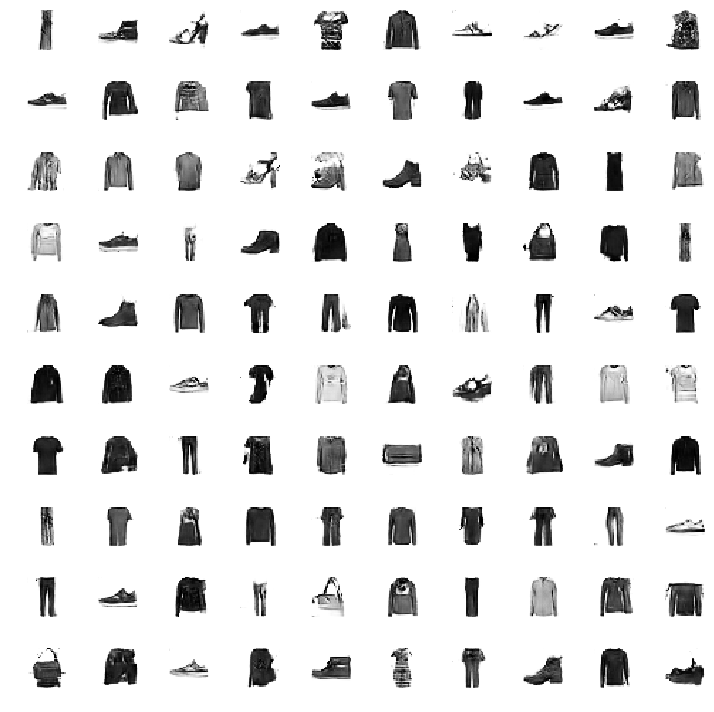

>Saved: ac-gan_generated_plot_0045.png and ac-gan_generator_model_0045.h5
>46, 1/468, dr[0.669,0.419], df[0.719,0.011], g[0.951,0.031]
>46, 2/468, dr[0.766,0.362], df[0.682,0.033], g[1.208,0.040]
>46, 3/468, dr[0.552,0.435], df[0.605,0.022], g[1.064,0.108]
>46, 4/468, dr[0.618,0.524], df[0.527,0.074], g[0.995,0.056]
>46, 5/468, dr[0.653,0.250], df[0.641,0.091], g[1.108,0.024]
>46, 6/468, dr[0.595,0.340], df[0.636,0.113], g[1.095,0.027]
>46, 7/468, dr[0.707,0.179], df[0.624,0.051], g[1.039,0.046]
>46, 8/468, dr[0.703,0.449], df[0.576,0.032], g[1.109,0.041]
>46, 9/468, dr[0.631,0.456], df[0.630,0.021], g[1.026,0.016]
>46, 10/468, dr[0.563,0.303], df[0.682,0.031], g[1.032,0.016]
>46, 11/468, dr[0.708,0.333], df[0.523,0.043], g[1.205,0.049]
>46, 12/468, dr[0.602,0.302], df[0.727,0.038], g[1.103,0.033]
>46, 13/468, dr[0.658,0.468], df[0.854,0.068], g[1.087,0.043]
>46, 14/468, dr[0.536,0.434], df[0.560,0.037], g[1.157,0.046]
>46, 15/468, dr[0.485,0.395], df[0.548,0.037], g[1.324,0.030]
>46, 

>46, 137/468, dr[0.519,0.535], df[0.522,0.041], g[1.084,0.053]
>46, 138/468, dr[0.797,0.354], df[0.609,0.030], g[0.964,0.025]
>46, 139/468, dr[0.518,0.481], df[0.650,0.038], g[1.162,0.036]
>46, 140/468, dr[0.580,0.413], df[0.551,0.048], g[1.115,0.031]
>46, 141/468, dr[0.730,0.569], df[0.480,0.017], g[1.000,0.050]
>46, 142/468, dr[0.533,0.328], df[0.650,0.067], g[1.001,0.048]
>46, 143/468, dr[0.565,0.363], df[0.607,0.051], g[1.004,0.085]
>46, 144/468, dr[0.605,0.410], df[0.647,0.017], g[1.176,0.028]
>46, 145/468, dr[0.759,0.293], df[0.735,0.066], g[1.085,0.026]
>46, 146/468, dr[0.613,0.274], df[0.601,0.095], g[1.156,0.049]
>46, 147/468, dr[0.742,0.479], df[0.620,0.022], g[1.112,0.049]
>46, 148/468, dr[0.548,0.341], df[0.607,0.058], g[1.030,0.047]
>46, 149/468, dr[0.603,0.246], df[0.700,0.019], g[1.018,0.051]
>46, 150/468, dr[0.645,0.319], df[0.612,0.031], g[1.119,0.039]
>46, 151/468, dr[0.639,0.286], df[0.732,0.039], g[1.113,0.090]
>46, 152/468, dr[0.612,0.289], df[0.584,0.038], g[1.085

>46, 268/468, dr[0.710,0.383], df[0.578,0.032], g[0.969,0.037]
>46, 269/468, dr[0.563,0.308], df[0.632,0.044], g[1.189,0.017]
>46, 270/468, dr[0.720,0.362], df[0.529,0.050], g[1.111,0.036]
>46, 271/468, dr[0.698,0.328], df[0.547,0.050], g[0.915,0.084]
>46, 272/468, dr[0.531,0.438], df[0.743,0.018], g[1.095,0.032]
>46, 273/468, dr[0.647,0.263], df[0.697,0.089], g[1.101,0.037]
>46, 274/468, dr[0.680,0.219], df[0.548,0.057], g[0.996,0.089]
>46, 275/468, dr[0.535,0.571], df[0.759,0.064], g[1.123,0.026]
>46, 276/468, dr[0.580,0.287], df[0.648,0.014], g[1.105,0.017]
>46, 277/468, dr[0.830,0.634], df[0.633,0.106], g[1.145,0.033]
>46, 278/468, dr[0.596,0.367], df[0.669,0.105], g[1.019,0.063]
>46, 279/468, dr[0.680,0.811], df[0.663,0.012], g[0.989,0.069]
>46, 280/468, dr[0.771,0.376], df[0.732,0.095], g[1.068,0.049]
>46, 281/468, dr[0.677,0.553], df[0.536,0.016], g[1.072,0.040]
>46, 282/468, dr[0.635,0.462], df[0.629,0.060], g[1.011,0.034]
>46, 283/468, dr[0.597,0.481], df[0.651,0.043], g[1.067

>46, 404/468, dr[0.508,0.507], df[0.737,0.057], g[1.048,0.024]
>46, 405/468, dr[0.522,0.555], df[0.572,0.007], g[1.078,0.050]
>46, 406/468, dr[0.647,0.396], df[0.605,0.074], g[1.161,0.014]
>46, 407/468, dr[0.749,0.314], df[0.590,0.012], g[0.980,0.022]
>46, 408/468, dr[0.541,0.439], df[0.592,0.032], g[1.087,0.046]
>46, 409/468, dr[0.528,0.213], df[0.691,0.041], g[1.058,0.020]
>46, 410/468, dr[0.663,0.369], df[0.590,0.024], g[1.023,0.050]
>46, 411/468, dr[0.828,0.515], df[0.594,0.068], g[1.145,0.022]
>46, 412/468, dr[0.617,0.531], df[0.715,0.022], g[0.906,0.044]
>46, 413/468, dr[0.602,0.504], df[0.680,0.008], g[1.121,0.074]
>46, 414/468, dr[0.539,0.425], df[0.608,0.059], g[1.065,0.021]
>46, 415/468, dr[0.677,0.554], df[0.619,0.042], g[0.943,0.053]
>46, 416/468, dr[0.619,0.595], df[0.558,0.018], g[0.955,0.028]
>46, 417/468, dr[0.489,0.638], df[0.646,0.021], g[0.978,0.030]
>46, 418/468, dr[0.674,0.410], df[0.569,0.054], g[1.119,0.027]
>46, 419/468, dr[0.725,0.300], df[0.727,0.076], g[1.073

>47, 72/468, dr[0.628,0.296], df[0.669,0.016], g[1.180,0.078]
>47, 73/468, dr[0.585,0.353], df[0.636,0.192], g[1.033,0.026]
>47, 74/468, dr[0.701,0.345], df[0.653,0.077], g[1.220,0.060]
>47, 75/468, dr[0.573,0.461], df[0.685,0.113], g[1.133,0.064]
>47, 76/468, dr[0.814,0.485], df[0.635,0.057], g[1.077,0.013]
>47, 77/468, dr[0.594,0.325], df[0.525,0.031], g[1.037,0.059]
>47, 78/468, dr[0.607,0.553], df[0.598,0.019], g[1.102,0.035]
>47, 79/468, dr[0.552,0.318], df[0.628,0.050], g[1.148,0.029]
>47, 80/468, dr[0.641,0.498], df[0.633,0.014], g[1.028,0.036]
>47, 81/468, dr[0.625,0.676], df[0.758,0.054], g[1.085,0.036]
>47, 82/468, dr[0.611,0.345], df[0.611,0.022], g[1.086,0.055]
>47, 83/468, dr[0.682,0.494], df[0.453,0.012], g[1.126,0.033]
>47, 84/468, dr[0.588,0.586], df[0.513,0.028], g[0.917,0.024]
>47, 85/468, dr[0.637,0.369], df[0.776,0.069], g[0.995,0.060]
>47, 86/468, dr[0.574,0.399], df[0.676,0.043], g[0.941,0.043]
>47, 87/468, dr[0.620,0.548], df[0.663,0.100], g[1.060,0.033]
>47, 88/

>47, 205/468, dr[0.731,0.431], df[0.733,0.015], g[1.003,0.025]
>47, 206/468, dr[0.491,0.560], df[0.659,0.090], g[1.018,0.033]
>47, 207/468, dr[0.532,0.320], df[0.556,0.021], g[1.137,0.025]
>47, 208/468, dr[0.697,0.329], df[0.787,0.039], g[1.028,0.027]
>47, 209/468, dr[0.523,0.336], df[0.588,0.028], g[1.117,0.042]
>47, 210/468, dr[0.715,0.252], df[0.678,0.013], g[1.120,0.066]
>47, 211/468, dr[0.643,0.270], df[0.603,0.019], g[1.219,0.038]
>47, 212/468, dr[0.726,0.485], df[0.587,0.108], g[1.084,0.047]
>47, 213/468, dr[0.752,0.275], df[0.623,0.008], g[1.008,0.046]
>47, 214/468, dr[0.594,0.780], df[0.688,0.023], g[0.976,0.064]
>47, 215/468, dr[0.699,0.271], df[0.620,0.058], g[1.018,0.044]
>47, 216/468, dr[0.785,0.458], df[0.742,0.014], g[1.039,0.059]
>47, 217/468, dr[0.518,0.598], df[0.642,0.008], g[1.068,0.071]
>47, 218/468, dr[0.642,0.579], df[0.612,0.048], g[1.115,0.082]
>47, 219/468, dr[0.617,0.350], df[0.721,0.049], g[0.965,0.035]
>47, 220/468, dr[0.558,0.379], df[0.736,0.082], g[1.075

>47, 339/468, dr[0.694,0.332], df[0.715,0.027], g[1.018,0.036]
>47, 340/468, dr[0.711,0.623], df[0.636,0.025], g[0.938,0.032]
>47, 341/468, dr[0.621,0.351], df[0.626,0.030], g[1.005,0.036]
>47, 342/468, dr[0.672,0.350], df[0.792,0.022], g[1.034,0.046]
>47, 343/468, dr[0.632,0.379], df[0.650,0.029], g[0.967,0.023]
>47, 344/468, dr[0.692,0.261], df[0.599,0.109], g[1.167,0.055]
>47, 345/468, dr[0.571,0.531], df[0.642,0.049], g[0.981,0.043]
>47, 346/468, dr[0.647,0.320], df[0.678,0.021], g[0.966,0.030]
>47, 347/468, dr[0.546,0.413], df[0.631,0.028], g[1.108,0.047]
>47, 348/468, dr[0.662,0.167], df[0.565,0.074], g[1.066,0.046]
>47, 349/468, dr[0.756,0.466], df[0.632,0.027], g[1.063,0.032]
>47, 350/468, dr[0.635,0.394], df[0.715,0.056], g[1.147,0.046]
>47, 351/468, dr[0.657,0.506], df[0.629,0.113], g[1.019,0.031]
>47, 352/468, dr[0.635,0.471], df[0.660,0.044], g[1.207,0.027]
>47, 353/468, dr[0.765,0.406], df[0.695,0.028], g[1.084,0.069]
>47, 354/468, dr[0.727,0.209], df[0.527,0.019], g[1.017

>48, 6/468, dr[0.688,0.430], df[0.754,0.051], g[1.121,0.023]
>48, 7/468, dr[0.634,0.538], df[0.640,0.049], g[1.075,0.051]
>48, 8/468, dr[0.621,0.405], df[0.664,0.057], g[1.100,0.066]
>48, 9/468, dr[0.655,0.248], df[0.614,0.007], g[1.038,0.057]
>48, 10/468, dr[0.633,0.232], df[0.640,0.017], g[1.134,0.026]
>48, 11/468, dr[0.613,0.210], df[0.561,0.028], g[1.261,0.025]
>48, 12/468, dr[0.656,0.244], df[0.693,0.031], g[1.227,0.040]
>48, 13/468, dr[0.713,0.282], df[0.688,0.018], g[1.111,0.024]
>48, 14/468, dr[0.832,0.619], df[0.639,0.029], g[0.944,0.030]
>48, 15/468, dr[0.677,0.719], df[0.602,0.062], g[1.063,0.052]
>48, 16/468, dr[0.762,0.426], df[0.731,0.101], g[0.904,0.041]
>48, 17/468, dr[0.611,0.296], df[0.731,0.077], g[1.066,0.034]
>48, 18/468, dr[0.664,0.244], df[0.736,0.090], g[1.044,0.042]
>48, 19/468, dr[0.566,0.248], df[0.603,0.024], g[1.068,0.033]
>48, 20/468, dr[0.710,0.370], df[0.669,0.012], g[1.054,0.025]
>48, 21/468, dr[0.643,0.319], df[0.588,0.020], g[0.993,0.015]
>48, 22/468,

>48, 140/468, dr[0.726,0.492], df[0.523,0.067], g[1.005,0.035]
>48, 141/468, dr[0.668,0.464], df[0.763,0.019], g[1.205,0.025]
>48, 142/468, dr[0.670,0.317], df[0.650,0.014], g[1.076,0.028]
>48, 143/468, dr[0.458,0.292], df[0.744,0.019], g[1.145,0.042]
>48, 144/468, dr[0.920,0.241], df[0.616,0.024], g[1.211,0.028]
>48, 145/468, dr[0.636,0.304], df[0.589,0.045], g[1.196,0.045]
>48, 146/468, dr[0.698,0.233], df[0.587,0.021], g[1.038,0.028]
>48, 147/468, dr[0.623,0.301], df[0.619,0.039], g[1.102,0.050]
>48, 148/468, dr[0.642,0.177], df[0.577,0.046], g[1.052,0.037]
>48, 149/468, dr[0.578,0.205], df[0.714,0.055], g[1.033,0.026]
>48, 150/468, dr[0.733,0.291], df[0.588,0.009], g[1.062,0.031]
>48, 151/468, dr[0.580,0.584], df[0.711,0.033], g[1.018,0.052]
>48, 152/468, dr[0.735,0.393], df[0.645,0.152], g[1.120,0.055]
>48, 153/468, dr[0.754,0.182], df[0.746,0.015], g[1.090,0.035]
>48, 154/468, dr[0.551,0.475], df[0.560,0.037], g[1.098,0.047]
>48, 155/468, dr[0.616,0.317], df[0.595,0.021], g[1.169

>48, 273/468, dr[0.615,0.329], df[0.547,0.039], g[1.001,0.025]
>48, 274/468, dr[0.801,0.520], df[0.602,0.017], g[1.035,0.047]
>48, 275/468, dr[0.685,0.259], df[0.764,0.026], g[1.007,0.032]
>48, 276/468, dr[0.488,0.365], df[0.721,0.034], g[1.052,0.036]
>48, 277/468, dr[0.513,0.506], df[0.582,0.046], g[1.131,0.036]
>48, 278/468, dr[0.620,0.326], df[0.612,0.079], g[1.057,0.014]
>48, 279/468, dr[0.647,0.320], df[0.575,0.065], g[1.119,0.019]
>48, 280/468, dr[0.677,0.248], df[0.705,0.066], g[1.171,0.022]
>48, 281/468, dr[0.647,0.215], df[0.658,0.021], g[1.092,0.024]
>48, 282/468, dr[0.648,0.207], df[0.589,0.017], g[1.066,0.026]
>48, 283/468, dr[0.694,0.380], df[0.719,0.031], g[1.001,0.049]
>48, 284/468, dr[0.560,0.450], df[0.635,0.022], g[1.218,0.056]
>48, 285/468, dr[0.756,0.460], df[0.579,0.030], g[1.072,0.025]
>48, 286/468, dr[0.710,0.385], df[0.582,0.038], g[1.076,0.050]
>48, 287/468, dr[0.548,0.345], df[0.675,0.022], g[1.086,0.031]
>48, 288/468, dr[0.599,0.290], df[0.613,0.079], g[1.048

>48, 408/468, dr[0.670,0.329], df[0.696,0.051], g[1.162,0.021]
>48, 409/468, dr[0.804,0.411], df[0.659,0.030], g[1.156,0.061]
>48, 410/468, dr[0.632,0.239], df[0.567,0.062], g[1.061,0.041]
>48, 411/468, dr[0.591,0.548], df[0.591,0.069], g[1.070,0.050]
>48, 412/468, dr[0.595,0.404], df[0.568,0.051], g[0.948,0.034]
>48, 413/468, dr[0.646,0.310], df[0.754,0.015], g[1.007,0.094]
>48, 414/468, dr[0.659,0.378], df[0.692,0.036], g[0.995,0.047]
>48, 415/468, dr[0.642,0.321], df[0.751,0.020], g[1.016,0.026]
>48, 416/468, dr[0.735,0.429], df[0.636,0.032], g[0.972,0.016]
>48, 417/468, dr[0.672,0.411], df[0.525,0.029], g[1.032,0.075]
>48, 418/468, dr[0.695,0.538], df[0.638,0.037], g[0.979,0.012]
>48, 419/468, dr[0.613,0.368], df[0.701,0.068], g[1.014,0.055]
>48, 420/468, dr[0.647,0.391], df[0.552,0.029], g[0.965,0.015]
>48, 421/468, dr[0.589,0.238], df[0.730,0.028], g[1.156,0.041]
>48, 422/468, dr[0.596,0.323], df[0.518,0.041], g[1.107,0.024]
>48, 423/468, dr[0.625,0.192], df[0.472,0.068], g[1.003

>49, 74/468, dr[0.734,0.520], df[0.524,0.053], g[1.129,0.041]
>49, 75/468, dr[0.841,0.413], df[0.639,0.015], g[0.930,0.068]
>49, 76/468, dr[0.643,0.238], df[0.717,0.078], g[0.961,0.035]
>49, 77/468, dr[0.594,0.360], df[0.680,0.102], g[1.103,0.066]
>49, 78/468, dr[0.619,0.537], df[0.708,0.044], g[1.113,0.017]
>49, 79/468, dr[0.553,0.471], df[0.743,0.088], g[1.166,0.017]
>49, 80/468, dr[0.738,0.351], df[0.647,0.015], g[1.120,0.030]
>49, 81/468, dr[0.575,0.487], df[0.726,0.047], g[1.072,0.060]
>49, 82/468, dr[0.589,0.292], df[0.625,0.044], g[1.088,0.036]
>49, 83/468, dr[0.562,0.205], df[0.503,0.021], g[1.198,0.041]
>49, 84/468, dr[0.730,0.388], df[0.500,0.213], g[1.245,0.037]
>49, 85/468, dr[0.568,0.228], df[0.588,0.033], g[0.985,0.023]
>49, 86/468, dr[0.720,0.269], df[0.731,0.024], g[0.898,0.026]
>49, 87/468, dr[0.691,0.256], df[0.666,0.028], g[1.026,0.013]
>49, 88/468, dr[0.660,0.342], df[0.692,0.061], g[0.928,0.049]
>49, 89/468, dr[0.637,0.475], df[0.546,0.016], g[1.068,0.025]
>49, 90/

>49, 208/468, dr[0.595,0.570], df[0.642,0.041], g[0.910,0.025]
>49, 209/468, dr[0.656,0.199], df[0.707,0.018], g[1.020,0.015]
>49, 210/468, dr[0.523,0.364], df[0.765,0.019], g[1.032,0.034]
>49, 211/468, dr[0.518,0.461], df[0.622,0.119], g[1.011,0.021]
>49, 212/468, dr[0.549,0.210], df[0.654,0.092], g[1.146,0.026]
>49, 213/468, dr[0.628,0.213], df[0.595,0.038], g[1.126,0.020]
>49, 214/468, dr[0.838,0.413], df[0.594,0.049], g[0.862,0.019]
>49, 215/468, dr[0.718,0.648], df[0.663,0.020], g[0.965,0.011]
>49, 216/468, dr[0.521,0.394], df[0.638,0.074], g[1.033,0.035]
>49, 217/468, dr[0.594,0.379], df[0.757,0.045], g[1.074,0.038]
>49, 218/468, dr[0.607,0.290], df[0.658,0.050], g[1.095,0.017]
>49, 219/468, dr[0.652,0.181], df[0.568,0.018], g[0.991,0.055]
>49, 220/468, dr[0.706,0.327], df[0.479,0.015], g[1.103,0.025]
>49, 221/468, dr[0.677,0.117], df[0.648,0.049], g[1.096,0.024]
>49, 222/468, dr[0.641,0.453], df[0.713,0.053], g[0.999,0.016]
>49, 223/468, dr[0.604,0.545], df[0.584,0.036], g[1.123

>49, 339/468, dr[0.698,0.344], df[0.754,0.031], g[1.167,0.031]
>49, 340/468, dr[0.610,0.156], df[0.596,0.044], g[1.073,0.017]
>49, 341/468, dr[0.642,0.302], df[0.647,0.118], g[1.058,0.033]
>49, 342/468, dr[0.628,0.323], df[0.726,0.063], g[1.060,0.062]
>49, 343/468, dr[0.787,0.158], df[0.575,0.023], g[1.180,0.047]
>49, 344/468, dr[0.654,0.201], df[0.690,0.035], g[1.043,0.020]
>49, 345/468, dr[0.574,0.316], df[0.599,0.030], g[1.108,0.047]
>49, 346/468, dr[0.720,0.525], df[0.577,0.073], g[1.137,0.045]
>49, 347/468, dr[0.651,0.226], df[0.678,0.029], g[1.027,0.048]
>49, 348/468, dr[0.653,0.277], df[0.697,0.023], g[1.073,0.043]
>49, 349/468, dr[0.596,0.543], df[0.459,0.047], g[1.052,0.082]
>49, 350/468, dr[0.613,0.293], df[0.625,0.059], g[1.021,0.046]
>49, 351/468, dr[0.710,0.338], df[0.666,0.172], g[0.965,0.046]
>49, 352/468, dr[0.696,0.370], df[0.516,0.029], g[0.951,0.032]
>49, 353/468, dr[0.626,0.313], df[0.669,0.018], g[0.999,0.026]
>49, 354/468, dr[0.727,0.391], df[0.645,0.040], g[1.065

>50, 6/468, dr[0.558,0.252], df[0.511,0.037], g[1.084,0.044]
>50, 7/468, dr[0.613,0.860], df[0.654,0.016], g[1.094,0.032]
>50, 8/468, dr[0.648,0.383], df[0.529,0.014], g[1.104,0.030]
>50, 9/468, dr[0.619,0.418], df[0.548,0.036], g[1.010,0.028]
>50, 10/468, dr[0.684,0.373], df[0.674,0.020], g[1.026,0.020]
>50, 11/468, dr[0.647,0.329], df[0.766,0.083], g[1.007,0.028]
>50, 12/468, dr[0.581,0.188], df[0.643,0.048], g[1.175,0.023]
>50, 13/468, dr[0.774,0.441], df[0.647,0.041], g[1.125,0.039]
>50, 14/468, dr[0.670,0.322], df[0.487,0.019], g[1.029,0.046]
>50, 15/468, dr[0.697,0.278], df[0.658,0.042], g[1.008,0.023]
>50, 16/468, dr[0.616,0.370], df[0.664,0.038], g[1.107,0.051]
>50, 17/468, dr[0.560,0.422], df[0.744,0.044], g[1.022,0.031]
>50, 18/468, dr[0.612,0.391], df[0.568,0.032], g[0.972,0.043]
>50, 19/468, dr[0.588,0.449], df[0.718,0.033], g[1.099,0.054]
>50, 20/468, dr[0.630,0.243], df[0.556,0.137], g[1.050,0.040]
>50, 21/468, dr[0.620,0.357], df[0.656,0.065], g[1.207,0.063]
>50, 22/468,

>50, 139/468, dr[0.594,0.517], df[0.575,0.065], g[0.976,0.016]
>50, 140/468, dr[0.718,0.435], df[0.600,0.027], g[0.950,0.046]
>50, 141/468, dr[0.745,0.347], df[0.630,0.013], g[0.951,0.047]
>50, 142/468, dr[0.681,0.359], df[0.636,0.047], g[0.836,0.133]
>50, 143/468, dr[0.584,0.452], df[0.638,0.097], g[1.032,0.021]
>50, 144/468, dr[0.577,0.378], df[0.630,0.008], g[1.079,0.029]
>50, 145/468, dr[0.585,0.184], df[0.612,0.041], g[0.956,0.010]
>50, 146/468, dr[0.613,0.362], df[0.708,0.042], g[1.101,0.048]
>50, 147/468, dr[0.593,0.453], df[0.696,0.061], g[1.097,0.025]
>50, 148/468, dr[0.713,0.459], df[0.716,0.013], g[1.074,0.036]
>50, 149/468, dr[0.578,0.152], df[0.649,0.038], g[1.081,0.044]
>50, 150/468, dr[0.703,0.191], df[0.555,0.037], g[1.139,0.063]
>50, 151/468, dr[0.626,0.403], df[0.625,0.022], g[1.132,0.088]
>50, 152/468, dr[0.637,0.326], df[0.525,0.035], g[0.996,0.040]
>50, 153/468, dr[0.611,0.216], df[0.532,0.112], g[1.029,0.032]
>50, 154/468, dr[0.656,0.364], df[0.648,0.067], g[0.892

>50, 275/468, dr[0.623,0.386], df[0.629,0.015], g[0.919,0.038]
>50, 276/468, dr[0.697,0.204], df[0.701,0.018], g[1.058,0.042]
>50, 277/468, dr[0.620,0.317], df[0.580,0.041], g[1.013,0.021]
>50, 278/468, dr[0.627,0.702], df[0.675,0.031], g[1.027,0.031]
>50, 279/468, dr[0.598,0.163], df[0.687,0.044], g[1.132,0.037]
>50, 280/468, dr[0.675,0.248], df[0.608,0.025], g[1.112,0.060]
>50, 281/468, dr[0.760,0.365], df[0.605,0.017], g[1.038,0.018]
>50, 282/468, dr[0.732,0.373], df[0.735,0.046], g[0.925,0.057]
>50, 283/468, dr[0.632,0.527], df[0.720,0.018], g[1.029,0.052]
>50, 284/468, dr[0.496,0.359], df[0.582,0.043], g[1.005,0.068]
>50, 285/468, dr[0.597,0.416], df[0.755,0.055], g[1.110,0.024]
>50, 286/468, dr[0.564,0.530], df[0.620,0.115], g[1.147,0.056]
>50, 287/468, dr[0.835,0.458], df[0.588,0.021], g[1.211,0.045]
>50, 288/468, dr[0.700,0.300], df[0.731,0.018], g[1.133,0.035]
>50, 289/468, dr[0.773,0.217], df[0.705,0.026], g[1.117,0.041]
>50, 290/468, dr[0.613,0.179], df[0.547,0.062], g[1.048

>50, 408/468, dr[0.622,0.430], df[0.712,0.016], g[1.007,0.034]
>50, 409/468, dr[0.703,0.853], df[0.733,0.028], g[0.936,0.041]
>50, 410/468, dr[0.541,0.342], df[0.579,0.032], g[1.165,0.018]
>50, 411/468, dr[0.751,0.542], df[0.641,0.052], g[0.983,0.031]
>50, 412/468, dr[0.626,0.210], df[0.704,0.032], g[1.081,0.022]
>50, 413/468, dr[0.752,0.317], df[0.648,0.067], g[1.075,0.072]
>50, 414/468, dr[0.566,0.351], df[0.710,0.016], g[1.019,0.043]
>50, 415/468, dr[0.606,0.380], df[0.613,0.030], g[1.280,0.053]
>50, 416/468, dr[0.652,0.427], df[0.455,0.023], g[1.095,0.033]
>50, 417/468, dr[0.683,0.523], df[0.700,0.029], g[1.038,0.059]
>50, 418/468, dr[0.589,0.380], df[0.608,0.018], g[1.056,0.053]
>50, 419/468, dr[0.528,0.219], df[0.639,0.032], g[1.033,0.046]
>50, 420/468, dr[0.631,0.402], df[0.608,0.062], g[1.048,0.025]
>50, 421/468, dr[0.603,0.349], df[0.687,0.021], g[1.009,0.044]
>50, 422/468, dr[0.658,0.219], df[0.629,0.077], g[1.126,0.030]
>50, 423/468, dr[0.535,0.415], df[0.572,0.017], g[1.042

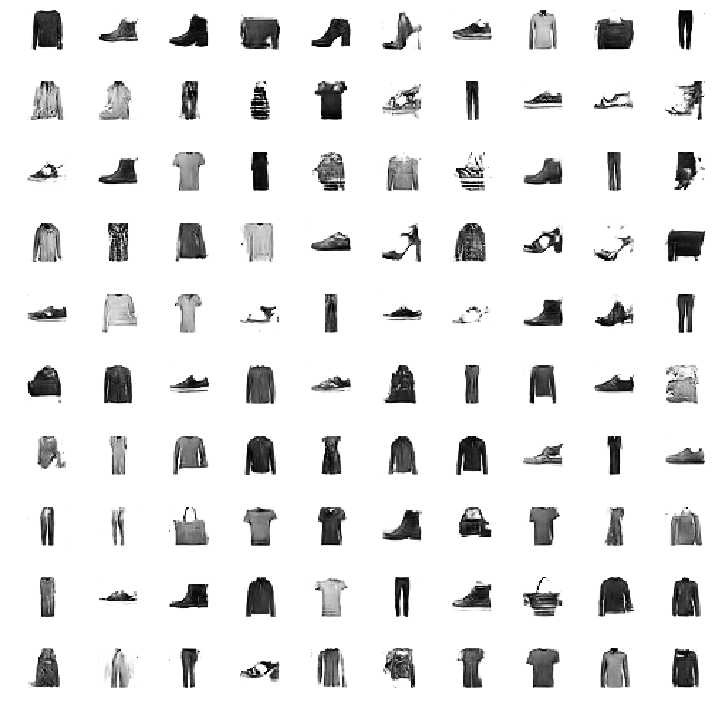

>Saved: ac-gan_generated_plot_0050.png and ac-gan_generator_model_0050.h5


In [32]:
# train model
fashion_acgan.train(X, y, n_epochs=50, reporting_period=5)

Plot training metrics out

AttributeError: 'ACGAN' object has no attribute 'd_acc_real'

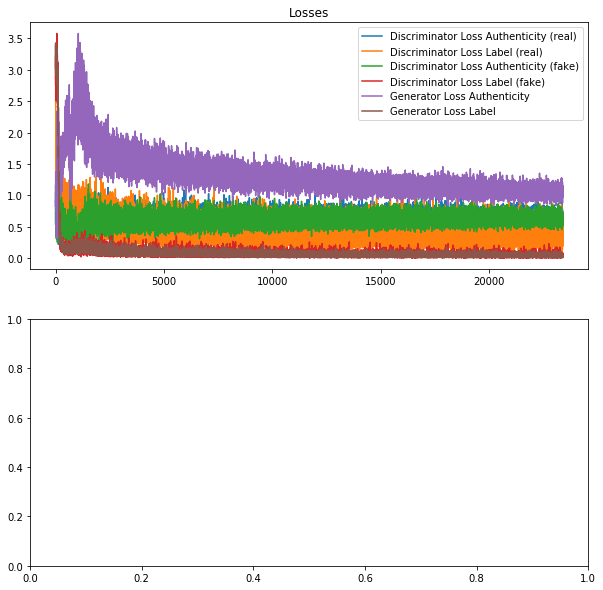

In [33]:
fashion_acgan.plot_training_metrics()

## Evaluation
The AC-GAN technically does not conditionally generate images based on the class label, at least not in the same way as the conditional GAN. Nevertheless, the generated images often match the class label.

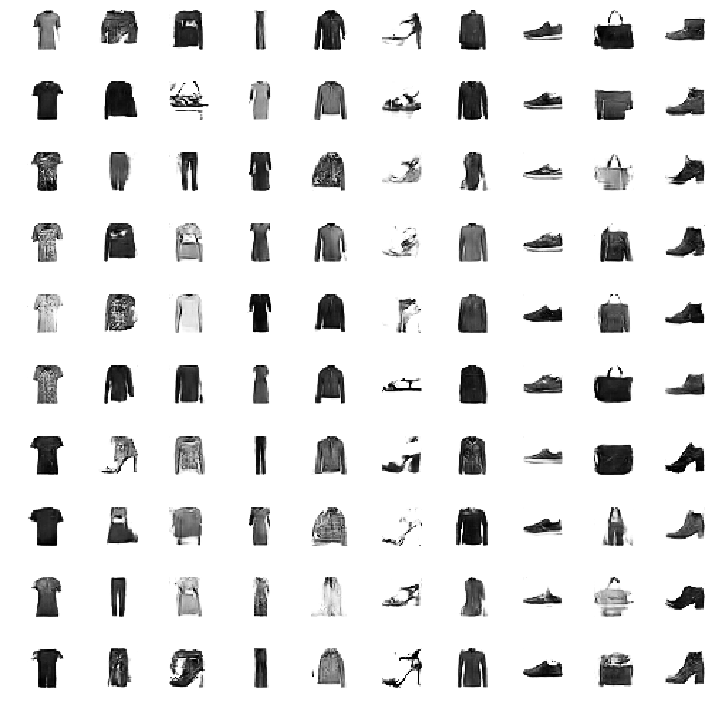

In [36]:
# generate images
latent_points, _ = fashion_acgan.generate_latent_points(100)
# specify labels
labels = np.asarray([x for _ in range(10) for x in range(10)])

# generate images
X = fashion_acgan.generator_prediction(latent_points, labels)
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0

# plot the result
fashion_acgan.grid_plot(X)